# <span style="color:Blue">Hyperparametre Project - Dataset 1

## Abstract
The goal of this project is to predict Cancer Mortality Rates for US Counties using multiple regression algorithms. To predict the Cancer Mortality Rates first we we will find the predictors (i.e _indipendant variables_) with strong relation to our target variable '_TARGET_deathRate_'. To achieve better results we will be cleaning data by removing extream outliers and normalizing it. We will be using varios regression algorithms like linear Regression, Logistic regression, StepWise Regression and regularization using either Ridge regression (i.e _L2 regularization_) or Lasso regression (i.e _L1 regularization_). To make prediction more accurate we will create multiple models and compare the accuracy/outputs of models to get better predictions. Further we will be cross validating output of each model using varios methods like K-Fold, cross_val_score from sklearn.

### Data Dictionary
***TARGET_deathRate*** : Dependent variable. Mean per capita (100,000) cancer mortalities(a) <br />
***avgAnnCount*** : Mean number of reported cases of cancer diagnosed annually(a) <br />
***avgDeathsPerYear*** : Mean number of reported mortalities due to cancer(a) <br />
***incidenceRate*** : Mean per capita (100,000) cancer diagoses(a) <br />
***medianIncome*** : Median income per county (b) <br />
***popEst2015*** : Population of county (b) <br />
***povertyPercent*** : Percent of populace in poverty (b) <br />
***studyPerCap*** : Per capita number of cancer-related clinical trials per county (a) <br />
***binnedInc*** : Median income per capita binned by decile (b) <br />
***MedianAge*** : Median age of county residents (b) <br />
***MedianAgeMale*** : Median age of male county residents (b) <br />
***MedianAgeFemale*** : Median age of female county residents (b) <br />
***Geography*** : County name (b) <br />
***AvgHouseholdSize*** : Mean household size of county (b) <br />
***PercentMarried*** : Percent of county residents who are married (b) <br />
***PctNoHS18_24*** : Percent of county residents ages 18-24 highest education attained: less than high school (b) <br />
***PctHS18_24*** : Percent of county residents ages 18-24 highest education attained: high school diploma (b) <br />
***PctSomeCol18_24*** : Percent of county residents ages 18-24 highest education attained: some college (b) <br />
***PctBachDeg18_24*** : Percent of county residents ages 18-24 highest education attained: bachelor's degree (b) <br />
***PctHS25_Over*** : Percent of county residents ages 25 and over highest education attained: high school diploma (b) <br />
***PctBachDeg25_Over*** : Percent of county residents ages 25 and over highest education attained: bachelor's degree (b) <br />
***PctEmployed16_Over*** : Percent of county residents ages 16 and over employed (b) <br />
***PctUnemployed16_Over*** : Percent of county residents ages 16 and over unemployed (b) <br />
***PctPrivateCoverage*** : Percent of county residents with private health coverage (b) <br />
***PctPrivateCoverageAlone*** : Percent of county residents with private health coverage alone (no public assistance) (b) <br />
***PctEmpPrivCoverage*** : Percent of county residents with employee-provided private health coverage (b) <br />
***PctPublicCoverage*** : Percent of county residents with government-provided health coverage (b) <br />
***PctPubliceCoverageAlone*** : Percent of county residents with government-provided health coverage alone (b) <br />
***PctWhite*** : Percent of county residents who identify as White (b) <br />
***PctBlack*** : Percent of county residents who identify as Black (b) <br />
***PctAsian*** : Percent of county residents who identify as Asian (b) <br />
***PctOtherRace*** : Percent of county residents who identify in a category which is not White, Black, or Asian (b) <br />
***PctMarriedHouseholds*** : Percent of married households (b) <br />
***BirthRate*** : Number of live births relative to number of women in county (b) <br />

(a): years 2010-2016 <br />
(b): 2013 Census Estimates

## Acknowledgements

The website hosting the data is located at https://data.world/nrippner/ols-regression-challenge. These data were aggregated from a number of sources including the American Community Survey (https://www.census.gov), https://www.clinicaltrials.gov, and https://www.cancer.gov.

#### Lets Start with importing libraries

In [1]:
# importing libraries
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model, metrics
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression,LogisticRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, normalize, StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold

import pylab as pl

# Importing H2O
import time, warnings, h2o, logging, os, sys, psutil, random
from h2o.automl import H2OAutoML


from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.stackedensemble import H2OStackedEnsembleEstimator
from h2o.grid.grid_search import H2OGridSearch
# from __future__ import print_function

import json
import datetime
import warnings
warnings.filterwarnings('ignore')


In [2]:
#Reading Data
df_cancer_data=pd.read_csv(r'cancer_reg.csv', encoding='latin-1')
# df=pd.read_csv(r'C://Users//kaila//OneDrive//Desktop//DSMT//Assignment_2_Linear Models//cancer_reg.csv', encoding='latin-1')

In [3]:
df_cancer_data.head(10)

avgAnnCount  avgDeathsPerYear  TARGET_deathRate  incidenceRate  medIncome  \
0       1397.0               469             164.9          489.8      61898   
1        173.0                70             161.3          411.6      48127   
2        102.0                50             174.7          349.7      49348   
3        427.0               202             194.8          430.4      44243   
4         57.0                26             144.4          350.1      49955   
5        428.0               152             176.0          505.4      52313   
6        250.0                97             175.9          461.8      37782   
7        146.0                71             183.6          404.0      40189   
8         88.0                36             190.5          459.4      42579   
9       4025.0              1380             177.8          510.9      60397   

   popEst2015  povertyPercent  studyPerCap           binnedInc  MedianAge  \
0      260131            11.2   499.748204   (61494.5, 125635]       39.3   
1       43269            18.6    23.111234  (48021.6, 51046.4]       33.0   
2       21026            14.6    47.560164  (48021.6, 51046.4]       45.0   
3       75882            17.1   342.637253    (42724.4, 45201]       42.8   
4       10321            12.5     0.000000  (48021.6, 51046.4]       48.3   
5       61023            15.6   180.259902  (51046.4, 54545.6]       45.4   
6       41516            23.2     0.000000  (37413.8, 40362.7]       42.6   
7       20848            17.8     0.000000  (37413.8, 40362.7]       51.7   
8       13088            22.3     0.000000  (40362.7, 42724.4]       49.3   
9      843954            13.1   427.748432  (54545.6, 61494.5]       35.8   

     ...      PctPrivateCoverageAlone  PctEmpPrivCoverage PctPublicCoverage  \
0    ...                          NaN                41.6              32.9   
1    ...                         53.8                43.6              31.1   
2    ...                         43.5                34.9              42.1   
3    ...                         40.3                35.0              45.3   
4    ...                         43.9                35.1              44.0   
5    ...                         38.8                32.6              43.2   
6    ...                         35.0                28.3              46.4   
7    ...                         33.1                25.9              50.9   
8    ...                         37.8                29.9              48.1   
9    ...                          NaN                44.4              31.4   

   PctPublicCoverageAlone   PctWhite  PctBlack  PctAsian  PctOtherRace  \
0                    14.0  81.780529  2.594728  4.821857      1.843479   
1                    15.3  89.228509  0.969102  2.246233      3.741352   
2                    21.1  90.922190  0.739673  0.465898      2.747358   
3                    25.0  91.744686  0.782626  1.161359      1.362643   
4                    22.7  94.104024  0.270192  0.665830      0.492135   
5                    20.2  84.882631  1.653205  1.538057      3.314635   
6                    28.7  75.106455  0.616955  0.866157      8.356721   
7                    24.1  89.406636  0.305159  1.889077      2.286268   
8                    26.6  91.787477  0.185071  0.208205      0.616903   
9                    16.5  74.729668  6.710854  6.041472      2.699184   

   PctMarriedHouseholds  BirthRate  
0             52.856076   6.118831  
1             45.372500   4.333096  
2             54.444868   3.729488  
3             51.021514   4.603841  
4             54.027460   6.796657  
5             51.220360   4.964476  
6             51.013900   4.204317  
7             48.967033   5.889179  
8             53.446998   5.587583  
9             50.063573   5.533430  

[10 rows x 34 columns]

In [4]:
df_cancer_data.describe()

avgAnnCount  avgDeathsPerYear  TARGET_deathRate  incidenceRate  \
count   3047.000000       3047.000000       3047.000000    3047.000000   
mean     606.338544        185.965868        178.664063     448.268586   
std     1416.356223        504.134286         27.751511      54.560733   
min        6.000000          3.000000         59.700000     201.300000   
25%       76.000000         28.000000        161.200000     420.300000   
50%      171.000000         61.000000        178.100000     453.549422   
75%      518.000000        149.000000        195.200000     480.850000   
max    38150.000000      14010.000000        362.800000    1206.900000   

           medIncome    popEst2015  povertyPercent  studyPerCap    MedianAge  \
count    3047.000000  3.047000e+03     3047.000000  3047.000000  3047.000000   
mean    47063.281917  1.026374e+05       16.878175   155.399415    45.272333   
std     12040.090836  3.290592e+05        6.409087   529.628366    45.304480   
min     22640.000000  8.270000e+02        3.200000     0.000000    22.300000   
25%     38882.500000  1.168400e+04       12.150000     0.000000    37.700000   
50%     45207.000000  2.664300e+04       15.900000     0.000000    41.000000   
75%     52492.000000  6.867100e+04       20.400000    83.650776    44.000000   
max    125635.000000  1.017029e+07       47.400000  9762.308998   624.000000   

       MedianAgeMale     ...       PctPrivateCoverageAlone  \
count    3047.000000     ...                   2438.000000   
mean       39.570725     ...                     48.453774   
std         5.226017     ...                     10.083006   
min        22.400000     ...                     15.700000   
25%        36.350000     ...                     41.000000   
50%        39.600000     ...                     48.700000   
75%        42.500000     ...                     55.600000   
max        64.700000     ...                     78.900000   

       PctEmpPrivCoverage  PctPublicCoverage  PctPublicCoverageAlone  \
count         3047.000000        3047.000000             3047.000000   
mean            41.196324          36.252642               19.240072   
std              9.447687           7.841741                6.113041   
min             13.500000          11.200000                2.600000   
25%             34.500000          30.900000               14.850000   
50%             41.100000          36.300000               18.800000   
75%             47.700000          41.550000               23.100000   
max             70.700000          65.100000               46.600000   

          PctWhite     PctBlack     PctAsian  PctOtherRace  \
count  3047.000000  3047.000000  3047.000000   3047.000000   
mean     83.645286     9.107978     1.253965      1.983523   
std      16.380025    14.534538     2.610276      3.517710   
min      10.199155     0.000000     0.000000      0.000000   
25%      77.296180     0.620675     0.254199      0.295172   
50%      90.059774     2.247576     0.549812      0.826185   
75%      95.451693    10.509732     1.221037      2.177960   
max     100.000000    85.947799    42.619425     41.930251   

       PctMarriedHouseholds    BirthRate  
count           3047.000000  3047.000000  
mean              51.243872     5.640306  
std                6.572814     1.985816  
min               22.992490     0.000000  
25%               47.763063     4.521419  
50%               51.669941     5.381478  
75%               55.395132     6.493677  
max               78.075397    21.326165  

[8 rows x 32 columns]

In [5]:
df_cancer_data.shape

(3047, 34)

In [6]:
df_cancer_data.isnull().sum()

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOther

Columns PctSomeCol18_24, PctEmployed16_Over and PctPrivateCoverageAlone have some null value.<br />

### Feature Engineering:

In [7]:
df_cancer_data.loc[(df_cancer_data['MedianAge'] > 0) & (df_cancer_data['MedianAge'] <= 40), 'MedianAge'] = int(1)
df_cancer_data.loc[(df_cancer_data['MedianAge'] > 40) & (df_cancer_data['MedianAge'] <= 50), 'MedianAge'] = int(2)
df_cancer_data.loc[(df_cancer_data['MedianAge'] > 50), 'MedianAge'] = int(3)
df_cancer_data['MedianAge']=df_cancer_data['MedianAge'].round(0).astype(int)

df_cancer_data['MedianAge'].value_counts()

2    1621
1    1270
3     156
Name: MedianAge, dtype: int64

Changed MedianAge column to categorical column.

    | MedianAge | Categorical Value   | Occurence  |
    |-----------|---------------------|------------|
    | 0 to 40   | 1                   | 1270       |
    | 40 to 50  | 2                   | 1621       |
    | Above 50  | 3                   | 156        |

Converted all values to integer type to make computation easier.

In [8]:
df_cancer_data['povertyPercent'].describe()

count    3047.000000
mean       16.878175
std         6.409087
min         3.200000
25%        12.150000
50%        15.900000
75%        20.400000
max        47.400000
Name: povertyPercent, dtype: float64

In [9]:
df_cancer_data['isPoor'] = np.where(df_cancer_data['povertyPercent'] <= 15.90, 0 ,1)
df_cancer_data['isPoor'].value_counts()
# remove column povertyPercent;

0    1539
1    1508
Name: isPoor, dtype: int64

Poverty percent is impotant factor when estimating death rate in cancer patients. <br />
Creating binary variable that can be used in linear regression is valuable.<br /> 
- Created new binary column isPoor based on povertyPercent. 
- If povertyPercent below mean then value of isPoor is 0 else 1.

In [10]:
df_cancer_data[['PctEmployed16_Over','PctPrivateCoverageAlone','PctSomeCol18_24']].describe()

PctEmployed16_Over  PctPrivateCoverageAlone  PctSomeCol18_24
count         2895.000000              2438.000000       762.000000
mean            54.152642                48.453774        40.977034
std              8.315064                10.083006        11.115805
min             17.600000                15.700000         7.100000
25%             48.600000                41.000000        34.000000
50%             54.500000                48.700000        40.400000
75%             60.300000                55.600000        46.400000
max             80.100000                78.900000        79.000000

In [11]:
df_cancer_data['PctEmployed16_Over'] = pd.to_numeric(df_cancer_data['PctEmployed16_Over'], errors='coerce').fillna(54.50)
df_cancer_data['PctPrivateCoverageAlone'] = pd.to_numeric(df_cancer_data['PctPrivateCoverageAlone'], errors='coerce').fillna(48.70)
df_cancer_data['PctSomeCol18_24'] = pd.to_numeric(df_cancer_data['PctSomeCol18_24'], errors='coerce').fillna(40.40)

In [12]:
df_cancer_data[['PctEmployed16_Over','PctPrivateCoverageAlone','PctSomeCol18_24']].describe()

PctEmployed16_Over  PctPrivateCoverageAlone  PctSomeCol18_24
count         3047.000000              3047.000000      3047.000000
mean            54.169970                48.502987        40.544306
std              8.105295                 9.019423         5.561696
min             17.600000                15.700000         7.100000
25%             48.900000                43.100000        40.400000
50%             54.500000                48.700000        40.400000
75%             60.000000                53.800000        40.400000
max             80.100000                78.900000        79.000000

We are going to fill null value with either mean or median to avoid skewness <br />
We replace the null value column with median values(50%) <br />
After Replacing values there is very little changes in overall description and thats good sign that our dataset is still close to the original.

### Creating Dummy columns for MedianAge

In [13]:
# create dummy columns
dummies = pd.get_dummies(df_cancer_data.MedianAge, prefix='MedianAge').iloc[:, 0:]
# concate dummy columns with main dataframe df
df_cancer_data = pd.concat([df_cancer_data, dummies], axis=1)
# df=df.drop('MedianAge', axis=1)

### MinMaxScaler normalisation

In [14]:
std_val = df_cancer_data[['TARGET_deathRate','incidenceRate','medIncome','PctHS25_Over','PctEmployed16_Over','povertyPercent','PctUnemployed16_Over','PctPrivateCoverage','PctPrivateCoverageAlone','PctPublicCoverage','PctPublicCoverageAlone','MedianAge_1','MedianAge_2','MedianAge_3','isPoor']]

std_scale = StandardScaler().fit(std_val)
df_std = std_scale.transform(std_val)
print(std_scale)
print(df_std)

StandardScaler(copy=True, with_mean=True, with_std=True)
[[-0.49605667  0.76132099  1.23231238 ... -1.06618298 -0.23229414
  -0.98987729]
 [-0.62580062 -0.67217947  0.08836251 ... -1.06618298 -0.23229414
   1.01022623]
 [-0.14286478 -1.80688124  0.18979035 ...  0.93792531 -0.23229414
  -0.98987729]
 ...
 [-0.89249653  0.09680411  0.33898315 ... -1.06618298 -0.23229414
  -0.98987729]
 [-0.13205279  0.09680411  0.30583842 ... -1.06618298 -0.23229414
  -0.98987729]
 [ 1.25909075  0.09680411 -0.48764129 ... -1.06618298 -0.23229414
  -0.98987729]]


In [15]:
from sklearn.preprocessing import MinMaxScaler
minmax_val = df_cancer_data[['TARGET_deathRate','incidenceRate','medIncome','PctHS25_Over','PctEmployed16_Over','povertyPercent','PctUnemployed16_Over','PctPrivateCoverage','PctPrivateCoverageAlone','PctPublicCoverage','PctPublicCoverageAlone','MedianAge_1','MedianAge_2','MedianAge_3','isPoor']]
minmax_scale = MinMaxScaler().fit(minmax_val)
print(minmax_scale)
df_minmax = minmax_scale.transform(minmax_val)
print(df_minmax)

MinMaxScaler(copy=True, feature_range=(0, 1))
[[0.34708017 0.2868934  0.38116413 ... 0.         0.         0.        ]
 [0.3352029  0.20912888 0.24745861 ... 0.         0.         1.        ]
 [0.37941274 0.14757359 0.25931356 ... 1.         0.         0.        ]
 ...
 [0.31078852 0.25084469 0.2767513  ... 0.         0.         0.        ]
 [0.38040251 0.25084469 0.27287732 ... 0.         0.         0.        ]
 [0.50775322 0.25084469 0.18013496 ... 0.         0.         0.        ]]


In [16]:
from sklearn import preprocessing

for f in df_cancer_data.columns:
    if df_cancer_data[f].dtype=='object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(np.unique(list(df_cancer_data[f].values) ))
        df_cancer_data[f] = lbl.transform(list(df_cancer_data[f].values))
        

In [17]:
df_cancer_data

avgAnnCount  avgDeathsPerYear  TARGET_deathRate  incidenceRate  \
0     1397.000000               469             164.9     489.800000   
1      173.000000                70             161.3     411.600000   
2      102.000000                50             174.7     349.700000   
3      427.000000               202             194.8     430.400000   
4       57.000000                26             144.4     350.100000   
5      428.000000               152             176.0     505.400000   
6      250.000000                97             175.9     461.800000   
7      146.000000                71             183.6     404.000000   
8       88.000000                36             190.5     459.400000   
9     4025.000000              1380             177.8     510.900000   
10     113.000000                36             121.4     413.300000   
11     740.000000               269             172.7     499.300000   
12      55.000000                26             188.3     398.900000   
13    3438.000000              1118             165.3     493.400000   
14    2265.000000               901             171.0     440.700000   
15     251.000000               106             174.2     423.800000   
16    1390.000000               483             169.9     495.900000   
17      32.000000                12             153.8     463.200000   
18     305.000000               120             162.8     442.500000   
19    1081.000000               367             163.3     490.900000   
20     134.000000                50             140.8     390.500000   
21     958.000000               403             169.4     411.000000   
22      94.000000                41             189.7     445.200000   
23     499.000000               215             206.1     463.100000   
24     152.000000                70             236.7     501.800000   
25      80.000000                40             196.3     396.600000   
26     164.000000                69             186.2     481.600000   
27     564.000000               237             194.0     483.400000   
28      50.000000                25             226.5     459.900000   
29      70.000000                26             212.9     591.000000   
...           ...               ...               ...            ...   
3017    87.000000                34             159.3     453.200000   
3018  1962.667684                36             196.4     453.549422   
3019  1962.667684                22             174.8     453.549422   
3020  1962.667684                37             180.2     453.549422   
3021  1962.667684                15             197.8     453.549422   
3022  1962.667684                67             178.3     453.549422   
3023  1962.667684                34             166.6     453.549422   
3024  1962.667684                26             184.2     453.549422   
3025  1962.667684               126             175.0     453.549422   
3026  1962.667684                 8             177.8     453.549422   
3027  1962.667684                13             194.2     453.549422   
3028  1962.667684                 9             150.0     453.549422   
3029  1962.667684                 6             153.7     453.549422   
3030  1962.667684                24             169.2     453.549422   
3031  1962.667684                27             178.6     453.549422   
3032  1962.667684                22             176.6     453.549422   
3033  1962.667684                 7             209.6     453.549422   
3034  1962.667684                85             184.4     453.549422   
3035  1962.667684                13             214.7     453.549422   
3036  1962.667684                52             181.2     453.549422   
3037  1962.667684                16             160.3     453.549422   
3038  1962.667684               138             153.7     453.549422   
3039  1962.667684                 9             208.3     453.549422   
3040  1962.667684                12           

### Remove outliers

In [18]:
# Calculating Z-Score 
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df_cancer_data[['TARGET_deathRate','incidenceRate','medIncome','PctHS25_Over','PctEmployed16_Over','povertyPercent','PctBachDeg25_Over','PctUnemployed16_Over','PctPrivateCoverage','PctPrivateCoverageAlone','PctPublicCoverage','PctPublicCoverageAlone','MedianAge_1','MedianAge_2','MedianAge_3']]))
print(z)

[[0.49605667 0.76132099 1.23231238 ... 1.18288317 1.06618298 0.23229414]
 [0.62580062 0.67217947 0.08836251 ... 1.18288317 1.06618298 0.23229414]
 [0.14286478 1.80688124 0.18979035 ... 0.84539202 0.93792531 0.23229414]
 ...
 [0.89249653 0.09680411 0.33898315 ... 1.18288317 1.06618298 0.23229414]
 [0.13205279 0.09680411 0.30583842 ... 1.18288317 1.06618298 0.23229414]
 [1.25909075 0.09680411 0.48764129 ... 1.18288317 1.06618298 0.23229414]]


In [19]:
def remove_outlier(df_cancer_data, col_name):
    if ((col_name!='binnedInc')&(col_name!='Geography')&(col_name!='PctSomeCol18_24')&(col_name!='MedianAge_1')&(col_name!='MedianAge_2')&(col_name!='MedianAge_3')):
        q1 = df_cancer_data[col_name].quantile(0.10)
        q3 = df_cancer_data[col_name].quantile(0.90)

#         print (q1,q3)
        iqr = q3 - q1
        lower_bound  = q1 - (1.5  * iqr)
        upper_bound = q3 + (1.5 * iqr)

        out_df=df_cancer_data.loc[(df_cancer_data[col_name] > lower_bound) & (df_cancer_data[col_name] < upper_bound)]
        df_cancer_data[col_name] = out_df[col_name]
        df_cancer_data[col_name] = pd.to_numeric(df_cancer_data[col_name], errors='coerce').fillna(df_cancer_data[col_name].mean())
        return out_df

In [20]:
for column in df_cancer_data:
     remove_outlier(df_cancer_data,df_cancer_data[column].name)
#     print(df[column].name) 

In [21]:
df_cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 38 columns):
avgAnnCount                3047 non-null float64
avgDeathsPerYear           3047 non-null float64
TARGET_deathRate           3047 non-null float64
incidenceRate              3047 non-null float64
medIncome                  3047 non-null float64
popEst2015                 3047 non-null float64
povertyPercent             3047 non-null float64
studyPerCap                3047 non-null float64
binnedInc                  3047 non-null int64
MedianAge                  3047 non-null int32
MedianAgeMale              3047 non-null float64
MedianAgeFemale            3047 non-null float64
Geography                  3047 non-null int64
AvgHouseholdSize           3047 non-null float64
PercentMarried             3047 non-null float64
PctNoHS18_24               3047 non-null float64
PctHS18_24                 3047 non-null float64
PctSomeCol18_24            3047 non-null float64
PctBachDeg18_24  

### Is the relationship significant?

In [22]:
df_cancer_data.corr()

avgAnnCount  avgDeathsPerYear  TARGET_deathRate  \
avgAnnCount                 1.000000          0.462191         -0.164716   
avgDeathsPerYear            0.462191          1.000000         -0.055008   
TARGET_deathRate           -0.164716         -0.055008          1.000000   
incidenceRate               0.137872          0.148614          0.448952   
medIncome                   0.344118          0.270756         -0.423340   
popEst2015                  0.437771          0.825536         -0.105874   
povertyPercent             -0.233861         -0.125595          0.429985   
studyPerCap                 0.279020          0.333641         -0.063027   
binnedInc                   0.156573          0.108911         -0.139892   
MedianAge                  -0.150798         -0.189559          0.001806   
MedianAgeMale              -0.130238         -0.200108         -0.023236   
MedianAgeFemale            -0.130095         -0.196081          0.014312   
Geography                   0.032283          0.010484          0.008781   
AvgHouseholdSize            0.041397          0.120390         -0.034956   
PercentMarried             -0.052983         -0.171349         -0.263878   
PctNoHS18_24               -0.196992         -0.230877          0.096998   
PctHS18_24                 -0.227131         -0.176649          0.261447   
PctSomeCol18_24             0.091820          0.107556         -0.095538   
PctBachDeg18_24             0.349084          0.294645         -0.283720   
PctHS25_Over               -0.352372         -0.330886          0.406736   
PctBachDeg25_Over           0.406213          0.365603         -0.477962   
PctEmployed16_Over          0.291633          0.155432         -0.400427   
PctUnemployed16_Over       -0.071664          0.082790          0.380518   
PctPrivateCoverage          0.265077          0.156155         -0.387907   
PctPrivateCoverageAlone     0.265647          0.184901         -0.328749   
PctEmpPrivCoverage          0.309176          0.272397         -0.269308   
PctPublicCoverage          -0.246438         -0.196300          0.407655   
PctPublicCoverageAlone     -0.197074         -0.102706          0.451471   
PctWhite                   -0.070306         -0.109664         -0.177399   
PctBlack                    0.003969          0.080289          0.251318   
PctAsian                    0.431322          0.464234         -0.180980   
PctOtherRace                0.189498          0.141022         -0.203880   
PctMarriedHouseholds       -0.069765         -0.127187         -0.295058   
BirthRate                  -0.007190         -0.111610         -0.075324   
isPoor                     -0.181744         -0.073609          0.383429   
MedianAge_1                 0.162115          0.200745         -0.041657   
MedianAge_2                -0.145621         -0.177043          0.080228   
MedianAge_3                -0.032969         -0.048244         -0.088448   

                         incidenceRate  medIncome  popEst2015  povertyPercent  \
avgAnnCount                   0.137872   0.344118    0.437771       -0.233861   
avgDeathsPerYear              0.148614   0.270756    0.825536       -0.125595   
TARGET_deathRate              0.448952  -0.423340   -0.105874        0.429985   
incidenceRate                 1.000000   0.011937    0.106705       -0.000268   
medIncome                     0.011937   1.000000    0.309941       -0.793886   
popEst2015                    0.106705   0.309941    1.000000       -0.145409   
povertyPercent               -0.000268  -0.793886   -0.145409        1.000000   
studyPerCap                   0.103449   0.148249    0.311104       -0.084861   
binnedInc                     0.011095   0.440047    0.140229       -0.202860   
MedianAge                     0.006936  -0.133339   -0.254310       -0.131562   
MedianAgeMale                -0.005080  -0.089838   -0.265746       -0.214001   
MedianAgeFemale               0.011656  -0.151564   -0.268482       -0.148164   
Geograp

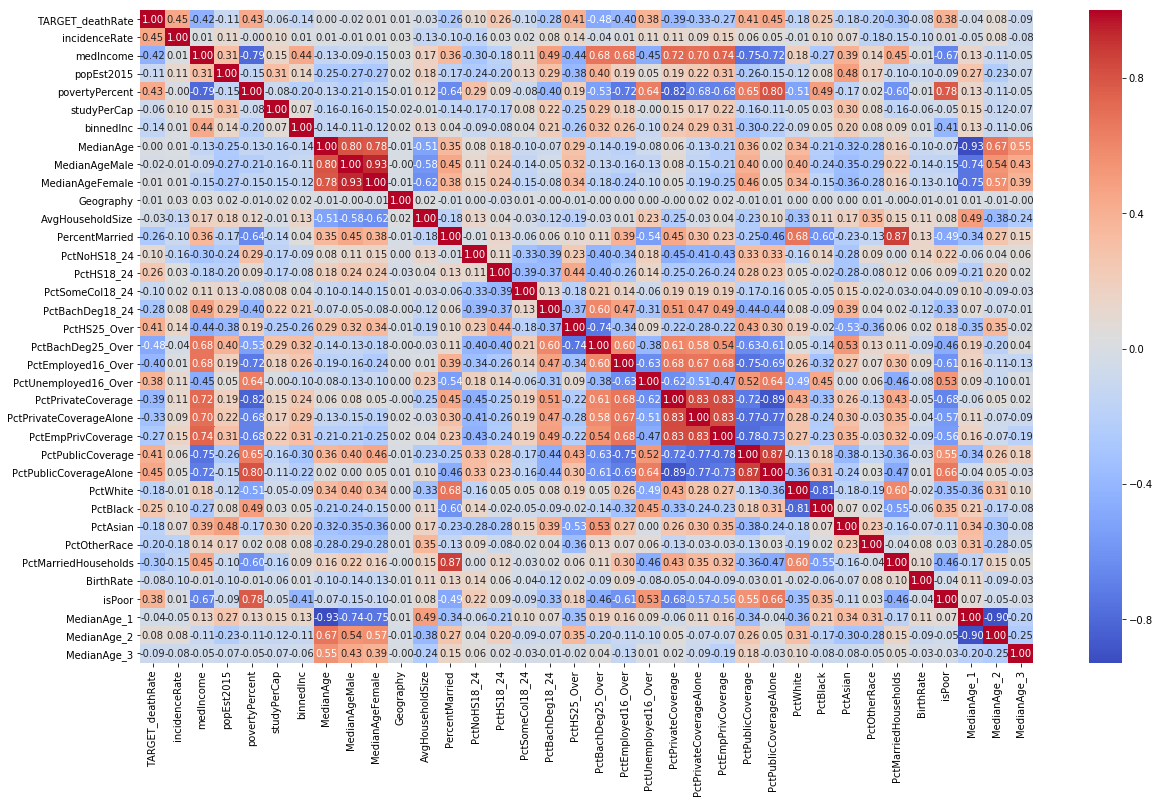

In [23]:
plt.figure(figsize=(20,12))
sns.heatmap(data=df_cancer_data.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

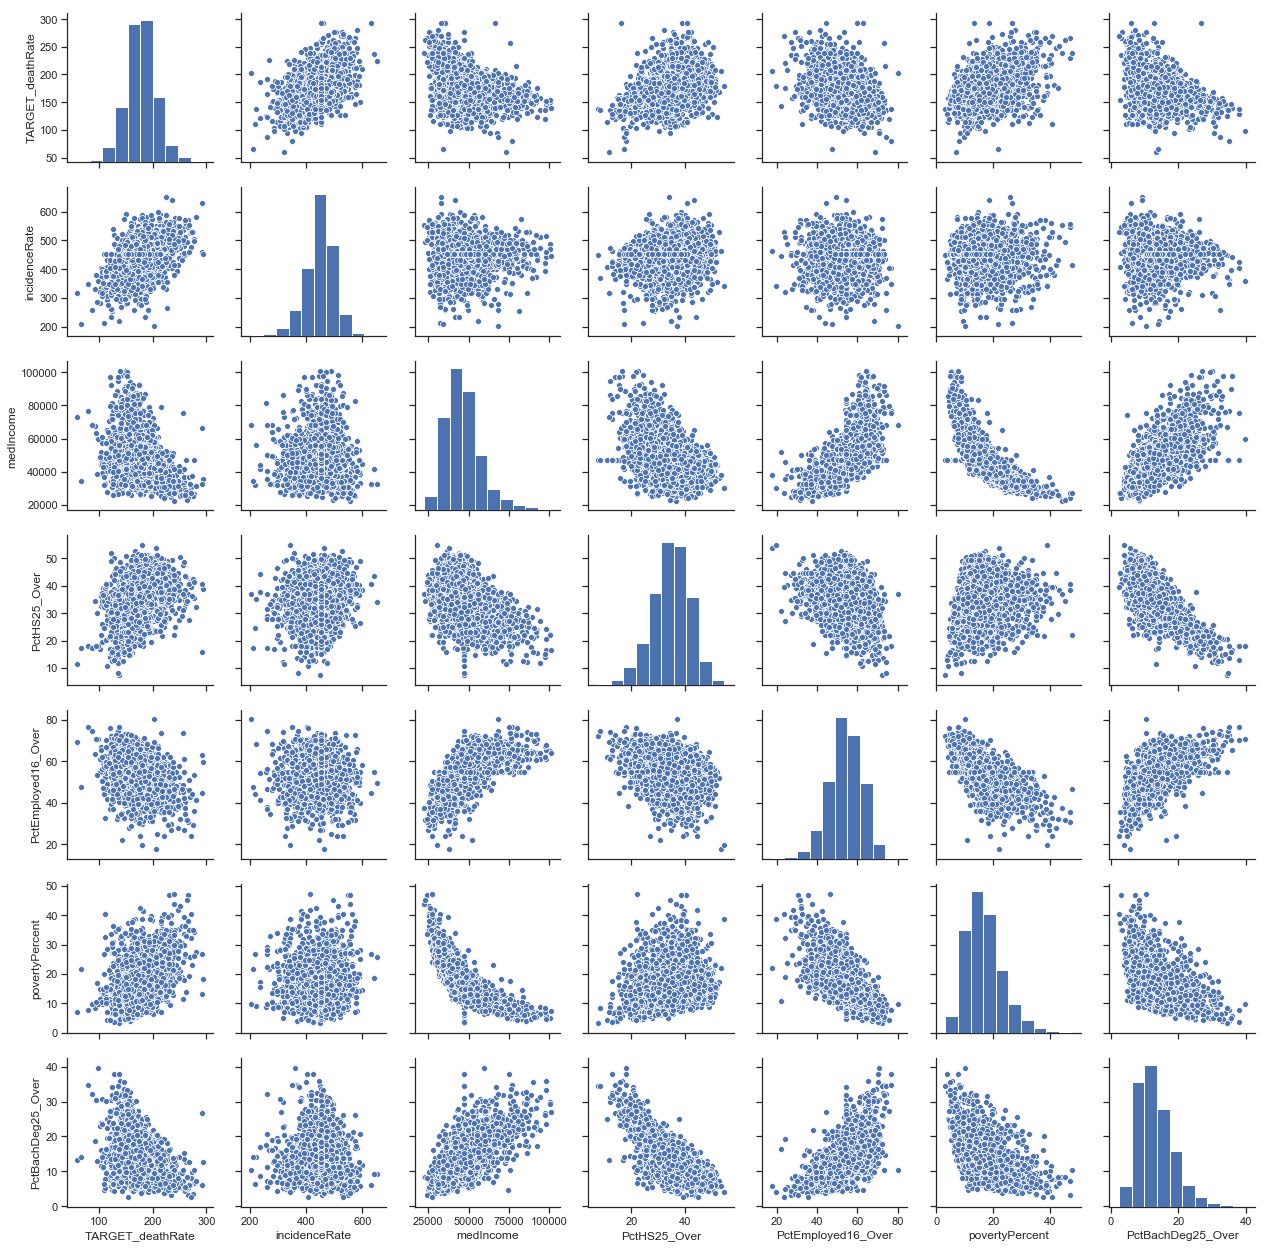

In [24]:
x1_val = df_cancer_data[['TARGET_deathRate','incidenceRate','medIncome','PctHS25_Over','PctEmployed16_Over','povertyPercent','PctBachDeg25_Over']]
x2_val = df_cancer_data[['TARGET_deathRate','PctUnemployed16_Over','PctPrivateCoverage','PctPrivateCoverageAlone','PctPublicCoverage','PctPublicCoverageAlone']]
sns.set(style="ticks")
sns.pairplot(x1_val,palette="husl")
plt.show()

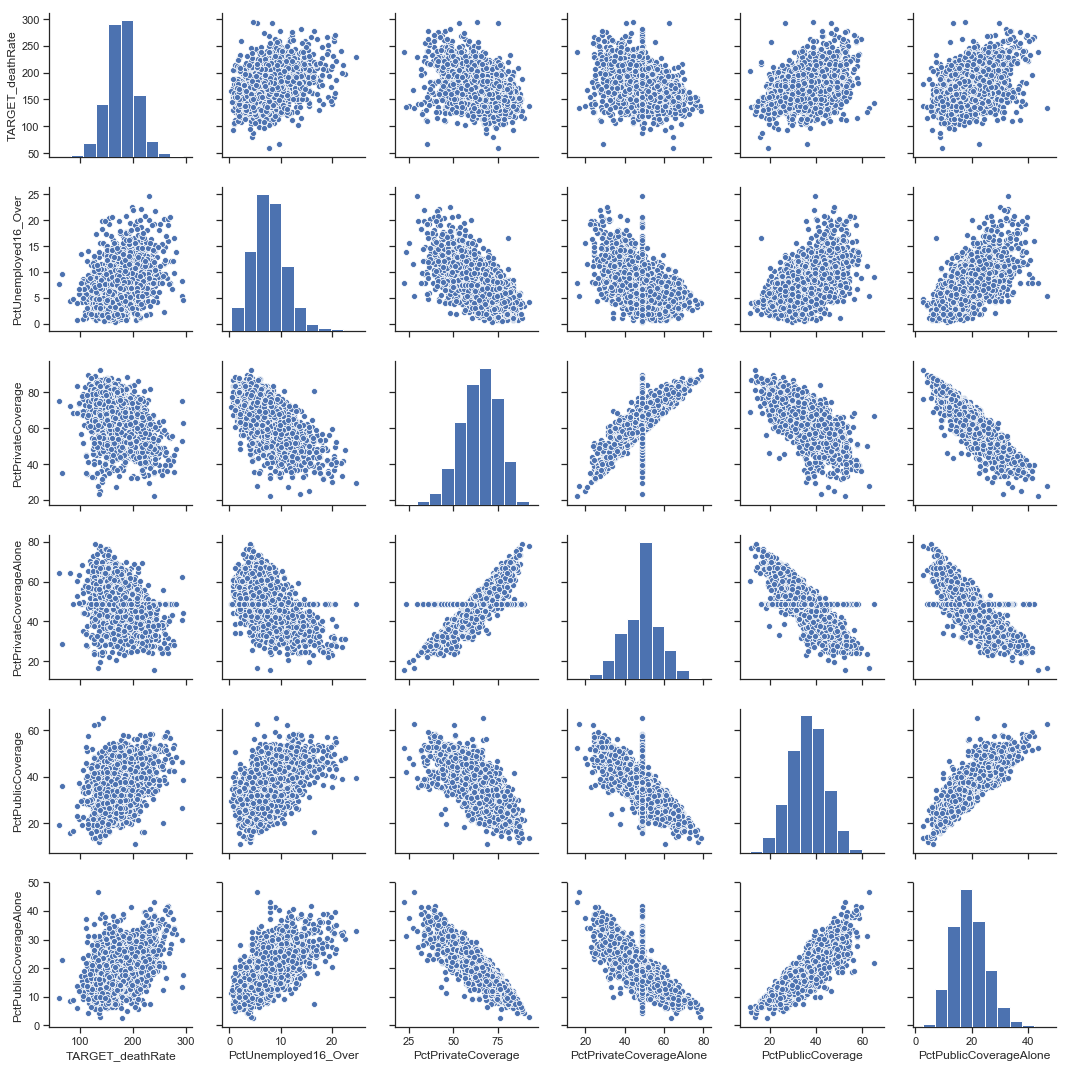

In [25]:
sns.set(style="ticks")
sns.pairplot(x2_val)
plt.show()

Dependant Variable: Target_deathRate <br />

In our dataset there are 35 original charecteristic out which 11 charecteristics have significant relationship to ur dependant variable. We will consider them as our predictors for our analysis<br />

Independant Variables: ['TARGET_deathRate','incidenceRate','medIncome','povertyPercent','PctHS25_Over',
'PctEmployed16_Over','PctUnemployed16_Over','PctPrivateCoverage','PctPrivateCoverageAlone',
'PctPublicCoverage','PctPublicCoverageAlone']

| Predictor Name                | Correlation         | Nature of relation       |
|-------------------------------|---------------------|--------------------------|
| incidenceRate                 |  0.45               | Positively Correlated    |
| medIncome                     | -0.43               | Negatively Correlated    |
| povertyPercent                |  0.43               | Positively Correlated    |
| PctHS25_Over                  |  0.4                | Positively Correlated    |
| PctEmployed16_Over            | -0.4                | Negatively Correlated    |
| PctUnemployed16_Over          |  0.38               | Positively Correlated    |
| PctPrivateCoverage            | -0.39               | Negatively Correlated    |
| PctPrivateCoverageAlone       | -0.33               | Negatively Correlated    |
| PctPublicCoverage             |  0.4                | Positively Correlated    |
| PctPublicCoverageAlone        |  0.45               | Positively Correlated    |


## Linear Regression

In [26]:
y= df_cancer_data['TARGET_deathRate']
x1 = df_cancer_data[['incidenceRate','PctHS25_Over','PctUnemployed16_Over','PctPrivateCoverage','MedianAge_3','isPoor']]

In [27]:
# Add constant in metric form 
x=sm.add_constant(x1,prepend=True)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.5)

In [29]:
# results = sm.OLS(y_train.apply(pd.to_numeric),X_train.apply(pd.to_numeric)).fit()
results = sm.OLS(y_train,X_train).fit()

In [30]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       TARGET_deathRate   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     228.0
Date:                Mon, 22 Apr 2019   Prob (F-statistic):          1.30e-207
Time:                        19:49:03   Log-Likelihood:                -6731.1
No. Observations:                1523   AIC:                         1.348e+04
Df Residuals:                    1516   BIC:                         1.351e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   74.3769      7.464      9.964      0.000      59.735      89.019
incidenceRate            0.2280      0.010     22.058      0.000       0.208       0.248
PctHS25_Over             0.9743      0.076     12.778      0.000       0.825       1.124
PctUnemployed16_Over     0.7498      0.200      3.741      0.000       0.357       1.143
PctPrivateCoverage      -0.6195      0.077     -8.082      0.000      -0.770      -0.469
MedianAge_3             -3.3059      2.177     -1.519      0.129      -7.575       0.963
isPoor                   6.4455      1.437      4.485      0.000       3.626       9.265
==============================================================================
Omnibus:                      133.154   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              395.004
Skew:                           0.442   Prob(JB):                     1.68e-86
Kurtosis:                       5.333   Cond. No.                     6.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
predictions=results.predict(X_test)
predictions

1203    203.072482
1298    158.132907
732     192.697293
1439    215.186866
251     132.551933
2956    172.705386
277     195.380142
1507    175.196661
3000    173.717976
2639    177.286303
504     198.047118
2384    172.410227
1658    193.081711
2549    209.061207
2746    150.805449
457     159.363266
2987    192.541580
2655    186.286026
1197    206.437914
2820    171.255589
2011    157.998157
2962    180.606325
1194    194.173652
179     170.322231
2966    165.274163
1072    118.611703
2664    195.035342
620     184.748468
771     201.249207
606     219.999785
           ...    
152     191.887972
978     167.310253
1686    151.286582
193     195.013784
908     171.700002
2858    180.775935
176     184.176360
1221    199.743506
2052    173.798078
382     188.116542
2028    185.364226
1835    176.841302
2063    189.321102
2753    190.826414
610     180.861348
1696    177.999745
1105    169.321899
1485    160.430684
669     160.049598
2194    184.095703
1812    151.336249
239     175.

In [32]:
y_test

1203    257.8
1298    156.9
732     195.9
1439    197.7
251     152.3
2956    151.8
277     176.1
1507    184.6
3000    185.1
2639    157.4
504     212.3
2384    165.3
1658    200.6
2549    194.9
2746    132.8
457     209.3
2987    148.3
2655    174.0
1197    225.1
2820    179.9
2011    187.4
2962    183.1
1194    157.0
179     155.5
2966    163.4
1072    102.6
2664    180.7
620     127.4
771     203.7
606     188.8
        ...  
152     174.2
978     218.9
1686    181.0
193     162.0
908     167.6
2858    170.0
176     134.3
1221    205.5
2052    169.4
382     187.3
2028    217.1
1835    179.1
2063    214.3
2753    219.4
610     151.2
1696    165.3
1105    171.5
1485    160.8
669     201.3
2194    195.8
1812    156.8
239     202.4
561     248.7
1981    182.9
2702    212.3
2604    155.7
2867    166.9
2439    127.1
2075    150.6
2425    179.7
Name: TARGET_deathRate, Length: 1524, dtype: float64

Plotting Y-Test vs Predictions

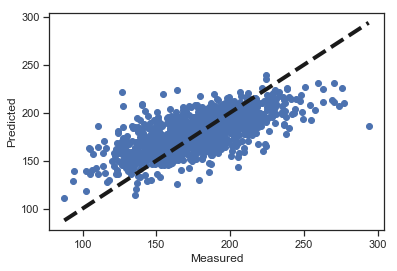

In [33]:
fig,ax = plt.subplots()
ax.scatter(y_test, predictions)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()

- For the lower values on the X-axis and  higher values on the X-axis the points are not near the regression line.
- Plots shows there is varience in between y_test and Predictions. 

#### Calculating Evaluation Matric -RMSE

In [34]:
# Lower the RSME better the model
from sklearn.metrics import accuracy_score,mean_squared_error
crossVal_Model1=np.sqrt(mean_squared_error(y_test,predictions))
crossVal_Model1

19.89678594277492

### Is the model good enough?

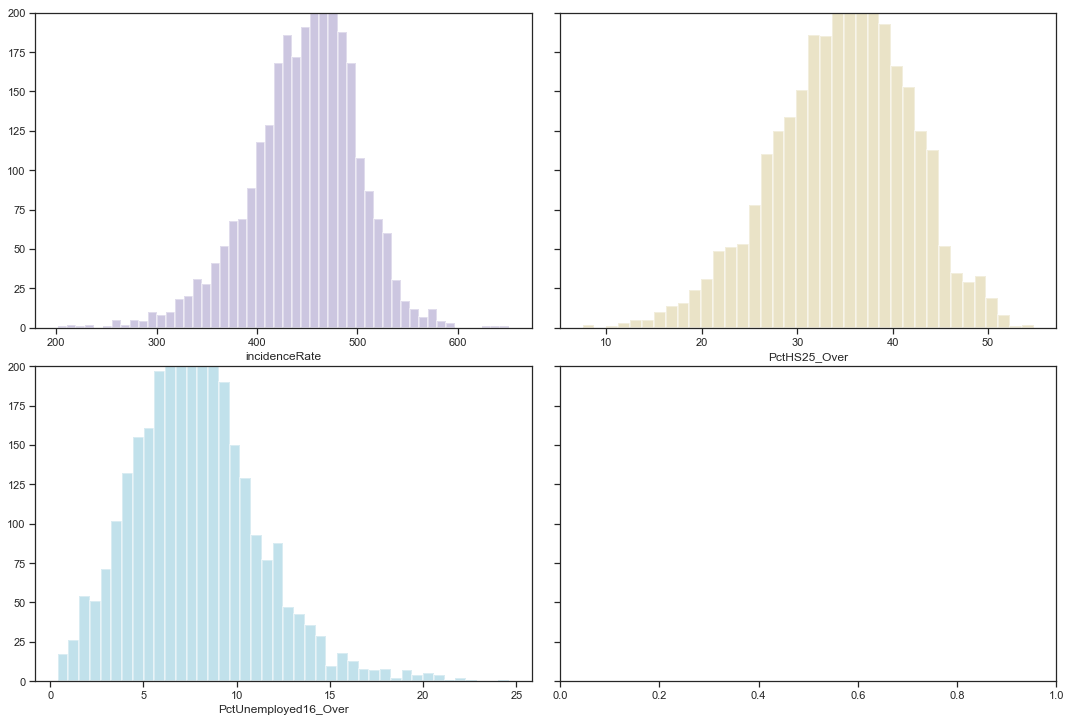

In [35]:
import seaborn as sns
colors = np.array('b g r c m y'.split()) #Different colors for plotting

fig,axes = plt.subplots(nrows =2,ncols=2, sharey=True,figsize = (15,10))
plt.tight_layout()
row = 0
iteration = 0
for j in range(0,len(x1.columns[:-3])):
    iteration+=1
    if(j%2==0):
        k = 0
    else:
        k = 1
    sns.distplot(x1[x1.columns[j]],kde=False,hist_kws=dict(edgecolor="w", linewidth=2),
                 color = np.random.choice(colors) ,ax=axes[row][k])
    if(iteration%2==0):
        row+=1
        plt.ylim(0,200)

All predictors are normally distributed, incidenceRate and PctUnemployed16_Over are skewed to the left.

### Are residuals normally distributed?
#### In regression analysis, the difference between the observed value of the dependent variable (i.e TARGET_deathRate) and the predicted value (predictions) is called the residual.

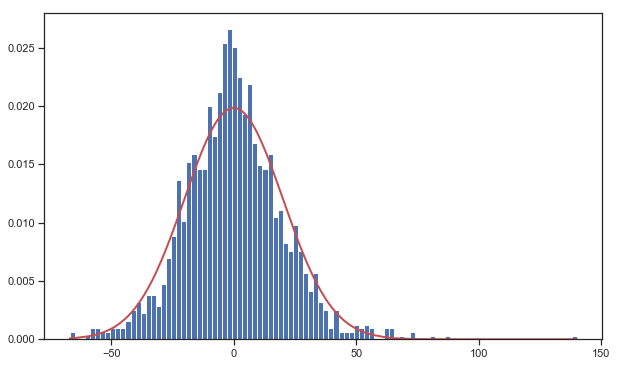

In [36]:
# histogram superimposed by normal curve
plt.figure(figsize=(10,6))
import scipy.stats as stats
mu = np.mean(results.resid)
sigma = np.std(results.resid)
pdf = stats.norm.pdf(sorted(results.resid), mu, sigma)
plt.hist(results.resid, bins=100, normed=True)
plt.plot(sorted(results.resid), pdf, color='r', linewidth=2)
plt.show()

Figure above is histogram superimposed by normal curve.
- The distribution of the residuals does not adhere perfectly to a normal distribution (skew=0, excess kurtosis=0).
- There is a small number of outliers to the left, the tails appear slightly fatter than, and the distribution has moderate kurtosis (i.e 5.81).

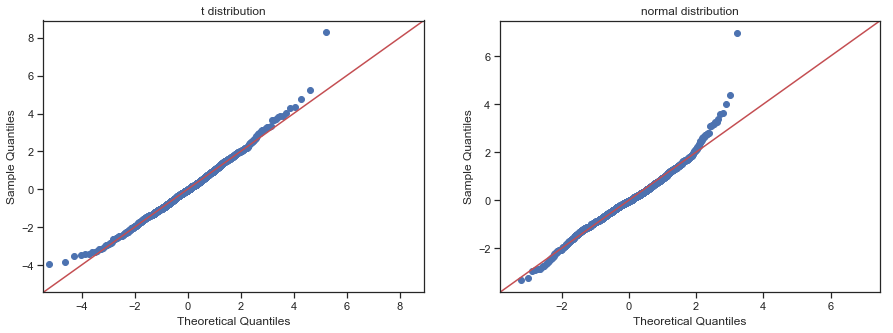

In [37]:
# QQplot
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(15,5))
sm.qqplot(results.resid, stats.t, fit=True, line='45', ax = ax1)
ax1.set_title("t distribution")
sm.qqplot(results.resid, stats.norm, fit=True, line='45', ax=ax2)
ax2.set_title("normal distribution")
plt.show()

- The qqplots confirm that the residuals adhere more closely to the t- than normal distribution (fatter tails). <br />
- A few prominent outliers are visible at the lower and upper extreme. <br />
- All-in-all, despite these imperfections, I consider the distribution of residuals to be adequate. <br />
- However, we should investigate the nature of the more extreme outliers. <br />
- We also may want to try to add additional information or to change the predictors (We will be doing it in Model 3).

### Are any model assumptions violated?

#### Homoscedasticity & Heteroscedasticity
Homoscedasticity means that the variance around the regression line is the same for all values of the predictor variable (i.e TARGET_deathRate).

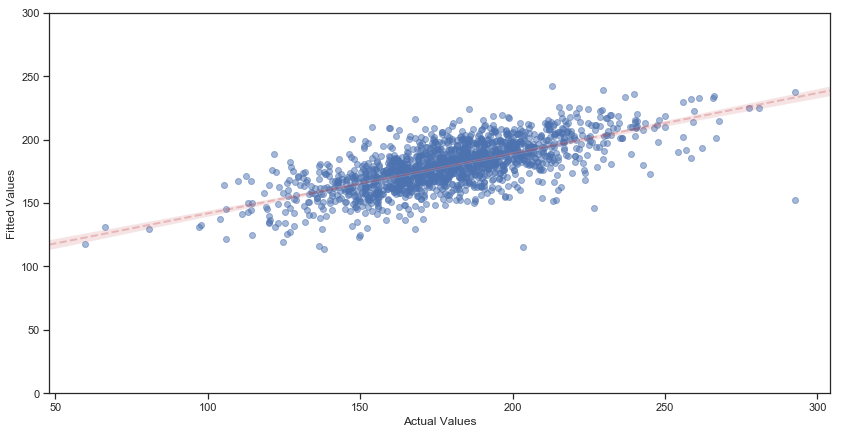

Pearson R:  (0.6887165691249137, 1.1871591600892945e-214)


In [38]:
# plot predicted vs actual
plt.figure(figsize=(14,7))
sns.regplot(y_train, results.fittedvalues, line_kws={'color':'r', 'alpha':0.3, 
                                              'linestyle':'--', 'linewidth':2}, 
            scatter_kws={'alpha':0.5})
plt.ylim(0,300)
plt.xlabel('Actual Values')
plt.ylabel('Fitted Values')
plt.show()
print("Pearson R: ", stats.pearsonr(results.fittedvalues, y_train))

- From the plot we can infer that fitted values and actual values are collinear.
- The fiitet values sticks to the reggression line so there is no assumption violated.
- For the lower values on the X-axis and  higher values on the X-axis the points are all very near the regression line.
- Consistent with our reported R^2 value, we now visualize the strong correlation between actual and predicted values.
- no assumption are violated

#### Plotting actual values versus residuals

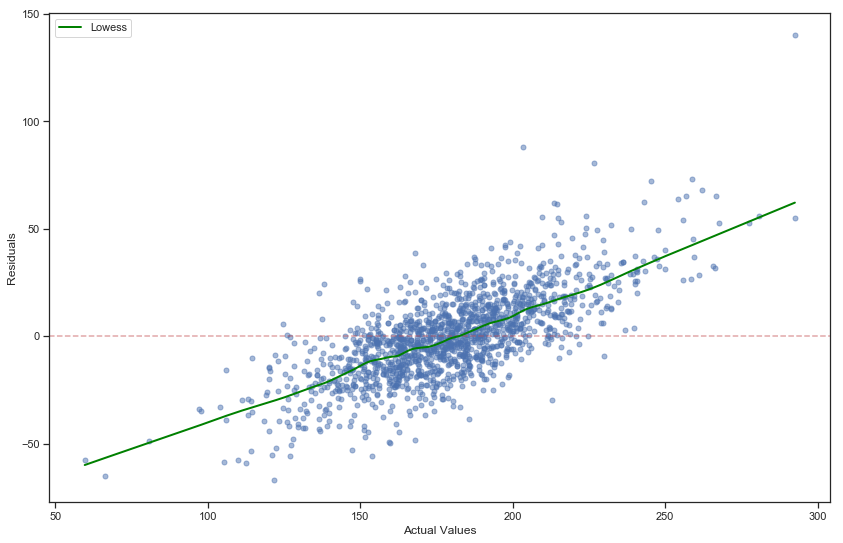

Pearson R: (0.725030680325189, 1.2877719207998599e-248)


In [39]:
from statsmodels.nonparametric.smoothers_lowess import lowess
ys = lowess(results.resid.values, y_train, frac=0.2)
ys = pd.DataFrame(ys, index=range(len(ys)), columns=['a', 'b'])
ys = ys.sort_values(by='a')

fig, ax = plt.subplots(figsize=(14,9))
plt.scatter(y_train, results.resid, alpha=0.5, s=25)
plt.axhline(y=0, color='r', linestyle="--", alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Residuals")

plt.plot(ys.a, ys.b, c='green', linewidth=2, label="Lowess")
plt.legend()
plt.show()
print("Pearson R:", stats.pearsonr(y_train, results.resid))

- A residual plot is a graph that shows the residuals on the vertical axis and the independent variable on the horizontal axis.
- This chart suggests values are plottet randomly and linear Model is appropriate for data.

### Cross-Validation

In [40]:
modelL1 = LinearRegression()
model = modelL1.fit(X_train,y_train)

In [41]:
predictions_linear=model.predict(X_test)
predictions_linear

array([203.07248192, 158.13290746, 192.69729328, ..., 173.12614949,
       185.81055814, 217.50690034])

#### Comparing Both the output for first 5 values

In [42]:
print ('Actual Predictions :' )
print(predictions[0:5])
print ('Cross-Validation Predictions :')
print(predictions_linear[0:5])

Actual Predictions :
1203    203.072482
1298    158.132907
732     192.697293
1439    215.186866
251     132.551933
dtype: float64
Cross-Validation Predictions :
[203.07248192 158.13290746 192.69729328 215.18686584 132.55193289]


- from both the results we can infer that the our predictions are currect for the model

In [43]:
# R-Square value calculted 5 times
scores_train = cross_val_score(model, X_train,y_train, cv=5)
print(scores_train)
print("Accuracy:  %0.2f (+/- %0.2f): " % (scores_train.mean(),scores_train.std()*2))

[0.42537474 0.47878728 0.46959025 0.49237867 0.45522543]
Accuracy:  0.46 (+/- 0.05): 


In [44]:
scores_test = cross_val_score(model, X_test,y_test, cv=5)
print(scores_train )
print("Accuracy:  %0.2f (+/- %0.2f): " % (scores_train.mean(),scores_train.std()*2))

[0.42537474 0.47878728 0.46959025 0.49237867 0.45522543]
Accuracy:  0.46 (+/- 0.05): 


### Multicollinearity

AxesSubplot(0.125,0.125;0.62x0.755)


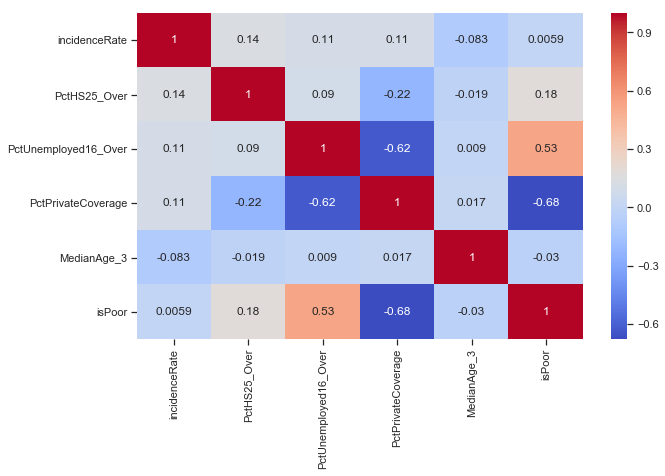

In [45]:
plt.figure(figsize=(10,6))
print(sns.heatmap(x1.corr(), annot=True,cmap='coolwarm'))
plt.show()

- Only PctPrivateCoverage has high correlation with PctUnemployed16_over and isPoor.

Let's apply variance inflation factors to assess for multicollinearity. VIFs, by performing an independent variable on the design matrix comprising all the other independent variables, allows us to assess the degree to which that independent variable is orthogonal the others. 
Larger VIFs indicate multicollinearity. 



In [46]:
pd.DataFrame([[var, variance_inflation_factor(x.values, x.columns.get_loc(var))] for var in x.columns],
                   index=range(x.shape[1]), columns=['Variable', 'VIF'])

Variable         VIF
0                 const  199.351006
1         incidenceRate    1.114979
2          PctHS25_Over    1.097244
3  PctUnemployed16_Over    1.797545
4    PctPrivateCoverage    2.471190
5           MedianAge_3    1.010313
6                isPoor    1.932883

Variance Inflation Factor (VIF) – the variance inflation factor of the linear regression is defined as VIF = 1/T. With VIF > 10 there is an indication that multicollinearity may be present; with VIF > 100 there is certainly multicollinearity among the variables. 
In the above model, Multicollinearity is present.

All the predictors have acceptable VIF.

- In Backword Selection method; we are going to check which predictors performs well and we will be removing predictots which have high P-stats and comparing the output. 
- Here our Traget variable is 'isPoor'

## Regularization 

- Regularization is a method for "constraining" or "regularizing" the size of the coefficients, thus "shrinking" them towards zero.
- It reduces model variance which minimizes overfitting.

For a regularized linear regression model, we minimize the sum of RSS and a "penalty term" that penalizes coefficient size.

### Ridge Regression

In [47]:
df_norm=df_cancer_data

In [48]:
df_norm=df_norm.drop('binnedInc', axis=1)
df_norm=df_norm.drop('Geography', axis=1)

In [49]:
# Ridge regression with an alpha of 0.5
y_norm=df_norm['TARGET_deathRate']
# x_norm = df_norm[['TARGET_deathRate','incidenceRate','medIncome','povertyPercent','PctHS25_Over','PctEmployed16_Over','PctUnemployed16_Over','PctPrivateCoverage','PctPrivateCoverageAlone','PctPublicCoverage','PctPublicCoverageAlone']]
x_norm = df_norm[['incidenceRate','PctHS25_Over','PctUnemployed16_Over','PctPrivateCoverage','MedianAge_3','isPoor']]

X_train, X_test, y_train, y_test = train_test_split(x_norm,y_norm,test_size=0.2)
ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(X_train,y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Text(0.5, 1.0, 'Ridge Regression - TARGET_deathRate vs Predicted TARGET_deathRate: $Y_i$ vs $\\hat{y}_i$')

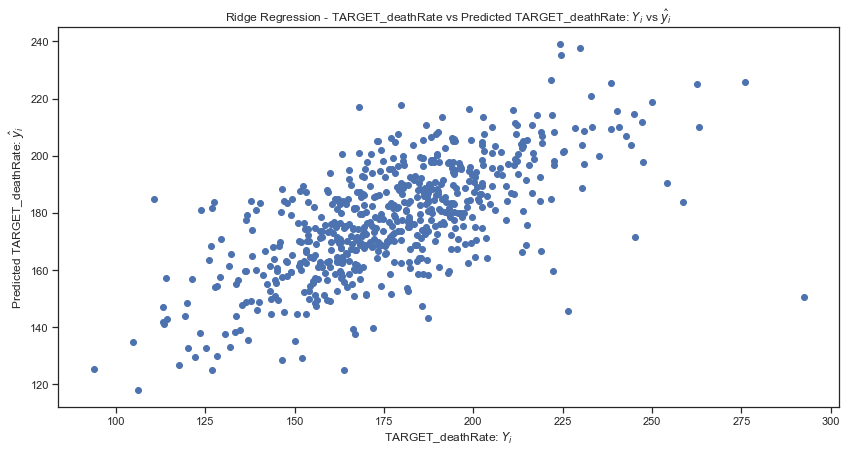

In [50]:
y_pred = ridge.predict(X_test)
plt.figure(figsize=(14,7))
plt.scatter(y_test, y_pred)
plt.xlabel("TARGET_deathRate: $Y_i$")
plt.ylabel("Predicted TARGET_deathRate: $\hat{y}_i$")
plt.title("Ridge Regression - TARGET_deathRate vs Predicted TARGET_deathRate: $Y_i$ vs $\hat{y}_i$")

#### Calculating Evaluation Matrics -RMSE

In [51]:
rmse_norm = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse_norm

20.677213426652347

In [52]:
linreg = LinearRegression()
# Train the model using the training sets
linreg.fit(x_norm,y_norm)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [53]:
X_kf=np.array(x_norm)
y_kf=np.array(y_norm)
# Define the split - into 2 folds 
kf=KFold(n_splits=5,shuffle=False, random_state=None) 
#Returns the number of splitting iterations in the cross-validator
kf.get_n_splits(X_kf)

5

In [54]:
for train_index, test_index in kf.split(X_kf):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_kf[train_index], X_kf[test_index]

TRAIN: [ 610  611  612 ... 3044 3045 3046] TEST: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 2

 1822 1823 1824 1825 1826 1827 1828]
TRAIN: [   0    1    2 ... 3044 3045 3046] TEST: [1829 1830 1831 1832 1833 1834 1835 1836 1837 1838 1839 1840 1841 1842
 1843 1844 1845 1846 1847 1848 1849 1850 1851 1852 1853 1854 1855 1856
 1857 1858 1859 1860 1861 1862 1863 1864 1865 1866 1867 1868 1869 1870
 1871 1872 1873 1874 1875 1876 1877 1878 1879 1880 1881 1882 1883 1884
 1885 1886 1887 1888 1889 1890 1891 1892 1893 1894 1895 1896 1897 1898
 1899 1900 1901 1902 1903 1904 1905 1906 1907 1908 1909 1910 1911 1912
 1913 1914 1915 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926
 1927 1928 1929 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940
 1941 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954
 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968
 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982
 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996
 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2

In [55]:
scores = []
for train, test in kf.split(X_kf):
    linreg.fit(X_kf[train],y_kf[train])
    scores.append(np.sqrt(metrics.mean_squared_error(y_kf[test], linreg.predict(X_kf[test]))))
# scores
np.around(scores, decimals=2)

array([20.37, 19.8 , 20.31, 19.71, 20.83])

In [56]:
print('Mean           : ',round(np.mean(scores),2))
print('Median         : ',round(np.median(scores),2))
print('Std. Deviation : ',round(np.std(scores),2))

Mean           :  20.2
Median         :  20.31
Std. Deviation :  0.41


In [57]:
def show_stats(m, ncv, cv):
    print('Method: %s' %m)
    print('RMSE on no CV training: %.3f' %ncv)
    print('RMSE on 5-fold CV: %.3f' %cv)

In [58]:
show_stats('Simple Linear Regression',rmse_norm ,np.mean(scores))

Method: Simple Linear Regression
RMSE on no CV training: 20.677
RMSE on 5-fold CV: 20.202


In [59]:
print('Ridge Regression')
print('alpha\t RMSE_train\t RMSE_cv\n')
alpha = np.linspace(.01,20,50)
t_rmse = np.array([])
cv_rmse = np.array([])

for a in alpha:
    ridge = Ridge(fit_intercept=True, alpha=a)  
    # computing the RMSE on training data
    ridge.fit(X_kf,y_kf)
    y_pred = ridge.predict(X_kf)
    err = y_pred-y_kf    
    # Dot product of error vector with itself gives us the sum of squared errors
    total_error = np.dot(err,err)
    rmse_train = np.sqrt(total_error/len(y_pred))

    # computing RMSE using 5-fold cross validation
    kf = KFold(len(X_kf))
    xval_err = 0
    for train, test in kf.split(X_kf):
        ridge.fit(X_kf[train], y_kf[train])
        y_pred = ridge.predict(X_kf[test])
        err = y_pred - y_kf[test]
        xval_err += np.dot(err,err)
    rmse_cv = np.sqrt(xval_err/len(X_kf))
    
    t_rmse = np.append(t_rmse, [rmse_train])
    cv_rmse = np.append(cv_rmse, [rmse_cv])
    print('{:.3f}\t {:.4f}\t\t {:.4f}'.format(a,rmse_train,rmse_cv))

Ridge Regression
alpha	 RMSE_train	 RMSE_cv

0.010	 19.9703		 20.0280
0.418	 19.9703		 20.0280
0.826	 19.9703		 20.0280
1.234	 19.9703		 20.0280
1.642	 19.9703		 20.0279
2.050	 19.9703		 20.0279
2.458	 19.9703		 20.0279
2.866	 19.9703		 20.0279
3.274	 19.9703		 20.0278
3.682	 19.9703		 20.0278
4.090	 19.9703		 20.0278
4.498	 19.9703		 20.0278
4.906	 19.9703		 20.0277
5.313	 19.9704		 20.0277
5.721	 19.9704		 20.0277
6.129	 19.9704		 20.0277
6.537	 19.9704		 20.0277
6.945	 19.9704		 20.0277
7.353	 19.9704		 20.0276
7.761	 19.9704		 20.0276
8.169	 19.9704		 20.0276
8.577	 19.9705		 20.0276
8.985	 19.9705		 20.0276
9.393	 19.9705		 20.0276
9.801	 19.9705		 20.0276
10.209	 19.9705		 20.0276
10.617	 19.9705		 20.0276
11.025	 19.9706		 20.0275
11.433	 19.9706		 20.0275
11.841	 19.9706		 20.0275
12.249	 19.9706		 20.0275
12.657	 19.9706		 20.0275
13.065	 19.9707		 20.0275
13.473	 19.9707		 20.0275
13.881	 19.9707		 20.0275
14.289	 19.9707		 20.0275
14.697	 19.9708		 20.0275
15.104	 19.9708		 

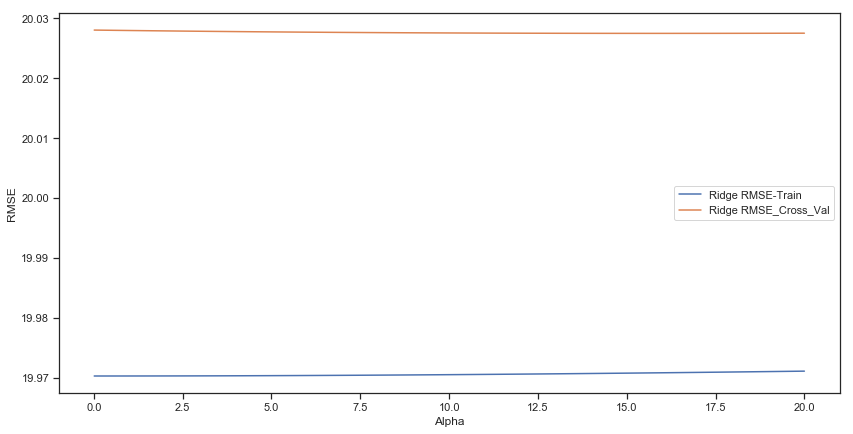

In [60]:
plt.figure(figsize=(14,7))
pl.plot(alpha, t_rmse, label='RMSE-Train')
pl.plot(alpha, cv_rmse, label='RMSE_Cross_Val')
pl.legend( ('Ridge RMSE-Train', 'Ridge RMSE_Cross_Val') )
pl.ylabel('RMSE')
pl.xlabel('Alpha')
pl.show()

In Ridge Regression:
The cross validation between RMSE_train and RMSE_cv shows the root mean square error for train and cross validation values  very close 

## Implementing H2O

#### Initialising the H20

In [61]:
pct_memory=0.95
virtual_memory=psutil.virtual_memory()
print("Virtual Memory Size: ",virtual_memory)
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print("Minimum Memory Size: ",min_mem_size)

Virtual Memory Size:  svmem(total=16902189056, available=6745628672, percent=60.1, used=10156560384, free=6745628672)
Minimum Memory Size:  6


#### Importing Dataset into H2O frame

In [62]:
data_path=None
all_variables=None
test_path=None
# target='search_term'
target=None
nthreads=1 
min_mem_size= min_mem_size 
# run_time=4000
classification=False
scale=False
max_models=None    
model_path=None
balance_y=False 
balance_threshold=0.2
name=None 
server_path=None  
analysis=2

In [63]:
# Functions

def alphabet(n):
  alpha='0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'    
  str=''
  r=len(alpha)-1   
  while len(str)<n:
    i=random.randint(0,r)
    str+=alpha[i]   
  return str
  
  
def set_meta_data(analysis,run_id,server,data,test,model_path,target,run_time,classification,scale,model,balance,balance_threshold,name,path,nthreads,min_mem_size):
  m_data={}
  m_data['start_time'] = time.time()
  m_data['target']=target
#   m_data['predictors']=predictors
  m_data['server_path']=server
  m_data['data_path']=data 
  m_data['test_path']=test
  m_data['max_models']=model
  m_data['run_time']=run_time
  m_data['run_id'] =run_id
  m_data['scale']=scale
  m_data['classification']=classification
  m_data['scale']=False
  m_data['model_path']=model_path
  m_data['balance']=balance
  m_data['balance_threshold']=balance_threshold
  m_data['project'] =name
  m_data['end_time'] = time.time()
  m_data['execution_time'] = 0.0
  m_data['run_path'] =path
  m_data['nthreads'] = nthreads
  m_data['min_mem_size'] = min_mem_size
  m_data['analysis'] = analysis
  m_data['Main_Eval_metrix'] = "RMSE"
  return m_data


def dict_to_json(dct,n):
  j = json.dumps(dct, indent=4)
  f = open(n, 'w')
  print(j, file=f)
  f.close()
  
  
def stackedensemble(mod):
    coef_norm=None
    try:
      metalearner = h2o.get_model(mod.metalearner()['name'])
      coef_norm=metalearner.coef_norm()
    except:
      pass        
    return coef_norm

def stackedensemble_df(df):
    bm_algo={ 'GBM': None,'GLM': None,'DRF': None,'XRT': None,'Dee': None}
    for index, row in df.iterrows():
      if len(row['model_id'])>3:
        key=row['model_id'][0:3]
        if key in bm_algo:
          if bm_algo[key] is None:
                bm_algo[key]=row['model_id']
    bm=list(bm_algo.values()) 
    bm=list(filter(None.__ne__, bm))             
    return bm

def se_stats(modl):
    d={}
    d['algo']=modl.algo
    d['model_id']=modl.model_id   
    d['auc']=modl.auc()   
    d['roc']=modl.roc()
    d['mse']=modl.mse()   
    d['null_degrees_of_freedom']=modl.null_degrees_of_freedom()
    d['null_deviance']=modl.null_deviance()
    d['residual_degrees_of_freedom']=modl.residual_degrees_of_freedom()   
    d['residual_deviance']=modl.residual_deviance()
    d['rmse']=modl.rmse()
    return d

def get_model_by_algo(algo,models_dict):
    mod=None
    mod_id=None    
    for m in list(models_dict.keys()):
        if m[0:3]==algo:
            mod_id=m
            mod=h2o.get_model(m)      
    return mod,mod_id     
    
    
def gbm_stats(modl):
    d={}
    d['algo']=modl.algo
    d['model_id']=modl.model_id   
    d['varimp']=modl.varimp()  
    return d
    
    
def dl_stats(modl):
    d={}
    d['algo']=modl.algo
    d['model_id']=modl.model_id   
    d['varimp']=modl.varimp()  
    return d
    
    
def drf_stats(modl):
    d={}
    d['algo']=modl.algo
    d['model_id']=modl.model_id   
    d['varimp']=modl.varimp()  
    d['roc']=modl.roc()      
    return d
    
def xrt_stats(modl):
    d={}
    d['algo']=modl.algo
    d['model_id']=modl.model_id   
    d['varimp']=modl.varimp()  
    d['roc']=modl.roc()      
    return d
    
    
def glm_stats(modl):
    d={}
    d['algo']=modl.algo
    d['model_id']=modl.model_id   
    d['coef']=modl.coef()  
    d['coef_norm']=modl.coef_norm()      
    return d
    
def model_performance_stats(perf):
    d={}
    try:    
      d['mse']=perf.mse()
    except:
      pass      
    try:    
      d['rmse']=perf.rmse() 
    except:
      pass      
    try:    
      d['null_degrees_of_freedom']=perf.null_degrees_of_freedom()
    except:
      pass      
    try:    
      d['residual_degrees_of_freedom']=perf.residual_degrees_of_freedom()
    except:
      pass      
    try:    
      d['residual_deviance']=perf.residual_deviance() 
    except:
      pass      
    try:    
      d['null_deviance']=perf.null_deviance() 
    except:
      pass      
    try:    
      d['aic']=perf.aic() 
    except:
      pass      
    try:
      d['logloss']=perf.logloss() 
    except:
      pass    
    try:
      d['auc']=perf.auc()
    except:
      pass  
    try:
      d['gini']=perf.gini()
    except:
      pass    
    return d
    
def impute_missing_values(df, x, scal=False):
    # determine column types
    ints, reals, enums = [], [], []
    for key, val in df.types.items():
        if key in x:
            if val == 'enum':
                enums.append(key)
            elif val == 'int':
                ints.append(key)            
            else: 
                reals.append(key)    
    _ = df[reals].impute(method='mean')
    _ = df[ints].impute(method='median')
    if scal:
        df[reals] = df[reals].scale()
        df[ints] = df[ints].scale()    
    return


def get_independent_variables(df, targ):
    C = [name for name in df.columns if name != targ]
    # determine column types
    ints, reals, enums = [], [], []
    for key, val in df.types.items():
        if key in C:
            if val == 'enum':
                enums.append(key)
            elif val == 'int':
                ints.append(key)            
            else: 
                reals.append(key)    
    x=ints+enums+reals
    return x
    
def get_all_variables_csv(i):
    ivd={}
    try:
      iv = pd.read_csv(i,header=None)
    except:
      sys.exit(1)    
    col=iv.values.tolist()[0]
    dt=iv.values.tolist()[1]
    i=0
    for c in col:
      ivd[c.strip()]=dt[i].strip()
      i+=1        
    return ivd
    
    

def check_all_variables(df,dct,y=None):     
    targ=list(dct.keys())     
    for key, val in df.types.items():
        if key in targ:
          if dct[key] not in ['real','int','enum']:                      
            targ.remove(key)  
    for key, val in df.types.items():
        if key in targ:            
          if dct[key] != val:
            print('convert ',key,' ',dct[key],' ',val)
            if dct[key]=='enum':
                try:
                  df[key] = df[key].asfactor() 
                except:
                  targ.remove(key)                 
            if dct[key]=='int': 
                try:                
                  df[key] = df[key].asnumeric() 
                except:
                  targ.remove(key)                  
            if dct[key]=='real':
                try:                
                  df[key] = df[key].asnumeric()  
                except:
                  targ.remove(key)                  
    if y is None:
      y=df.columns[-1] 
    if y in targ:
      targ.remove(y)
    else:
      y=targ.pop()            
    return targ    
    
def predictions(mod,data,run_id):
    test = h2o.import_file(data)
    mod_perf=mod_best.model_performance(test)
              
    stats_test={}
    stats_test=model_performance_stats(mod_perf)

    n=run_id+'_test_stats.json'
    dict_to_json(stats_test,n) 

    try:    
      cf=mod_perf.confusion_matrix(metrics=["f1","f2","f0point5","accuracy","precision","recall","specificity","absolute_mcc","min_per_class_accuracy","mean_per_class_accuracy"])
      cf_df=cf[0].table.as_data_frame()
      cf_df.to_csv(run_id+'_test_confusion_matrix.csv')
    except:
      pass

    predictions = mod_best.predict(test)
    predictions_df=test.cbind(predictions).as_data_frame() 
    predictions_df.to_csv(run_id+'_predictions.csv')
    return

def predictions_test(mod,test,run_id):
    mod_perf=mod_best.model_performance(test)          
    stats_test={}
    stats_test=model_performance_stats(mod_perf)
    n=run_id+'_test_stats.json'
    dict_to_json(stats_test,n) 
    try:
      cf=mod_perf.confusion_matrix()
#      cf=mod_perf.confusion_matrix(metrics=["f1","f2","f0point5","accuracy","precision","recall","specificity","absolute_mcc","min_per_class_accuracy","mean_per_class_accuracy"])
      cf_df=cf.table.as_data_frame()
      cf_df.to_csv(run_id+'_test_confusion_matrix.csv')
    except:
      pass
    predictions = mod_best.predict(test)    
    predictions_df=test.cbind(predictions).as_data_frame() 
    predictions_df.to_csv(run_id+'_predictions.csv')
    return predictions

def check_X(x,df):
    for name in x:
        if name not in df.columns:
          x.remove(name)  
    return x    
    
    
def get_stacked_ensemble(lst):
    se=None
    for model in model_set:
      if 'BestOfFamily' in model:
        se=model
    if se is None:     
      for model in model_set:
        if 'AllModels'in model:
          se=model           
    return se       
    
def get_variables_types(df):
    d={}
    for key, val in df.types.items():
        d[key]=val           
    return d    

def Variable_imp_list(modl):
    d={}
    d['algo']=modl.algo
    d['model_id']=modl.model_id   
    d['varimp']=modl.varimp()  
    return d

#  End Functions

In [64]:
all_variables=None

#### Create function to extract Hyperparameters 

In [65]:
def Get_Hyperparameters(df_pandaFrame):
    
    GBM_list=['Model_name','Leaderboard_rank','learn_rate','learn_rate_annealing','max_abs_leafnode_pred','pred_noise_bandwidth','distribution','tweedie_power','quantile_alpha','huber_alpha','categorical_encoding','max_depth','sample_rate','col_sample_rate','ntrees','nfolds']
    df_gbm = pd.DataFrame(columns=GBM_list)


    GLM_list=['Model_name','Leaderboard_rank','nfolds','seed','tweedie_variance_power','tweedie_link_power','alpha','lambda','missing_values_handling','standardize']
    df_glm = pd.DataFrame(columns=GLM_list)

    # DRF and XRT are the same
    DRF_list=['Model_name','Leaderboard_rank','nfolds','seed','mtries','categorical_encoding']
    df_drf = pd.DataFrame(columns=DRF_list)

    Deeplearn_list=['Model_name','Leaderboard_rank','balance_classes','categorical_encoding','class_sampling_factors','distribution','huber_alpha','max_after_balance_size','max_runtime_secs','missing_values_handling','model_id','quantile_alpha','seed','standardize','stopping_metric','stopping_rounds','stopping_tolerance','tweedie_power']
    df_Deeplearn = pd.DataFrame(columns=Deeplearn_list)

    count=0
    cnt=0
    # aml_leaderboard_df=aml.leaderboard.as_data_frame()
    # model_set=aml_leaderboard_df['model_id']
    rows_list = []
    for rows in df_pandaFrame.iterrows():

        mod_best1=h2o.get_model(model_set[count])
        count=count+1
        hy_parameter = mod_best1.params

        if (mod_best1.algo == 'gbm' ):
    #         print(mod_best1.varimp())
            df_gbm=df_gbm.append({'Model_name':mod_best1.model_id,
                                    'Leaderboard_rank':count,
                                    'RMSE_VAL':mod_best1.rmse(xval=True),
                                    'learn_rate':hy_parameter['learn_rate']['actual'],
                                    'max_depth':hy_parameter['max_depth']['actual'],
                                    'sample_rate': hy_parameter['sample_rate']['actual'],
                                    'col_sample_rate':hy_parameter['col_sample_rate']['actual'],
                                    'ntrees':hy_parameter['ntrees']['actual'],
                                    'nfolds':hy_parameter['nfolds']['actual'],
                                    'learn_rate_annealing':hy_parameter['learn_rate_annealing']['actual'],
                                    'max_abs_leafnode_pred':hy_parameter['max_abs_leafnode_pred']['actual'],
                                    'pred_noise_bandwidth':hy_parameter['pred_noise_bandwidth']['actual'],
                                    'distribution':hy_parameter['distribution']['actual'],
                                    'tweedie_power':hy_parameter['tweedie_power']['actual'],
                                    'quantile_alpha':hy_parameter['quantile_alpha']['actual'],
                                    'huber_alpha':hy_parameter['huber_alpha']['actual'],
                                    'categorical_encoding':hy_parameter['categorical_encoding']['actual']},
                                 ignore_index=True)

        elif (mod_best1.algo == 'glm'):
            df_glm=df_glm.append({'Model_name':mod_best1.model_id,
                                    'Leaderboard_rank':count,
                                    'RMSE_VAL':mod_best1.rmse(xval=True),
                                    'nfolds':hy_parameter['nfolds']['actual'],
                                    'seed':hy_parameter['seed']['actual'],
                                    'tweedie_variance_power':hy_parameter['tweedie_variance_power']['actual'],
                                    'tweedie_link_power':hy_parameter['tweedie_link_power']['actual'],
                                    'alpha':hy_parameter['alpha']['actual'],
                                    'lambda':hy_parameter['lambda']['actual'],
                                    'missing_values_handling':hy_parameter['missing_values_handling']['actual'],
                                    'standardize':hy_parameter['standardize']['actual']},
                                 ignore_index=True)

        elif (mod_best1.algo == 'drf'):
            df_drf=df_drf.append({'Model_name':mod_best1.model_id,
                                    'Leaderboard_rank':count,
                                    'RMSE_VAL':mod_best1.rmse(xval=True),
                                    'nfolds':hy_parameter['nfolds']['actual'],
                                    'seed':hy_parameter['seed']['actual'],
                                    'mtries':hy_parameter['mtries']['actual'],
                                    'ntrees':hy_parameter['ntrees']['actual'],
                                    'max_depth':hy_parameter['max_depth']['actual'],
                                    'categorical_encoding':hy_parameter['categorical_encoding']['actual']},
                                 ignore_index=True)

        elif (mod_best1.algo == 'deeplearning'):
            df_Deeplearn=df_Deeplearn.append({'Model_name':mod_best1.model_id,
                                    'Leaderboard_rank':count,
                                    'RMSE_VAL':mod_best1.rmse(xval=True),
                                    'balance_classes': hy_parameter['balance_classes']['actual'],
                                    'max_after_balance_size': hy_parameter['max_after_balance_size']['actual'],
                                    'class_sampling_factors':hy_parameter['class_sampling_factors']['actual'],
                                    'activation':hy_parameter['activation']['actual'],
                                    'hidden':hy_parameter['hidden']['actual'],
                                    'epochs':hy_parameter['epochs']['actual'],
                                    'train_samples_per_iteration':hy_parameter['train_samples_per_iteration']['actual'],
                                    'target_ratio_comm_to_comp':hy_parameter['target_ratio_comm_to_comp']['actual'],
                                    'seed':hy_parameter['seed']['actual'],
                                    'adaptive_rate':hy_parameter['adaptive_rate']['actual'],
                                    'rho':hy_parameter['rho']['actual'],
                                    'epsilon':hy_parameter['epsilon']['actual'],
                                    'rate':hy_parameter['rate']['actual'],
                                    'rate_annealing':hy_parameter['rate_annealing']['actual'],
                                    'rate_decay':hy_parameter['rate_decay']['actual'],
                                    'momentum_start':hy_parameter['momentum_start']['actual'],
                                    'momentum_ramp':hy_parameter['momentum_ramp']['actual'],
                                    'momentum_stable':hy_parameter['momentum_stable']['actual'],                                          
                                    'nesterov_accelerated_gradient':hy_parameter['nesterov_accelerated_gradient']['actual'],
                                    'input_dropout_ratio':hy_parameter['input_dropout_ratio']['actual'],
                                    'hidden_dropout_ratios':hy_parameter['hidden_dropout_ratios']['actual'],
                                    'l1':hy_parameter['l1']['actual'],
                                    'initial_weight_distribution':hy_parameter['initial_weight_distribution']['actual'],
                                    'initial_weight_scale':hy_parameter['initial_weight_scale']['actual'],                                          
                                    'l2':hy_parameter['l2']['actual'],
                                    'max_w2':hy_parameter['max_w2']['actual'],
                                    'loss':hy_parameter['loss']['actual'],
                                    'initial_weights':hy_parameter['initial_weights']['actual'],
                                    'initial_biases':hy_parameter['initial_biases']['actual'],
                                    'distribution':hy_parameter['distribution']['actual'],                                          
                                    'tweedie_power':hy_parameter['tweedie_power']['actual'],
                                    'quantile_alpha':hy_parameter['quantile_alpha']['actual'],
                                    'score_interval':hy_parameter['score_interval']['actual'],
                                    'score_training_samples':hy_parameter['score_training_samples']['actual'],
                                    'score_validation_samples':hy_parameter['score_validation_samples']['actual'],
                                    'score_duty_cycle':hy_parameter['score_duty_cycle']['actual'],
                                    'classification_stop':hy_parameter['classification_stop']['actual'],
                                    'regression_stop':hy_parameter['regression_stop']['actual'],
                                    'score_validation_sampling':hy_parameter['score_validation_sampling']['actual'],                                          
                                    'overwrite_with_best_model':hy_parameter['overwrite_with_best_model']['actual'],
                                    'use_all_factor_levels':hy_parameter['use_all_factor_levels']['actual'],
                                    'standardize':hy_parameter['standardize']['actual'],
                                    'fast_mode':hy_parameter['fast_mode']['actual'],
                                    'variable_importances':hy_parameter['variable_importances']['actual'],                                          
                                    'fast_mode':hy_parameter['fast_mode']['actual'],
                                    'force_load_balance':hy_parameter['force_load_balance']['actual'],
                                    'replicate_training_data':hy_parameter['replicate_training_data']['actual'],
                                    'shuffle_training_data':hy_parameter['shuffle_training_data']['actual'],
                                    'missing_values_handling':hy_parameter['missing_values_handling']['actual'],
                                    'sparse':hy_parameter['sparse']['actual'],
                                    'col_major':hy_parameter['col_major']['actual'],
                                    'average_activation':hy_parameter['average_activation']['actual'],
                                    'sparsity_beta':hy_parameter['sparsity_beta']['actual'],                                          
                                    'max_categorical_features':hy_parameter['max_categorical_features']['actual'],
                                    'reproducible':hy_parameter['reproducible']['actual'],
                                    'elastic_averaging':hy_parameter['elastic_averaging']['actual'],
                                    'elastic_averaging_moving_rate':hy_parameter['elastic_averaging_moving_rate']['actual'],
                                    'elastic_averaging_regularization':hy_parameter['elastic_averaging_regularization']['actual'],
                                    'categorical_encoding':hy_parameter['categorical_encoding']['actual']

                                             },
                                 ignore_index=True)
#     stackedensemble
#     elif (mod_best1.algo == 'stackedensemble'):
#         for models in stack_models(mod_best1):
# #             print(mod_best1)
# #             print(models)
    return df_gbm,df_glm,df_drf,df_Deeplearn

#### Get Rang of the Hyperparameters

In [66]:
def get_rang(dataFrame):
    df_Range=pd.DataFrame(columns=['Hyperparameter_name',
                                   'Min_value',
#                                    'Mean_value','Median_value',
                                   'Max_value'])
    for columns in dataFrame:
#         if(dataFrame[columns].dtype =='float' or dataFrame[columns].dtype =='float'):
        if(columns!= 'Model_name' and columns!='Leaderboard_rank' and columns!='RMSE_VAL'):
            df_Range=df_Range.append({'Hyperparameter_name':columns,
                                        'Min_value':dataFrame[columns].min(),
#                                         'Mean_value':dataFrame[columns].mean(),
#                                         'Median_value':dataFrame[columns].median(),
                                        'Max_value':dataFrame[columns].max()
                                        },
                                     ignore_index=True)

    return df_Range

### Initialise and Start The H2O Cluster

In [67]:
# Connect to a cluster
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)      
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:51884..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.201-b09, mixed mode)
  Starting server from C:\Users\kaila\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\kaila\AppData\Local\Temp\tmpgi06trl2
  JVM stdout: C:\Users\kaila\AppData\Local\Temp\tmpgi06trl2\h2o_Kailash_started_from_python.out
  JVM stderr: C:\Users\kaila\AppData\Local\Temp\tmpgi06trl2\h2o_Kailash_started_from_python.err
  Server is running at http://127.0.0.1:51884
Connecting to H2O server at http://127.0.0.1:51884... successful.


--------------------------  -------------------------------
H2O cluster uptime:         01 secs
H2O cluster timezone:       America/New_York
H2O data parsing timezone:  UTC
H2O cluster version:        3.22.1.3
H2O cluster version age:    2 months and 28 days
H2O cluster name:           H2O_from_python_Kailash_h6d6gp
H2O cluster total nodes:    1
H2O cluster free memory:    5.750 Gb
H2O cluster total cores:    12
H2O cluster allowed cores:  12
H2O cluster status:         accepting new members, healthy
H2O connection url:         http://127.0.0.1:51884
H2O connection proxy:
H2O internal security:      False
H2O API Extensions:         Algos, AutoML, Core V3, Core V4
Python version:             3.7.1 final
--------------------------  -------------------------------

### Load The cleaned data to H2O Frame

In [68]:
# H2O_df = h2o.import_file("cancer_reg.csv")
H2O_df=h2o.H2OFrame(df_cancer_data)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [69]:
predictors=[x for x in H2O_df.columns if x not in ['TARGET_deathRate']]
Target='TARGET_deathRate'

### Model - 1 

In [70]:
# run_id="Runtime_1_333_Hyperparameter"
run_id=alphabet(9)
if server_path==None:
  server_path=os.path.abspath(os.curdir)
os.chdir(server_path) 
run_dir = os.path.join(server_path,run_id)
os.mkdir(run_id)
os.chdir(run_id)

# run_id to std_opt
print(run_id)

mjA2tAeR6


In [71]:
logfile=run_id+'_autoh2o_log.zip'
logs_path=os.path.join(run_dir,'logs')
print(logs_path,logfile)

C:\Users\kaila\OneDrive\Desktop\DSMT\HYPERPARAMETER-Project\mjA2tAeR6\logs mjA2tAeR6_autoh2o_log.zip


In [72]:
run_time=333

In [73]:
meta_data = set_meta_data(analysis, run_id,server_path,data_path,test_path,model_path,target,run_time,classification,scale,max_models,balance_y,balance_threshold,name,run_dir,nthreads,min_mem_size)
print(meta_data)

{'start_time': 1555977054.088654, 'target': None, 'server_path': 'C:\\Users\\kaila\\OneDrive\\Desktop\\DSMT\\HYPERPARAMETER-Project', 'data_path': None, 'test_path': None, 'max_models': None, 'run_time': 333, 'run_id': 'mjA2tAeR6', 'scale': False, 'classification': False, 'model_path': None, 'balance': False, 'balance_threshold': 0.2, 'project': None, 'end_time': 1555977054.088654, 'execution_time': 0.0, 'run_path': 'C:\\Users\\kaila\\OneDrive\\Desktop\\DSMT\\HYPERPARAMETER-Project\\mjA2tAeR6', 'nthreads': 1, 'min_mem_size': 6, 'analysis': 2, 'Main_Eval_metrix': 'RMSE'}


In [74]:
# dependent variable
# assign target and inputs for classification or regression
if target==None:
 target=H2O_df.columns[2]   #df['target_class']
y = target

In [75]:
if all_variables is not None:
 ivd=get_all_variables_csv(all_variables)
 print(ivd)
 X=check_all_variables(H2O_df,ivd,y)
 print(X)

In [76]:
# independent variables

X = []
if all_variables is None:
 X=get_independent_variables(H2O_df, y)
 print(X)
else:
 ivd=get_all_variables_csv(all_variables)
 X=check_all_variables(H2O_df, ivd)


X=check_X(X,H2O_df)

# Add independent variables
meta_data['X']=X


# impute missing values
_=impute_missing_values(H2O_df,X, scale)

['binnedInc', 'MedianAge', 'Geography', 'isPoor', 'MedianAge_1', 'MedianAge_2', 'MedianAge_3', 'avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctSomeCol18_24', 'PctBachDeg18_24', 'PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctUnemployed16_Over', 'PctPrivateCoverage', 'PctPrivateCoverageAlone', 'PctEmpPrivCoverage', 'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctWhite', 'PctBlack', 'PctAsian', 'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate']


In [77]:
if analysis == 2:
 classification=False
elif analysis == 1:
 classification=True

In [78]:
# Force target to be factors
# Only 'int' or 'string' are allowed for asfactor(), got Target (Total orders):real

if classification:
   H2O_df[y] = H2O_df[y].asfactor()

In [79]:
def check_y(y,df):
 ok=False
 C = [name for name in df.columns if name == y]
 for key, val in df.types.items():
   if key in C:
     if val in ['real','int','enum']:
       ok=True
 return ok

In [80]:
ok=check_y(y,H2O_df)
if not ok:
   print(ok)

In [81]:
classification=True
if classification:
   print(H2O_df[y].levels())

[]


In [82]:
allV=get_variables_types(H2O_df)
# allV

In [83]:
meta_data['variables']=allV

In [84]:
aml = H2OAutoML(max_runtime_secs = run_time, seed=27)

In [85]:
model_start_time = time.time()
aml.train(x=predictors, y=Target, training_frame=H2O_df)
model_end_time = time.time()

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [86]:
meta_data['model_execution_time'] = time.time() - model_start_time

In [87]:
# comma saperated predictors can put in metadata file
predictors_list=' ,'.join(predictors)

In [88]:
allV=get_variables_types(H2O_df)
meta_data['variables']=allV

#### Lets print the Leaderboard 

In [89]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

model_id mean_residual_deviance rmse mse mae rmsle 
 
 
 StackedEnsemble_AllModels_AutoML_20190422_195054 285.212 16.8882 285.212 12.4932 0.0967492 
 GBM_2_AutoML_20190422_195054 296.312 17.2137 296.312 12.7204 0.0986053 
 GBM_grid_1_AutoML_20190422_195054_model_19 297.805 17.257 297.805 12.8449 0.0991139 
 StackedEnsemble_BestOfFamily_AutoML_20190422_195054 298.17 17.2676 298.17 12.7344 0.0989276 
 GBM_1_AutoML_20190422_195054 302.954 17.4056 302.954 12.8275 0.100282 
 GBM_3_AutoML_20190422_195054 305.733 17.4852 305.733 12.9469 0.10038 
 GBM_5_AutoML_20190422_195054 310.978 17.6346 310.978 12.9831 0.101365 
 GBM_4_AutoML_20190422_195054 312.679 17.6827 312.679 13.1434 0.10155 
 GBM_grid_1_AutoML_20190422_195054_model_29 312.891 17.6887 312.891 13.0905 0.101521 
 GBM_grid_1_AutoML_20190422_195054_model_22 313.914 17.7176 313.914 13.0532 0.101222 
 GBM_grid_1_AutoML_20190422_195054_model_18 322.695 17.9637 322.695 13.2346 0.102997 
 GBM_grid_1_AutoML_20190422_195054_model_16 333.264 18.2555 333.264 13.4002 0.105135 
 GBM_grid_1_AutoML_20190422_195054_model_20 333.891 18.2727 333.891 13.4317 0.105286 
 GBM_grid_1_AutoML_20190422_195054_model_1 338.367 18.3948 338.367 13.5351 0.105873 
 GBM_grid_1_AutoML_20190422_195054_model_7 345.24 18.5806 345.24 13.8975 0.106389 
 GBM_grid_1_AutoML_20190422_195054_model_23 348.533 18.669 348.533 13.8396 0.107673 
 GBM_grid_1_AutoML_20190422_195054_model_11 350.245 18.7148 350.245 13.7788 0.107801 
 GBM_grid_1_AutoML_20190422_195054_model_9 358.363 18.9305 358.363 13.9087 0.108733 
 GBM_grid_1_AutoML_20190422_195054_model_13 369.994 19.2352 369.994 14.294 0.111085 
 GBM_grid_1_AutoML_20190422_195054_model_6 374.222 19.3448 374.222 14.3005 0.111632 
 GBM_grid_1_AutoML_20190422_195054_model_12 375.667 19.3821 375.667 14.4618 0.112274 
 GLM_grid_1_AutoML_20190422_195054_model_1 378.351 19.4513 378.351 14.4132 0.112061 
 DRF_1_AutoML_20190422_195054 378.708 19.4604 378.708 14.4314 0.112098 
 XRT_1_AutoML_20190422_195054 380.141 19.4972 380.141 14.406 0.112441 
 GBM_grid_1_AutoML_20190422_195054_model_30 387.395 19.6824 387.395 14.7434 0.11398 
 GBM_grid_1_AutoML_20190422_195054_model_4 391.056 19.7751 391.056 14.6347 0.114826 
 DeepLearning_1_AutoML_20190422_195054 395.675 19.8916 395.675 14.8046 0.114786 
 GBM_grid_1_AutoML_20190422_195054_model_27 397.308 19.9326 397.308 14.7583 0.115725 
 GBM_grid_1_AutoML_20190422_195054_model_10 404.818 20.1201 404.818 14.932 0.116868 
 GBM_grid_1_AutoML_20190422_195054_model_24 407.917 20.1969 407.917 15.149 0.116972 
 GBM_grid_1_AutoML_20190422_195054_model_28 410.594 20.2631 410.594 15.2174 0.117507 
 DeepLearning_grid_1_AutoML_20190422_195054_model_2 413.936 20.3454 413.936 15.3549 0.117704 
 GBM_grid_1_AutoML_20190422_195054_model_5 422.253 20.5488 422.253 15.3974 0.11904 
 GBM_grid_1_AutoML_20190422_195054_model_26 450.668 21.2289 450.668 16.0093 0.123037 
 DeepLearning_grid_1_AutoML_20190422_195054_model_4 471.616 21.7167 471.616 16.2498 0.125265 
 DeepLearning_grid_1_AutoML_20190422_195054_model_1 492.727 22.1975 492.727 16.8744 0.12851 
 DeepLearning_grid_1_AutoML_20190422_195054_model_3 501.942 22.4041 501.942 16.6587 0.129318 
 GBM_grid_1_AutoML_20190422_195054_model_31 700.826 26.4731 700.826 20.3594 0.152075 
 GBM_grid_1_AutoML_20190422_195054_model_17 737.878 27.1639 737.878 20.9652 0.155828 
 GBM_grid_1_AutoML_20190422_195054_model_25 739.042 27.1853 739.042 20.9792 0.155949 
 GBM_grid_1_AutoML_20190422_195054_model_15 740.958 27.2205 740.958 21.0092 0.156144 
 GBM_grid_1_AutoML_20190422_195054_model_14 742.417 27.2473 742.417 21.0359 0.15629 
 GBM_grid_1_AutoML_20190422_195054_model_2 742.482 27.2485 742.482 21.0314 0.156295 
 GBM_grid_1_AutoML_20190422_195054_model_8 743.01 27.2582 743.01 21.0301 0.156354 
 GBM_grid_1_AutoML_20190422_195054_model_3 743.051 27.259 743.051 21.0385 0.15636 
 GBM_grid_1_AutoML_20190422_195054_model_21 779.194 27.914 779.194 21.3305 0.162948

In [90]:
aml_leaderboard_df=aml.leaderboard.as_data_frame()
model_set=aml_leaderboard_df['model_id']
mod_best=h2o.get_model(model_set[0])
meta_data['mod_best']= h2o.get_model(model_set[0])._id 
meta_data['mod_best_algo']=h2o.get_model(model_set[0]).algo

In [91]:
meta_data['mod_best_algo']

'stackedensemble'

In [92]:
df_pandaFrame = lb.as_data_frame()
leaderboard_stats=run_id+'_leaderboard.json'
df_pandaFrame.to_json(leaderboard_stats)

In [93]:
count=0

for rows in df_pandaFrame.iterrows():
    
    mod_best1=h2o.get_model(model_set[count])
    count=count+1
    hy_parameter = mod_best1.params
    n= run_id + "_"+mod_best1._id + '_hy_parameter.json' 
    dict_to_json(hy_parameter,n)
#     hy_parameter.to_json(file_name)
#     print(hy_parameter)
#     output = pd.DataFrame()
#     output = output.append(hy_parameter, ignore_index=True)
    

In [94]:
best_models={}
best_models=stackedensemble(mod_best)
bm=[]
if best_models is not None: 
  if 'Intercept' in best_models.keys():
    del best_models['Intercept']
  bm=list(best_models.keys())
else:
  best_models={}
  bm=stackedensemble_df(aml_leaderboard_df)   
  for b in bm:   
    best_models[b]=None

if mod_best1.model_id not in bm:
    bm.append(mod_best.model_id)
    

In [95]:
meta_data['models']=bm

In [96]:
store_val=Variable_imp_list(h2o.get_model(model_set[1]))
# print(store_val)

In [97]:
df_varimp = pd.DataFrame(store_val['varimp'])
df_varimp.rename(columns={0:'Variable',1:'relative_importance',2:'scaled_importance',3:'percentage'}, inplace=True)
df_varimp.head(20)

Variable  relative_importance  scaled_importance  percentage
0        PctBachDeg25_Over         2.141773e+06           1.000000    0.202044
1            incidenceRate         1.867370e+06           0.871881    0.176158
2         avgDeathsPerYear         6.210444e+05           0.289967    0.058586
3             PctHS25_Over         6.203971e+05           0.289665    0.058525
4                medIncome         3.839289e+05           0.179258    0.036218
5       PctPrivateCoverage         3.731684e+05           0.174233    0.035203
6           povertyPercent         3.690529e+05           0.172312    0.034815
7   PctPublicCoverageAlone         2.812586e+05           0.131320    0.026532
8               popEst2015         2.782029e+05           0.129894    0.026244
9              avgAnnCount         2.551470e+05           0.119129    0.024069
10            PctOtherRace         2.388896e+05           0.111538    0.022536
11    PctUnemployed16_Over         2.384212e+05           0.111320    0.022491
12    PctMarriedHouseholds         2.319036e+05           0.108276    0.021877
13         MedianAgeFemale         2.248003e+05           0.104960    0.021206
14              PctHS18_24         2.117021e+05           0.098844    0.019971
15        AvgHouseholdSize         1.950254e+05           0.091058    0.018398
16                PctBlack         1.873497e+05           0.087474    0.017674
17          PercentMarried         1.766464e+05           0.082477    0.016664
18      PctEmployed16_Over         1.648648e+05           0.076976    0.015552
19                PctWhite         1.637937e+05           0.076476    0.015451

In [98]:
df_varimp=df_varimp.sort_values(by=['relative_importance'],ascending=False)
df_varimp['Variable'].head(27)

0          PctBachDeg25_Over
1              incidenceRate
2           avgDeathsPerYear
3               PctHS25_Over
4                  medIncome
5         PctPrivateCoverage
6             povertyPercent
7     PctPublicCoverageAlone
8                 popEst2015
9                avgAnnCount
10              PctOtherRace
11      PctUnemployed16_Over
12      PctMarriedHouseholds
13           MedianAgeFemale
14                PctHS18_24
15          AvgHouseholdSize
16                  PctBlack
17            PercentMarried
18        PctEmployed16_Over
19                  PctWhite
20                 Geography
21             MedianAgeMale
22                 BirthRate
23         PctPublicCoverage
24           PctBachDeg18_24
25              PctNoHS18_24
26                  PctAsian
Name: Variable, dtype: object

In [99]:
VarImp_Para= run_id + '__VariableImportance.json' 
df_varimp.to_json(VarImp_Para)


In [100]:
df_gbm1,df_glm1,df_drf1,df_Deeplearn1=Get_Hyperparameters(df_pandaFrame)

In [101]:
df_gbm1
# df_gbm[['Model_name','Leaderboard_rank','RMSE_VAL','learn_rate','max_depth','sample_rate','col_sample_rate','ntrees','nfolds']]

Model_name Leaderboard_rank  learn_rate  \
0                 GBM_2_AutoML_20190422_195054                2       0.100   
1   GBM_grid_1_AutoML_20190422_195054_model_19                3       0.100   
2                 GBM_1_AutoML_20190422_195054                5       0.100   
3                 GBM_3_AutoML_20190422_195054                6       0.100   
4                 GBM_5_AutoML_20190422_195054                7       0.100   
5                 GBM_4_AutoML_20190422_195054                8       0.100   
6   GBM_grid_1_AutoML_20190422_195054_model_29                9       0.100   
7   GBM_grid_1_AutoML_20190422_195054_model_22               10       0.080   
8   GBM_grid_1_AutoML_20190422_195054_model_18               11       0.050   
9   GBM_grid_1_AutoML_20190422_195054_model_16               12       0.050   
10  GBM_grid_1_AutoML_20190422_195054_model_20               13       0.050   
11   GBM_grid_1_AutoML_20190422_195054_model_1               14       0.050   
12   GBM_grid_1_AutoML_20190422_195054_model_7               15       0.500   
13  GBM_grid_1_AutoML_20190422_195054_model_23               16       0.100   
14  GBM_grid_1_AutoML_20190422_195054_model_11               17       0.100   
15   GBM_grid_1_AutoML_20190422_195054_model_9               18       0.050   
16  GBM_grid_1_AutoML_20190422_195054_model_13               19       0.008   
17   GBM_grid_1_AutoML_20190422_195054_model_6               20       0.100   
18  GBM_grid_1_AutoML_20190422_195054_model_12               21       0.008   
19  GBM_grid_1_AutoML_20190422_195054_model_30               25       0.008   
20   GBM_grid_1_AutoML_20190422_195054_model_4               26       0.008   
21  GBM_grid_1_AutoML_20190422_195054_model_27               28       0.010   
22  GBM_grid_1_AutoML_20190422_195054_model_10               29       0.008   
23  GBM_grid_1_AutoML_20190422_195054_model_24               30       0.008   
24  GBM_grid_1_AutoML_20190422_195054_model_28               31       0.005   
25   GBM_grid_1_AutoML_20190422_195054_model_5               33       0.008   
26  GBM_grid_1_AutoML_20190422_195054_model_26               34       0.005   
27  GBM_grid_1_AutoML_20190422_195054_model_31               38       0.008   
28  GBM_grid_1_AutoML_20190422_195054_model_17               39       0.001   
29  GBM_grid_1_AutoML_20190422_195054_model_25               40       0.001   
30  GBM_grid_1_AutoML_20190422_195054_model_15               41       0.001   
31  GBM_grid_1_AutoML_20190422_195054_model_14               42       0.001   
32   GBM_grid_1_AutoML_20190422_195054_model_2               43       0.001   
33   GBM_grid_1_AutoML_20190422_195054_model_8               44       0.001   
34   GBM_grid_1_AutoML_20190422_195054_model_3               45       0.001   
35  GBM_grid_1_AutoML_20190422_195054_model_21               46       0.800   

    learn_rate_annealing  max_abs_leafnode_pred  pred_noise_bandwidth  \
0                    1.0          1.797693e+308                   0.0   
1                    1.0          1.797693e+308                   0.0   
2                    1.0          1.797693e+308                   0.0   
3                    1.0          1.797693e+308                   0.0   
4                    1.0          1.797693e+308                   0.0   
5                    1.0          1.797693e+308                   0.0   
6                    1.0          1.797693e+308                   0.0   
7                    1.0          1.797693e+308                   0.0   
8                    1.0          1.797693e+308                   0.0   
9                    1.0          1.797693e+308                   0.0   
10                   1.0          1.797693e+308                   0.0   
11                   1.0          1.797693e+308                   0.0   
12                   1.0          1.797693e+308                   0.0   
13                   1.0          1.797693e+308                   0.0   
14               

In [102]:
df_Deeplearn1

Model_name Leaderboard_rank  \
0              DeepLearning_1_AutoML_20190422_195054               27   
1  DeepLearning_grid_1_AutoML_20190422_195054_mod...               32   
2  DeepLearning_grid_1_AutoML_20190422_195054_mod...               35   
3  DeepLearning_grid_1_AutoML_20190422_195054_mod...               36   
4  DeepLearning_grid_1_AutoML_20190422_195054_mod...               37   

  balance_classes categorical_encoding class_sampling_factors distribution  \
0           False                 AUTO                   None         AUTO   
1           False                 AUTO                   None         AUTO   
2           False                 AUTO                   None         AUTO   
3           False                 AUTO                   None         AUTO   
4           False                 AUTO                   None         AUTO   

   huber_alpha  max_after_balance_size  max_runtime_secs  \
0          NaN                     5.0               NaN   
1          NaN                     5.0               NaN   
2          NaN                     5.0               NaN   
3          NaN                     5.0               NaN   
4          NaN                     5.0               NaN   

  missing_values_handling         ...           score_training_samples  \
0          MeanImputation         ...                          10000.0   
1          MeanImputation         ...                          10000.0   
2          MeanImputation         ...                          10000.0   
3          MeanImputation         ...                          10000.0   
4          MeanImputation         ...                          10000.0   

   score_validation_samples score_validation_sampling shuffle_training_data  \
0                       0.0                   Uniform                   0.0   
1                       0.0                   Uniform                   0.0   
2                       0.0                   Uniform                   0.0   
3                       0.0                   Uniform                   0.0   
4                       0.0                   Uniform                   0.0   

   sparse  sparsity_beta  target_ratio_comm_to_comp  \
0     0.0            0.0                       0.05   
1     0.0            0.0                       0.05   
2     0.0            0.0                       0.05   
3     0.0            0.0                       0.05   
4     0.0            0.0                       0.05   

   train_samples_per_iteration  use_all_factor_levels variable_importances  
0                         -2.0                    1.0                  1.0  
1                         -2.0                    1.0                  1.0  
2                         -2.0                    1.0                  1.0  
3                         -2.0                    1.0                  1.0  
4                         -2.0                    1.0                  1.0  

[5 rows x 67 columns]

In [103]:
df_glm1

Model_name Leaderboard_rank nfolds seed  \
0  GLM_grid_1_AutoML_20190422_195054_model_1               22      5   27   

   tweedie_variance_power  tweedie_link_power                           alpha  \
0                     0.0                 1.0  [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]   

                                              lambda missing_values_handling  \
0  [1316.3608321859217, 817.4823784299322, 507.67...          MeanImputation   

  standardize   RMSE_VAL  
0        True  19.451254

In [104]:
df_drf1

Model_name Leaderboard_rank nfolds seed mtries  \
0  DRF_1_AutoML_20190422_195054               23      5   27     -1   
1  XRT_1_AutoML_20190422_195054               24      5   27     -1   

  categorical_encoding   RMSE_VAL  max_depth  ntrees  
0                 AUTO  19.460429       20.0    15.0  
1                 AUTO  19.497214       20.0    15.0

In [105]:
GBM_Para= run_id + "_GBM" + '_hyperparameters.json' 
df_gbm1.to_json(GBM_Para)

GLM_Para= run_id + "_GLM" + '_hyperparameters.json' 
df_glm1.to_json(GLM_Para)

DRF_para= run_id + "_DRF" + '_hyperparameters.json' 
df_drf1.to_json(DRF_para)

Deeplearn_para= run_id + "_Deeplearn" + '_hyperparameters.json' 
df_Deeplearn1.to_json(Deeplearn_para)


## Analysis

### Finding The range of hyperparameters:

#### GBM Model

In [106]:
range_gbm1 = get_rang(df_gbm1)
range_gbm1

Hyperparameter_name     Min_value     Max_value
0              learn_rate         0.001           0.8
1    learn_rate_annealing             1             1
2   max_abs_leafnode_pred  1.79769e+308  1.79769e+308
3    pred_noise_bandwidth             0             0
4            distribution      gaussian      gaussian
5           tweedie_power           1.5           1.5
6          quantile_alpha           0.5           0.5
7             huber_alpha           0.9           0.9
8    categorical_encoding          AUTO          AUTO
9               max_depth             3            17
10            sample_rate           0.5             1
11        col_sample_rate           0.4             1
12                 ntrees            15           256
13                 nfolds             5             5

#### GLM Model df_drf

In [107]:
range_glm1 =get_rang(df_glm1)
range_glm1

Hyperparameter_name                                          Min_value  \
0                   nfolds                                                  5   
1                     seed                                                 27   
2   tweedie_variance_power                                                  0   
3       tweedie_link_power                                                  1   
4                    alpha                     [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]   
5                   lambda  [1316.3608321859217, 817.4823784299322, 507.67...   
6  missing_values_handling                                     MeanImputation   
7              standardize                                               True   

                                           Max_value  
0                                                  5  
1                                                 27  
2                                                  0  
3                                                  1  
4                     [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]  
5  [1316.3608321859217, 817.4823784299322, 507.67...  
6                                     MeanImputation  
7                                               True

#### DRF/XRT Model

In [108]:
range_drf1 = get_rang(df_drf1)
range_drf1

Hyperparameter_name Min_value Max_value
0                nfolds         5         5
1                  seed        27        27
2                mtries        -1        -1
3  categorical_encoding      AUTO      AUTO
4             max_depth        20        20
5                ntrees        15        15

### Quest to find best Hyperparameters:  

#### While selecting best hyperparameters its important to give heed to Bias-Variance tradeoff.  Avoid overfitting or underfitting the model, and best way to do is to select and tune Hyperparameters which suitable for that type of dataset.

#### GBM Model:
gradient boosting combines weak "learners" into a single strong learner in an iterative fashion. <br />
Boosting is based on weak learners (high bias, low variance), so aim to decrease bias <br />
So its important to focus on hyperparameters which can do so.

- for GBM Model Number of trees, Tree depth, Step Size (learning rate) are important Hyperparameters. <br />
Reference link: https://machinelearningmastery.com/configure-gradient-boosting-algorithm/
<img src="Images/GBM_Model.png" width="800" align="Left" >
<img src="Images/GBM_Model2.png" width="800" align="Left" >

In [109]:
# sns.lmplot(x="sample_rate", y="RMSE_VAL", data=df_gbm[['RMSE_VAL','learn_rate','max_depth','sample_rate','col_sample_rate','ntrees','nfolds']], x_estimator=np.mean);

Text(0, 0.5, 'RMSE VALUE')

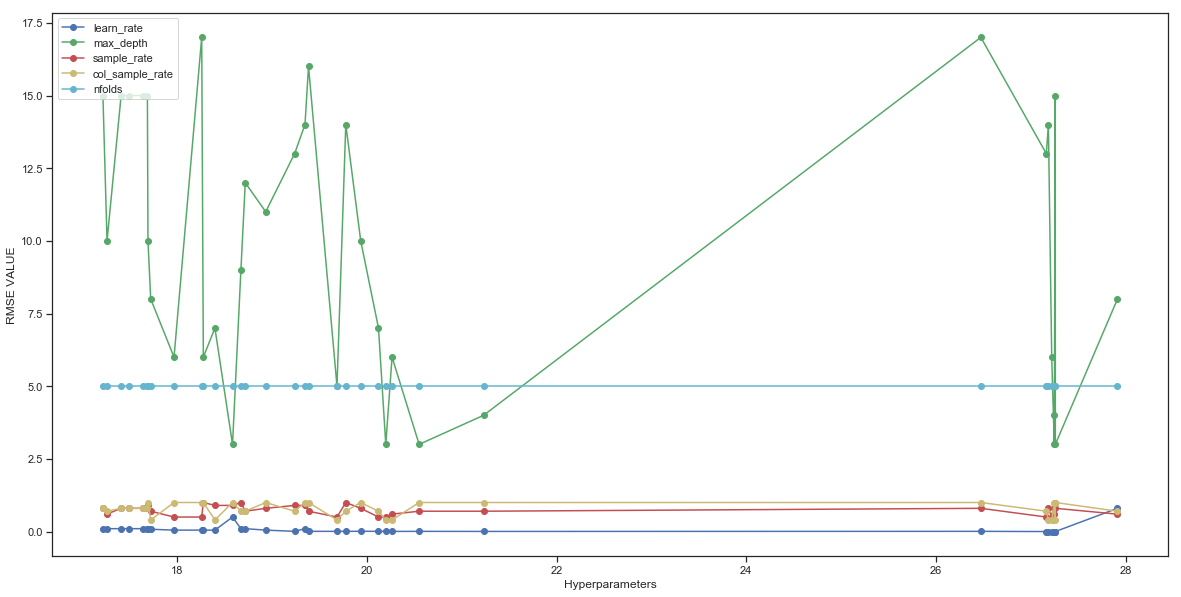

In [110]:
plt.figure(figsize=(20,10))
# Plot with differently-colored markers.
plt.plot(df_gbm1['RMSE_VAL'], df_gbm1[['learn_rate']], 'b-',  marker='o', label='learn_rate')
plt.plot(df_gbm1['RMSE_VAL'], df_gbm1['max_depth'], 'g-', marker='o', label='max_depth')
plt.plot(df_gbm1['RMSE_VAL'], df_gbm1['sample_rate'], 'r-', marker='o', label='sample_rate')
plt.plot(df_gbm1['RMSE_VAL'], df_gbm1['col_sample_rate'], 'y-',marker='o', label='col_sample_rate')
# plt.plot(df_gbm1['RMSE_VAL'], df_gbm1['ntrees'], 'y-',marker='o', label='ntrees')
plt.plot(df_gbm1['RMSE_VAL'], df_gbm1['nfolds'], 'c-', marker='o', label='nfolds')

# Create legend.
plt.legend(loc='upper left')
plt.xlabel('Hyperparameters')
plt.ylabel('RMSE VALUE')

In [111]:
hyper_parameters = {'learn_rate': [0.001,0.3,0.5,0.8],
#                     'max_depth': [3, 5, 9,17],
                    'sample_rate': [0.5,0.8, 1.0],
                    'col_sample_rate': [0.2, 0.5, 1.0]
#                     'ntrees': [14,70,140,210,256]
                   }
grid_search = H2OGridSearch(H2OGradientBoostingEstimator, hyper_params=hyper_parameters)
grid_search.train(x=predictors, y=Target, training_frame=H2O_df)
grid_search.show()

gbm Grid Build progress: |████████████████████████████████████████████████| 100%
     col_sample_rate learn_rate sample_rate  \
0                1.0        0.8         1.0   
1                1.0        0.5         1.0   
2                0.5        0.8         1.0   
3                1.0        0.5         0.8   
4                0.5        0.5         1.0   
5                1.0        0.8         0.8   
6                0.2        0.8         1.0   
7                0.5        0.8         0.8   
8                0.5        0.5         0.8   
9                1.0        0.3         1.0   
10               0.2        0.8         0.8   
11               1.0        0.3         0.8   
12               0.2        0.5         1.0   
13               0.5        0.3         1.0   
14               1.0        0.5         0.5   
15               0.2        0.5         0.8   
16               0.5        0.3         0.8   
17               1.0        0.3         0.5   
18               0.2      

In [112]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

hyper_parameters = {
                    'alpha': [0.01,0.3,0.5],
                    'lambda': [1e-5,1e-6,1e-7,1e-8]
#                     'learn_rate': [0.001,0.3,0.5,0.8]
#                     'max_depth': [3, 5, 9,17],
#                     'sample_rate': [0.5,0.8, 1.0],
#                     'col_sample_rate': [0.2, 0.5, 1.0],
#                     'ntrees': [14,70,140,210,256]
                   }

# test search_criteria plumbing and max_models 
# search_criteria = Cartesian
# family can be Gamma distribution, Gaussian,  Poisson distribution,  quasi-Poisson
search_criteria = { 'strategy': "RandomDiscrete", 'max_models': 3 }
max_models_g = H2OGridSearch(H2OGeneralizedLinearEstimator(family='Gamma'),hyper_parameters, search_criteria=search_criteria)
max_models_g.train(x=predictors, y=Target, training_frame=H2O_df)

max_models_g.show()
print(max_models_g.grid_id)
# print(max_models_g.sort_by('F1', False))

assert len(max_models_g.models) == 3, "expected 3 models, got: {}".format(len(max_models_g.models))
print("Print Metrics Table:")
print(max_models_g.sorted_metric_table())
print(max_models_g.get_grid("r2"))

# test search_criteria plumbing and asymptotic stopping
search_criteria = { 'strategy': "RandomDiscrete", 'seed': 42,
            'stopping_metric': "AUTO", 'stopping_tolerance': 0.1,
            'stopping_rounds': 2 }
asymp_g = H2OGridSearch(H2OGeneralizedLinearEstimator(family='Gamma', nfolds=5),
                    hyper_parameters, search_criteria=search_criteria)
asymp_g.train(x=predictors, y=Target, training_frame=H2O_df)

asymp_g.show()
print(asymp_g.grid_id)
# print(asymp_g.sort_by('F1', False))

assert len(asymp_g.models) == 5, "expected 5 models, got: {}".format(len(asymp_g.models))

glm Grid Build progress: |████████████████████████████████████████████████| 100%
      alpha    lambda  \
0    [0.01]  [1.0E-8]   
1     [0.5]  [1.0E-8]   
2     [0.5]  [1.0E-7]   

                                                               model_ids  \
0  Grid_GLM_Key_Frame__upload_9b3a55e4e2448d03fd8a345963a4300.hex_mod...   
1  Grid_GLM_Key_Frame__upload_9b3a55e4e2448d03fd8a345963a4300.hex_mod...   
2  Grid_GLM_Key_Frame__upload_9b3a55e4e2448d03fd8a345963a4300.hex_mod...   

    residual_deviance  
0  37.166521631288404  
1  37.166522266020955  
2  37.166522267101584  
Grid_GLM_Key_Frame__upload_9b3a55e4e2448d03fd8a345963a4300.hex_model_python_1555977051467_2
Print Metrics Table:
      alpha    lambda  \
0    [0.01]  [1.0E-8]   
1     [0.5]  [1.0E-8]   
2     [0.5]  [1.0E-7]   

                                                               model_ids  \
0  Grid_GLM_Key_Frame__upload_9b3a55e4e2448d03fd8a345963a4300.hex_mod...   
1  Grid_GLM_Key_Frame__upload_9b3a55e4e2448d03fd8a3

#### From our data-frame and Graph we can say that Hyperparameters like `learn_rate, max_depth, sample_rate, col_sample_rate, ntrees` changes as H2O process multiple GBM model to get better evaluation matric value. For every iteration this values get changed and perhaps get tuned to give better result as other didnt changed and kept to default. <br /> From our analysis this are the best hyperparameters for GBM models.

#### GLM Model
Regularization is used to attempt to solve problems with overfitting that can occur in GLM. <br /> Penalties can be introduced to the model building process to avoid overfitting, to reduce variance of the prediction error, and to handle correlated predictors.<br />  The two most common penalized models are ridge regression and LASSO (least absolute shrinkage and selection operator).<br />  The elastic net combines both penalties using both the alpha and lambda options (i.e., values greater than 0 for both).

- In GLM model alpha and lanmda are important hyperparameters

#### Random Forest (DRF/XRT)
There are typically two parameters in RF: number of trees and number of features to be selected at each node. <br /> Random Forest uses fully grown decision trees (low bias, high variance).<br /> It tackles the error reduction task in the opposite way: by reducing variance.

- Specify balance_classes, class_sampling_factors and max_after_balance_size to control over/under-sampling.

Text(0.5, 0, 'col_sample_rate')

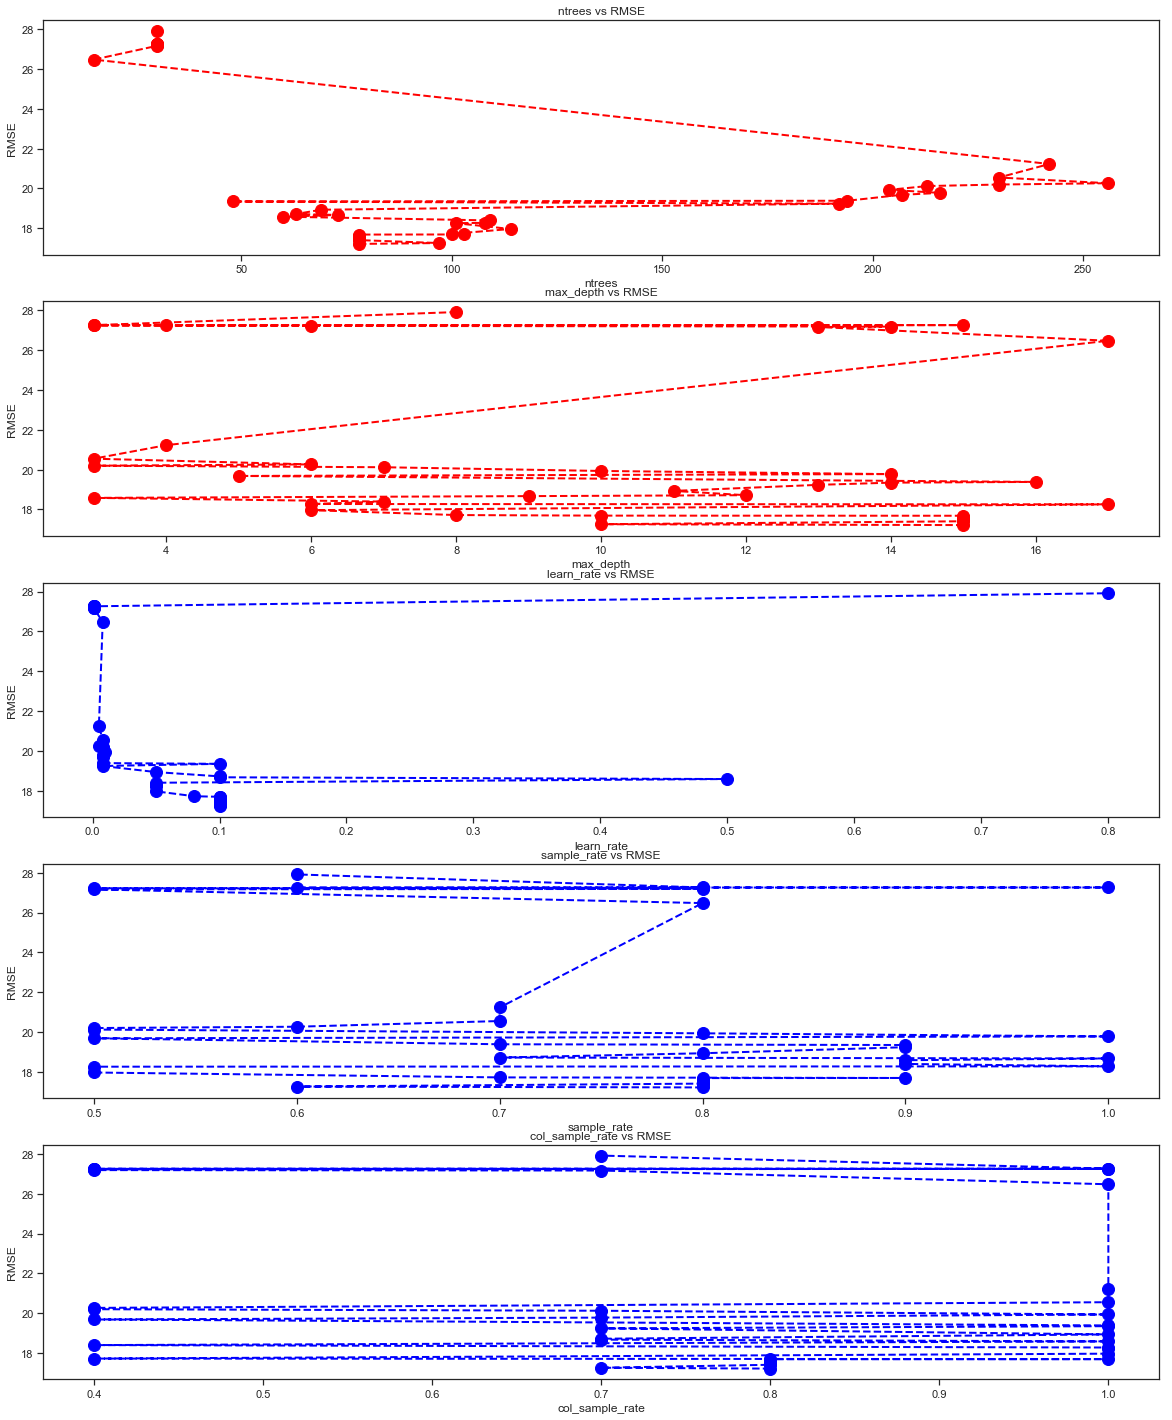

In [113]:
fig, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(5, 1, figsize=(20,25))

ax1.plot(df_gbm1['ntrees'],df_gbm1['RMSE_VAL'],color='red', marker='o', linestyle='none',linewidth=2, markersize=12)
ax1.set_title('ntrees vs RMSE')
ax1.set_ylabel('RMSE')
ax1.set_xlabel('ntrees')

ax2.plot(df_gbm1['max_depth'],df_gbm1['RMSE_VAL'],color='red', marker='o', linestyle='dashed',linewidth=2, markersize=12)
ax2.set_title('max_depth vs RMSE')
ax2.set_ylabel('RMSE')
ax2.set_xlabel('max_depth')

ax3.plot(df_gbm1['learn_rate'],df_gbm1['RMSE_VAL'],color='blue', marker='o', linestyle='dashed',linewidth=2, markersize=12)
ax3.set_title('learn_rate vs RMSE')
ax3.set_ylabel('RMSE')
ax3.set_xlabel('learn_rate')

ax4.plot(df_gbm1['sample_rate'],df_gbm1['RMSE_VAL'],color='blue', marker='o', linestyle='dashed',linewidth=2, markersize=12)
ax4.set_title('sample_rate vs RMSE')
ax4.set_ylabel('RMSE')
ax4.set_xlabel('sample_rate')

ax5.plot(df_gbm1['col_sample_rate'],df_gbm1['RMSE_VAL'],color='blue', marker='o', linestyle='dashed',linewidth=2, markersize=12)
ax5.set_title('col_sample_rate vs RMSE')
ax5.set_ylabel('RMSE')
ax5.set_xlabel('col_sample_rate')

#### Calculating Evaluation Matric - RMSE

In [114]:
aml_leaderboard_df=aml.leaderboard.as_data_frame()
model_set=aml_leaderboard_df['model_id']
mod_best1=h2o.get_model(model_set[0])

In [115]:
print("Best Model Name: ",mod_best.rmse())
print("RMSE of best iteration: ",mod_best.rmse())
print("RMSE on CV: ",mod_best.rmse(xval=True))

Best Model Name:  8.00098660917229
RMSE of best iteration:  8.00098660917229
RMSE on CV:  16.888208354208075


In [116]:
print(mod_best1.algo)

stackedensemble


In [117]:
n=run_id+'_metadata.json'
dict_to_json(meta_data,n)

### Model - 2 : Increasing AutoML running time

#### Create Random file to store this runtime data

In [118]:
# run_id="Runtime_1_333_Hyperparameter"
run_id=alphabet(9)
if server_path==None:
  server_path=os.path.abspath(os.curdir)
os.chdir(server_path) 
run_dir2 = os.path.join(server_path,run_id)
os.mkdir(run_id)
os.chdir(run_id)

# run_id to std_opt
print(run_id)

WWCv6fnhP


In [119]:
logfile=run_id+'_autoh2o_log.zip'
logs_path=os.path.join(run_dir,'logs')
print(logs_path,logfile)

C:\Users\kaila\OneDrive\Desktop\DSMT\HYPERPARAMETER-Project\mjA2tAeR6\logs WWCv6fnhP_autoh2o_log.zip


#### Initialized the H2o Server

In [120]:
# h2o.cluster().shutdown()

In [121]:
run_time=777

In [122]:
meta_data = set_meta_data(analysis, run_id,server_path,data_path,test_path,model_path,target,run_time,classification,scale,max_models,balance_y,balance_threshold,name,run_dir,nthreads,min_mem_size)
print(meta_data)

{'start_time': 1555977346.4792123, 'target': 'TARGET_deathRate', 'server_path': 'C:\\Users\\kaila\\OneDrive\\Desktop\\DSMT\\HYPERPARAMETER-Project', 'data_path': None, 'test_path': None, 'max_models': None, 'run_time': 777, 'run_id': 'WWCv6fnhP', 'scale': False, 'classification': True, 'model_path': None, 'balance': False, 'balance_threshold': 0.2, 'project': None, 'end_time': 1555977346.4792123, 'execution_time': 0.0, 'run_path': 'C:\\Users\\kaila\\OneDrive\\Desktop\\DSMT\\HYPERPARAMETER-Project\\mjA2tAeR6', 'nthreads': 1, 'min_mem_size': 6, 'analysis': 2, 'Main_Eval_metrix': 'RMSE'}


In [123]:
# dependent variable
# assign target and inputs for classification or regression
if target==None:
 target=H2O_df.columns[2]   #df['target_class']
y = target

In [124]:
allV=get_variables_types(H2O_df)
# allV
meta_data['variables']=allV

In [125]:
aml2 = H2OAutoML(max_runtime_secs = run_time, seed=27)

In [126]:
model_start_time = time.time()
aml2.train(x=predictors, y=Target, training_frame=H2O_df)
model_end_time = time.time()

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [127]:
meta_data['model_execution_time'] = time.time() - model_start_time

#### Lets print the Leaderboard 

In [128]:
# View the AutoML Leaderboard
lb2 = aml2.leaderboard
lb2.head(rows=lb2.nrows)  # Print all rows instead of default (10 rows)

model_id mean_residual_deviance rmse mse mae rmsle 
 
 
 GBM_grid_1_AutoML_20190422_195546_model_48 242.929 15.5862 242.929 11.3457 0.0898024 
 StackedEnsemble_AllModels_AutoML_20190422_195054 285.212 16.8882 285.212 12.4932 0.0967492 
 GBM_2_AutoML_20190422_195054 296.312 17.2137 296.312 12.7204 0.0986053 
 GBM_2_AutoML_20190422_195546 296.312 17.2137 296.312 12.7204 0.0986053 
 GBM_grid_1_AutoML_20190422_195546_model_19 297.805 17.257 297.805 12.8449 0.0991139 
 GBM_grid_1_AutoML_20190422_195054_model_19 297.805 17.257 297.805 12.8449 0.0991139 
 StackedEnsemble_BestOfFamily_AutoML_20190422_195054 298.17 17.2676 298.17 12.7344 0.0989276 
 GBM_1_AutoML_20190422_195546 302.954 17.4056 302.954 12.8275 0.100282 
 GBM_1_AutoML_20190422_195054 302.954 17.4056 302.954 12.8275 0.100282 
 GBM_3_AutoML_20190422_195054 305.733 17.4852 305.733 12.9469 0.10038 
 GBM_3_AutoML_20190422_195546 305.733 17.4852 305.733 12.9469 0.10038 
 GBM_5_AutoML_20190422_195054 310.978 17.6346 310.978 12.9831 0.101365 
 GBM_5_AutoML_20190422_195546 310.978 17.6346 310.978 12.9831 0.101365 
 GBM_4_AutoML_20190422_195546 312.679 17.6827 312.679 13.1434 0.10155 
 GBM_4_AutoML_20190422_195054 312.679 17.6827 312.679 13.1434 0.10155 
 GBM_grid_1_AutoML_20190422_195546_model_29 312.891 17.6887 312.891 13.0905 0.101521 
 GBM_grid_1_AutoML_20190422_195054_model_29 312.891 17.6887 312.891 13.0905 0.101521 
 GBM_grid_1_AutoML_20190422_195054_model_22 313.914 17.7176 313.914 13.0532 0.101222 
 GBM_grid_1_AutoML_20190422_195546_model_22 313.914 17.7176 313.914 13.0532 0.101222 
 GBM_grid_1_AutoML_20190422_195546_model_43 317.111 17.8076 317.111 13.3608 0.101715 
 GBM_grid_1_AutoML_20190422_195546_model_18 322.695 17.9637 322.695 13.2346 0.102997 
 GBM_grid_1_AutoML_20190422_195054_model_18 322.695 17.9637 322.695 13.2346 0.102997 
 GBM_grid_1_AutoML_20190422_195546_model_33 329.299 18.1466 329.299 13.3933 0.104281 
 GBM_grid_1_AutoML_20190422_195546_model_54 331.226 18.1996 331.226 13.4324 0.104166 
 GBM_grid_1_AutoML_20190422_195054_model_16 333.264 18.2555 333.264 13.4002 0.105135 
 GBM_grid_1_AutoML_20190422_195546_model_16 333.264 18.2555 333.264 13.4002 0.105135 
 GBM_grid_1_AutoML_20190422_195546_model_20 333.891 18.2727 333.891 13.4317 0.105286 
 GBM_grid_1_AutoML_20190422_195054_model_20 333.891 18.2727 333.891 13.4317 0.105286 
 GBM_grid_1_AutoML_20190422_195546_model_1 338.367 18.3948 338.367 13.5351 0.105873 
 GBM_grid_1_AutoML_20190422_195054_model_1 338.367 18.3948 338.367 13.5351 0.105873 
 GBM_grid_1_AutoML_20190422_195546_model_42 338.584 18.4007 338.584 13.647 0.105707 
 GBM_grid_1_AutoML_20190422_195546_model_50 339.757 18.4325 339.757 13.5688 0.105994 
 GBM_grid_1_AutoML_20190422_195546_model_7 345.24 18.5806 345.24 13.8975 0.106389 
 GBM_grid_1_AutoML_20190422_195054_model_7 345.24 18.5806 345.24 13.8975 0.106389 
 GBM_grid_1_AutoML_20190422_195546_model_23 348.533 18.669 348.533 13.8396 0.107673 
 GBM_grid_1_AutoML_20190422_195054_model_23 348.533 18.669 348.533 13.8396 0.107673 
 GBM_grid_1_AutoML_20190422_195546_model_11 350.245 18.7148 350.245 13.7788 0.107801 
 GBM_grid_1_AutoML_20190422_195054_model_11 350.245 18.7148 350.245 13.7788 0.107801 
 GBM_grid_1_AutoML_20190422_195054_model_9 358.363 18.9305 358.363 13.9087 0.108733 
 GBM_grid_1_AutoML_20190422_195546_model_9 358.363 18.9305 358.363 13.9087 0.108733 
 GBM_grid_1_AutoML_20190422_195546_model_52 362.859 19.0488 362.859 14.1052 0.109752 
 GBM_grid_1_AutoML_20190422_195546_model_41 368.862 19.2058 368.862 14.2908 0.111102 
 GBM_grid_1_AutoML_20190422_195546_model_13 369.994 19.2352 369.994 14.294 0.111085 
 GBM_grid_1_AutoML_20190422_195054_model_13 369.994 19.2352 369.994 14.294 0.111085 
 GBM_grid_1_AutoML_20190422_195546_model_39 372.685 19.305 372.685 14.3726 0.111592 
 GBM_grid_1_AutoML_20190422_195546_model_6 374.222 19.3448 374.222 14.3005 0.111632 
 GBM_grid_1_AutoML_20190422_195054_model_6 374.222 19.3448 374.222 14.3005 0.111632 
 GBM_grid_1_AutoML_20190422_195054_model_12 37

In [129]:
aml_leaderboard_df=aml2.leaderboard.as_data_frame()
model_set=aml_leaderboard_df['model_id']
mod_best=h2o.get_model(model_set[0])
meta_data['mod_best']= h2o.get_model(model_set[0])._id 
meta_data['mod_best_algo']=h2o.get_model(model_set[0]).algo

In [130]:
meta_data['mod_best_algo']

'gbm'

In [131]:
df_pandaFrame = lb2.as_data_frame()
leaderboard_stats=run_id+'_leaderboard.json'
df_pandaFrame.to_json(leaderboard_stats)

In [132]:
count=0

for rows in df_pandaFrame.iterrows():
    
    mod_best1=h2o.get_model(model_set[count])
    count=count+1
    hy_parameter = mod_best1.params
    n= run_id + "_"+mod_best1._id + '_hy_parameter.json' 
    dict_to_json(hy_parameter,n)    

In [133]:
best_models={}
best_models=stackedensemble(mod_best)
bm=[]
if best_models is not None: 
  if 'Intercept' in best_models.keys():
    del best_models['Intercept']
  bm=list(best_models.keys())
else:
  best_models={}
  bm=stackedensemble_df(aml_leaderboard_df)   
  for b in bm:   
    best_models[b]=None

if mod_best1.model_id not in bm:
    bm.append(mod_best.model_id)
    

In [134]:
meta_data['models']=bm

In [135]:
df_gbm2,df_glm2,df_drf2,df_Deeplearn2=Get_Hyperparameters(df_pandaFrame)

In [136]:
df_gbm2

Model_name Leaderboard_rank  learn_rate  \
0   GBM_grid_1_AutoML_20190422_195546_model_48                1       0.100   
1                 GBM_2_AutoML_20190422_195054                3       0.100   
2                 GBM_2_AutoML_20190422_195546                4       0.100   
3   GBM_grid_1_AutoML_20190422_195546_model_19                5       0.100   
4   GBM_grid_1_AutoML_20190422_195054_model_19                6       0.100   
5                 GBM_1_AutoML_20190422_195546                8       0.100   
6                 GBM_1_AutoML_20190422_195054                9       0.100   
7                 GBM_3_AutoML_20190422_195054               10       0.100   
8                 GBM_3_AutoML_20190422_195546               11       0.100   
9                 GBM_5_AutoML_20190422_195054               12       0.100   
10                GBM_5_AutoML_20190422_195546               13       0.100   
11                GBM_4_AutoML_20190422_195546               14       0.100   
12                GBM_4_AutoML_20190422_195054               15       0.100   
13  GBM_grid_1_AutoML_20190422_195546_model_29               16       0.100   
14  GBM_grid_1_AutoML_20190422_195054_model_29               17       0.100   
15  GBM_grid_1_AutoML_20190422_195054_model_22               18       0.080   
16  GBM_grid_1_AutoML_20190422_195546_model_22               19       0.080   
17  GBM_grid_1_AutoML_20190422_195546_model_43               20       0.500   
18  GBM_grid_1_AutoML_20190422_195546_model_18               21       0.050   
19  GBM_grid_1_AutoML_20190422_195054_model_18               22       0.050   
20  GBM_grid_1_AutoML_20190422_195546_model_33               23       0.080   
21  GBM_grid_1_AutoML_20190422_195546_model_54               24       0.080   
22  GBM_grid_1_AutoML_20190422_195054_model_16               25       0.050   
23  GBM_grid_1_AutoML_20190422_195546_model_16               26       0.050   
24  GBM_grid_1_AutoML_20190422_195546_model_20               27       0.050   
25  GBM_grid_1_AutoML_20190422_195054_model_20               28       0.050   
26   GBM_grid_1_AutoML_20190422_195546_model_1               29       0.050   
27   GBM_grid_1_AutoML_20190422_195054_model_1               30       0.050   
28  GBM_grid_1_AutoML_20190422_195546_model_42               31       0.080   
29  GBM_grid_1_AutoML_20190422_195546_model_50               32       0.050   
..                                         ...              ...         ...   
68  GBM_grid_1_AutoML_20190422_195546_model_38               80       0.005   
69  GBM_grid_1_AutoML_20190422_195546_model_35               81       0.005   
70  GBM_grid_1_AutoML_20190422_195054_model_26               83       0.005   
71  GBM_grid_1_AutoML_20190422_195546_model_26               84       0.005   
72  GBM_grid_1_AutoML_20190422_195546_model_32               89       0.800   
73  GBM_grid_1_AutoML_20190422_195546_model_57               91       0.800   
74  GBM_grid_1_AutoML_20190422_195546_model_51               92       0.500   
75  GBM_grid_1_AutoML_20190422_195546_model_45               93       0.800   
76  GBM_grid_1_AutoML_20190422_195054_model_31               94       0.008   
77  GBM_grid_1_AutoML_20190422_195546_model_37               95       0.001   
78  GBM_grid_1_AutoML_20190422_195054_model_17               96       0.001   
79  GBM_grid_1_AutoML_20190422_195546_model_17               97       0.001   
80  GBM_grid_1_AutoML_20190422_195054_model_25               98       0.001   
81  GBM_grid_1_AutoML_20190422_195546_model_25               99       0.001   
82  GBM_grid_1_AutoML_20190422_195054_model_15              100       0.001   
83  GBM_grid_1_AutoML_20190422_195546_model_15              101       0.001   
84  GBM_grid_1_AutoML_20190422_195546_model_40              102       0.001   
85  GBM_grid_1_AutoML_20190422_195054_model_14              103       0.001   
86  GBM_grid_1_AutoML_20190422_195546_model_14              104       0.001   
87   GB

In [137]:
df_glm2

Model_name Leaderboard_rank nfolds seed  \
0  GLM_grid_1_AutoML_20190422_195546_model_1               50      5   27   
1  GLM_grid_1_AutoML_20190422_195054_model_1               51      5   27   

   tweedie_variance_power  tweedie_link_power                           alpha  \
0                     0.0                 1.0  [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]   
1                     0.0                 1.0  [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]   

                                                                  lambda  \
0  [1316.3608321859217, 817.4823784299322, 507.6704067027967, 315.271...   
1  [1316.3608321859217, 817.4823784299322, 507.6704067027967, 315.271...   

  missing_values_handling standardize   RMSE_VAL  
0          MeanImputation        True  19.451254  
1          MeanImputation        True  19.451254

In [138]:
df_drf2

Model_name Leaderboard_rank nfolds seed mtries  \
0  DRF_1_AutoML_20190422_195546               52      5   27     -1   
1  DRF_1_AutoML_20190422_195054               53      5   27     -1   
2  XRT_1_AutoML_20190422_195054               54      5   27     -1   
3  XRT_1_AutoML_20190422_195546               55      5   27     -1   

  categorical_encoding   RMSE_VAL  max_depth  ntrees  
0                 AUTO  19.460429       20.0    15.0  
1                 AUTO  19.460429       20.0    15.0  
2                 AUTO  19.497214       20.0    15.0  
3                 AUTO  19.497214       20.0    15.0

In [139]:
df_Deeplearn2

Model_name Leaderboard_rank  \
0               DeepLearning_1_AutoML_20190422_195546               56   
1               DeepLearning_1_AutoML_20190422_195054               65   
2  DeepLearning_grid_1_AutoML_20190422_195054_model_2               77   
3  DeepLearning_grid_1_AutoML_20190422_195546_model_3               82   
4  DeepLearning_grid_1_AutoML_20190422_195054_model_4               85   
5  DeepLearning_grid_1_AutoML_20190422_195054_model_1               86   
6  DeepLearning_grid_1_AutoML_20190422_195546_model_1               87   
7  DeepLearning_grid_1_AutoML_20190422_195546_model_2               88   
8  DeepLearning_grid_1_AutoML_20190422_195054_model_3               90   

  balance_classes categorical_encoding class_sampling_factors distribution  \
0           False                 AUTO                   None         AUTO   
1           False                 AUTO                   None         AUTO   
2           False                 AUTO                   None         AUTO   
3           False                 AUTO                   None         AUTO   
4           False                 AUTO                   None         AUTO   
5           False                 AUTO                   None         AUTO   
6           False                 AUTO                   None         AUTO   
7           False                 AUTO                   None         AUTO   
8           False                 AUTO                   None         AUTO   

   huber_alpha  max_after_balance_size  max_runtime_secs  \
0          NaN                     5.0               NaN   
1          NaN                     5.0               NaN   
2          NaN                     5.0               NaN   
3          NaN                     5.0               NaN   
4          NaN                     5.0               NaN   
5          NaN                     5.0               NaN   
6          NaN                     5.0               NaN   
7          NaN                     5.0               NaN   
8          NaN                     5.0               NaN   

  missing_values_handling         ...           score_training_samples  \
0          MeanImputation         ...                          10000.0   
1          MeanImputation         ...                          10000.0   
2          MeanImputation         ...                          10000.0   
3          MeanImputation         ...                          10000.0   
4          MeanImputation         ...                          10000.0   
5          MeanImputation         ...                          10000.0   
6          MeanImputation         ...                          10000.0   
7          MeanImputation         ...                          10000.0   
8          MeanImputation         ...                          10000.0   

   score_validation_samples score_validation_sampling shuffle_training_data  \
0                       0.0                   Uniform                   0.0   
1                       0.0                   Uniform                   0.0   
2                       0.0                   Uniform                   0.0   
3                       0.0                   Uniform                   0.0   
4                       0.0                   Uniform                   0.0   
5                       0.0                   Uniform                   0.0   
6                       0.0                   Uniform                   0.0   
7                       0.0                   Uniform                   0.0   
8                       0.0                   Uniform                   0.0   

   sparse  sparsity_beta  target_ratio_comm_to_comp  \
0     0.0            0.0                       0.05   
1     0.0            0.0                       0.05   
2     0.0            0.0                       0.05   
3     0.0            0.0                       0.05   
4     0.0            0.0                       0.05   
5     0.0            0.0                       0.05   
6  

In [140]:
GBM_Para= run_id + "_GBM" + '_hyperparameters.json' 
df_gbm2.to_json(GBM_Para)

GLM_Para= run_id + "_GLM" + '_hyperparameters.json' 
df_glm2.to_json(GLM_Para)

DRF_para= run_id + "_DRF" + '_hyperparameters.json' 
df_drf2.to_json(DRF_para)

Deeplearn_para= run_id + "_Deeplearn" + '_hyperparameters.json' 
df_Deeplearn2.to_json(Deeplearn_para)

## Analysis

### Finding The range of hyperparameters:

#### GBM Model

In [141]:
range_gbm2 =get_rang(df_gbm2)
range_gbm2

Hyperparameter_name     Min_value     Max_value
0              learn_rate         0.001           0.8
1    learn_rate_annealing             1             1
2   max_abs_leafnode_pred  1.79769e+308  1.79769e+308
3    pred_noise_bandwidth             0             0
4            distribution      gaussian      gaussian
5           tweedie_power           1.5           1.5
6          quantile_alpha           0.5           0.5
7             huber_alpha           0.9           0.9
8    categorical_encoding          AUTO          AUTO
9               max_depth             3            17
10            sample_rate           0.5             1
11        col_sample_rate           0.4             1
12                 ntrees             2           256
13                 nfolds             5             5

In [142]:
range_glm2 =get_rang(df_glm2)
range_glm2

Hyperparameter_name  \
0                   nfolds   
1                     seed   
2   tweedie_variance_power   
3       tweedie_link_power   
4                    alpha   
5                   lambda   
6  missing_values_handling   
7              standardize   

                                                               Min_value  \
0                                                                      5   
1                                                                     27   
2                                                                      0   
3                                                                      1   
4                                         [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]   
5  [1316.3608321859217, 817.4823784299322, 507.6704067027967, 315.271...   
6                                                         MeanImputation   
7                                                                   True   

                                                               Max_value  
0                                                                      5  
1                                                                     27  
2                                                                      0  
3                                                                      1  
4                                         [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]  
5  [1316.3608321859217, 817.4823784299322, 507.6704067027967, 315.271...  
6                                                         MeanImputation  
7                                                                   True

In [143]:
range_drf2 = get_rang(df_drf2)
range_drf2

Hyperparameter_name Min_value Max_value
0                nfolds         5         5
1                  seed        27        27
2                mtries        -1        -1
3  categorical_encoding      AUTO      AUTO
4             max_depth        20        20
5                ntrees        15        15

### Quest to find best Hyperparameters:  

Text(0, 0.5, 'RMSE VALUE')

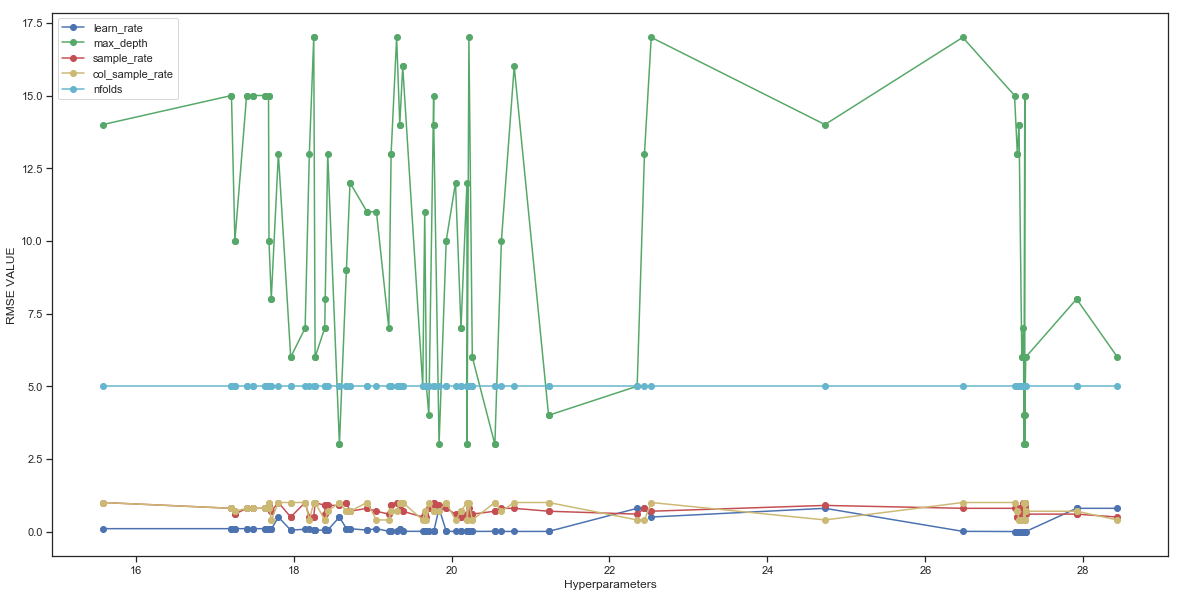

In [144]:
plt.figure(figsize=(20,10))
# Plot with differently-colored markers.
plt.plot(df_gbm2['RMSE_VAL'], df_gbm2[['learn_rate']], 'b-',  marker='o', label='learn_rate')
plt.plot(df_gbm2['RMSE_VAL'], df_gbm2['max_depth'], 'g-', marker='o', label='max_depth')
plt.plot(df_gbm2['RMSE_VAL'], df_gbm2['sample_rate'], 'r-', marker='o', label='sample_rate')
plt.plot(df_gbm2['RMSE_VAL'], df_gbm2['col_sample_rate'], 'y-',marker='o', label='col_sample_rate')
# plt.plot(df_gbm1['RMSE_VAL'], df_gbm1['ntrees'], 'y-',marker='o', label='ntrees')
plt.plot(df_gbm2['RMSE_VAL'], df_gbm2['nfolds'], 'c-', marker='o', label='nfolds')

# Create legend.
plt.legend(loc='upper left')
plt.xlabel('Hyperparameters')
plt.ylabel('RMSE VALUE')

Text(0.5, 0, 'col_sample_rate')

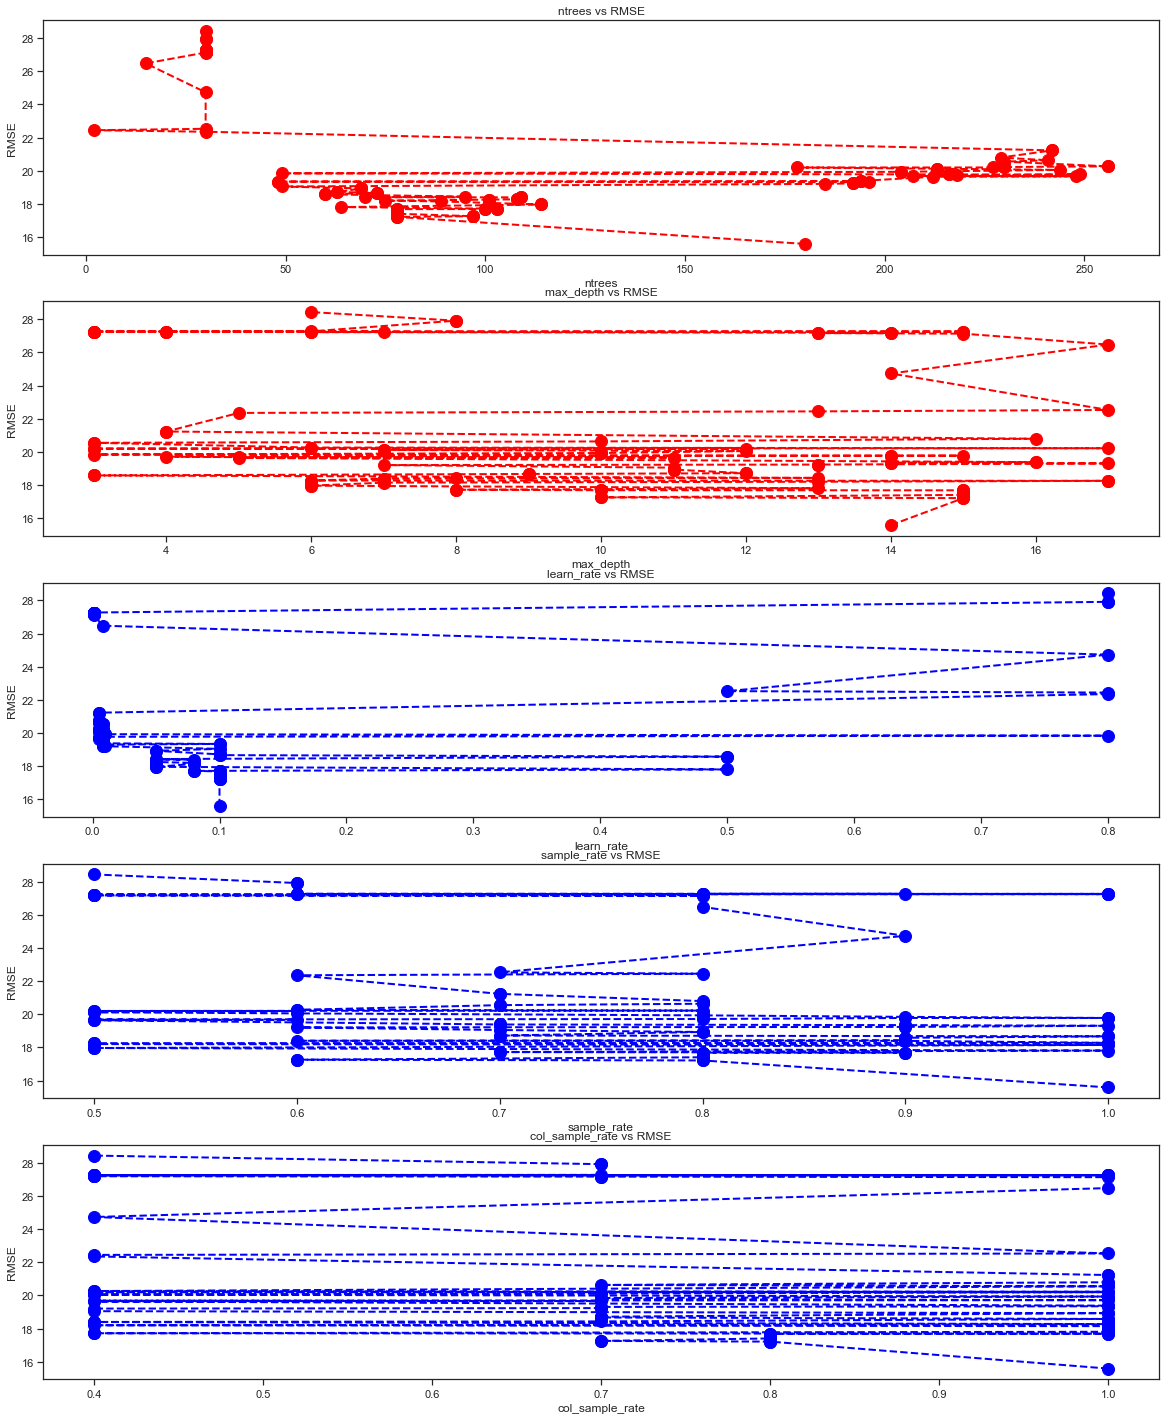

In [145]:
fig, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(5, 1, figsize=(20,25))

ax1.plot(df_gbm2['ntrees'],df_gbm2['RMSE_VAL'],color='red', marker='o', linestyle='dashed',linewidth=2, markersize=12)
ax1.set_title('ntrees vs RMSE')
ax1.set_ylabel('RMSE')
ax1.set_xlabel('ntrees')

ax2.plot(df_gbm2['max_depth'],df_gbm2['RMSE_VAL'],color='red', marker='o', linestyle='dashed',linewidth=2, markersize=12)
ax2.set_title('max_depth vs RMSE')
ax2.set_ylabel('RMSE')
ax2.set_xlabel('max_depth')

ax3.plot(df_gbm2['learn_rate'],df_gbm2['RMSE_VAL'],color='blue', marker='o', linestyle='dashed',linewidth=2, markersize=12)
ax3.set_title('learn_rate vs RMSE')
ax3.set_ylabel('RMSE')
ax3.set_xlabel('learn_rate')

ax4.plot(df_gbm2['sample_rate'],df_gbm2['RMSE_VAL'],color='blue', marker='o', linestyle='dashed',linewidth=2, markersize=12)
ax4.set_title('sample_rate vs RMSE')
ax4.set_ylabel('RMSE')
ax4.set_xlabel('sample_rate')

ax5.plot(df_gbm2['col_sample_rate'],df_gbm2['RMSE_VAL'],color='blue', marker='o', linestyle='dashed',linewidth=2, markersize=12)
ax5.set_title('col_sample_rate vs RMSE')
ax5.set_ylabel('RMSE')
ax5.set_xlabel('col_sample_rate')

In [146]:
store_val=Variable_imp_list(h2o.get_model(model_set[0]))
print(store_val)

{'algo': 'gbm', 'model_id': 'GBM_grid_1_AutoML_20190422_195546_model_48', 'varimp': [('incidenceRate', 2199695.25, 1.0, 0.20477352045146818), ('PctBachDeg25_Over', 2035948.625, 0.9255594041947401, 0.18953005758392033), ('avgDeathsPerYear', 1170150.625, 0.5319603363238612, 0.10893139080958408), ('PctHS25_Over', 579409.375, 0.26340438522108917, 0.0539382432640771), ('medIncome', 465810.8125, 0.2117615212834596, 0.04336315220937253), ('PctPublicCoverageAlone', 428420.03125, 0.19476335699229244, 0.0398823782662578), ('popEst2015', 417987.03125, 0.19002042726145815, 0.03891115184802092), ('PctPrivateCoverage', 411099.71875, 0.18688939695169138, 0.038269999748849724), ('avgAnnCount', 390000.28125, 0.17729741483507772, 0.036305815802723226), ('povertyPercent', 253565.78125, 0.11527314124536114, 0.02360488694631194), ('AvgHouseholdSize', 191581.71875, 0.08709466402220944, 0.017834680964365655), ('PctOtherRace', 184559.109375, 0.08390212661276601, 0.017180933839860916), ('PctBlack', 183525.4687

In [147]:
df_varimp = pd.DataFrame(store_val['varimp'])
df_varimp.rename(columns={0:'Variable',1:'relative_importance',2:'scaled_importance',3:'percentage'}, inplace=True)
df_varimp.head(20)

Variable  relative_importance  scaled_importance  percentage
0            incidenceRate         2.199695e+06           1.000000    0.204774
1        PctBachDeg25_Over         2.035949e+06           0.925559    0.189530
2         avgDeathsPerYear         1.170151e+06           0.531960    0.108931
3             PctHS25_Over         5.794094e+05           0.263404    0.053938
4                medIncome         4.658108e+05           0.211762    0.043363
5   PctPublicCoverageAlone         4.284200e+05           0.194763    0.039882
6               popEst2015         4.179870e+05           0.190020    0.038911
7       PctPrivateCoverage         4.110997e+05           0.186889    0.038270
8              avgAnnCount         3.900003e+05           0.177297    0.036306
9           povertyPercent         2.535658e+05           0.115273    0.023605
10        AvgHouseholdSize         1.915817e+05           0.087095    0.017835
11            PctOtherRace         1.845591e+05           0.083902    0.017181
12                PctBlack         1.835255e+05           0.083432    0.017085
13    PctUnemployed16_Over         1.813845e+05           0.082459    0.016885
14         MedianAgeFemale         1.645297e+05           0.074797    0.015316
15              PctHS18_24         1.596751e+05           0.072590    0.014864
16    PctMarriedHouseholds         1.470141e+05           0.066834    0.013686
17                PctWhite         1.153632e+05           0.052445    0.010739
18                PctAsian         1.140877e+05           0.051865    0.010621
19      PctEmployed16_Over         1.048566e+05           0.047669    0.009761

In [148]:
df_varimp=df_varimp.sort_values(by=['relative_importance'],ascending=False)

In [149]:
VarImp_Para= run_id + '__VariableImportance.json' 
df_varimp.to_json(VarImp_Para)


#### Calculating Evaluation Matric - RMSE

In [150]:
aml_leaderboard_df=aml2.leaderboard.as_data_frame()
model_set=aml_leaderboard_df['model_id']
mod_best1=h2o.get_model(model_set[0])

In [151]:
print("Best Model Name: ",mod_best._id)
print("RMSE of best iteration: ",mod_best.rmse())
print("RMSE on CV: ",mod_best.rmse(xval=True))

Best Model Name:  GBM_grid_1_AutoML_20190422_195546_model_48
RMSE of best iteration:  9.459365695713354
RMSE on CV:  15.586193469597287


In [152]:
print(mod_best1.algo)

gbm


In [153]:
n=run_id+'_metadata.json'
dict_to_json(meta_data,n)

### Model - 3 : Increasing AutoML running time

#### Create Random file to store this runtime data

In [154]:
# run_id="Runtime_1_333_Hyperparameter"
run_id=alphabet(9)
if server_path==None:
  server_path=os.path.abspath(os.curdir)
os.chdir(server_path) 
run_dir2 = os.path.join(server_path,run_id)
os.mkdir(run_id)
os.chdir(run_id)

# run_id to std_opt
print(run_id)

mq0TsRbzA


In [155]:
logfile=run_id+'_autoh2o_log.zip'
logs_path=os.path.join(run_dir,'logs')
print(logs_path,logfile)

C:\Users\kaila\OneDrive\Desktop\DSMT\HYPERPARAMETER-Project\mjA2tAeR6\logs mq0TsRbzA_autoh2o_log.zip


#### Initialized the H2o Server

In [156]:
run_time=999

In [157]:
meta_data = set_meta_data(analysis, run_id,server_path,data_path,test_path,model_path,target,run_time,classification,scale,max_models,balance_y,balance_threshold,name,run_dir,nthreads,min_mem_size)
print(meta_data)

{'start_time': 1555977986.8338368, 'target': 'TARGET_deathRate', 'server_path': 'C:\\Users\\kaila\\OneDrive\\Desktop\\DSMT\\HYPERPARAMETER-Project', 'data_path': None, 'test_path': None, 'max_models': None, 'run_time': 999, 'run_id': 'mq0TsRbzA', 'scale': False, 'classification': True, 'model_path': None, 'balance': False, 'balance_threshold': 0.2, 'project': None, 'end_time': 1555977986.8338368, 'execution_time': 0.0, 'run_path': 'C:\\Users\\kaila\\OneDrive\\Desktop\\DSMT\\HYPERPARAMETER-Project\\mjA2tAeR6', 'nthreads': 1, 'min_mem_size': 6, 'analysis': 2, 'Main_Eval_metrix': 'RMSE'}


In [158]:
# dependent variable
# assign target and inputs for classification or regression
if target==None:
 target=H2O_df.columns[2]   #df['target_class']
y = target

In [159]:
allV=get_variables_types(H2O_df)
# allV
meta_data['variables']=allV

In [160]:
aml3 = H2OAutoML(max_runtime_secs = run_time, seed=27)

In [161]:
model_start_time = time.time()
aml3.train(x=predictors, y=Target, training_frame=H2O_df)
model_end_time = time.time()

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [162]:
meta_data['model_execution_time'] = time.time() - model_start_time

In [163]:
# View the AutoML Leaderboard
lb3 = aml3.leaderboard
lb3.head(rows=lb3.nrows)  # Print all rows instead of default (10 rows)

model_id mean_residual_deviance rmse mse mae rmsle 
 
 
 GBM_grid_1_AutoML_20190422_200626_model_48 242.929 15.5862 242.929 11.3457 0.0898024 
 GBM_grid_1_AutoML_20190422_195546_model_48 242.929 15.5862 242.929 11.3457 0.0898024 
 StackedEnsemble_AllModels_AutoML_20190422_195054 285.212 16.8882 285.212 12.4932 0.0967492 
 GBM_grid_1_AutoML_20190422_200626_model_69 290.184 17.0348 290.184 12.6089 0.097359 
 GBM_2_AutoML_20190422_195054 296.312 17.2137 296.312 12.7204 0.0986053 
 GBM_2_AutoML_20190422_195546 296.312 17.2137 296.312 12.7204 0.0986053 
 GBM_2_AutoML_20190422_200626 296.312 17.2137 296.312 12.7204 0.0986053 
 GBM_grid_1_AutoML_20190422_200626_model_60 297.057 17.2353 297.057 12.816 0.0985061 
 GBM_grid_1_AutoML_20190422_200626_model_19 297.805 17.257 297.805 12.8449 0.0991139 
 GBM_grid_1_AutoML_20190422_195546_model_19 297.805 17.257 297.805 12.8449 0.0991139 
 GBM_grid_1_AutoML_20190422_195054_model_19 297.805 17.257 297.805 12.8449 0.0991139 
 StackedEnsemble_BestOfFamily_AutoML_20190422_195054 298.17 17.2676 298.17 12.7344 0.0989276 
 GBM_1_AutoML_20190422_195546 302.954 17.4056 302.954 12.8275 0.100282 
 GBM_1_AutoML_20190422_195054 302.954 17.4056 302.954 12.8275 0.100282 
 GBM_1_AutoML_20190422_200626 302.954 17.4056 302.954 12.8275 0.100282 
 GBM_3_AutoML_20190422_195054 305.733 17.4852 305.733 12.9469 0.10038 
 GBM_3_AutoML_20190422_195546 305.733 17.4852 305.733 12.9469 0.10038 
 GBM_3_AutoML_20190422_200626 305.733 17.4852 305.733 12.9469 0.10038 
 GBM_5_AutoML_20190422_195054 310.978 17.6346 310.978 12.9831 0.101365 
 GBM_5_AutoML_20190422_195546 310.978 17.6346 310.978 12.9831 0.101365 
 GBM_5_AutoML_20190422_200626 310.978 17.6346 310.978 12.9831 0.101365 
 GBM_4_AutoML_20190422_200626 312.679 17.6827 312.679 13.1434 0.10155 
 GBM_4_AutoML_20190422_195054 312.679 17.6827 312.679 13.1434 0.10155 
 GBM_4_AutoML_20190422_195546 312.679 17.6827 312.679 13.1434 0.10155 
 GBM_grid_1_AutoML_20190422_195546_model_29 312.891 17.6887 312.891 13.0905 0.101521 
 GBM_grid_1_AutoML_20190422_195054_model_29 312.891 17.6887 312.891 13.0905 0.101521 
 GBM_grid_1_AutoML_20190422_200626_model_29 312.891 17.6887 312.891 13.0905 0.101521 
 GBM_grid_1_AutoML_20190422_195054_model_22 313.914 17.7176 313.914 13.0532 0.101222 
 GBM_grid_1_AutoML_20190422_195546_model_22 313.914 17.7176 313.914 13.0532 0.101222 
 GBM_grid_1_AutoML_20190422_200626_model_22 313.914 17.7176 313.914 13.0532 0.101222 
 GBM_grid_1_AutoML_20190422_195546_model_43 317.111 17.8076 317.111 13.3608 0.101715 
 GBM_grid_1_AutoML_20190422_200626_model_43 317.111 17.8076 317.111 13.3608 0.101715 
 GBM_grid_1_AutoML_20190422_200626_model_71 321.916 17.942 321.916 13.3718 0.102869 
 GBM_grid_1_AutoML_20190422_200626_model_18 322.695 17.9637 322.695 13.2346 0.102997 
 GBM_grid_1_AutoML_20190422_195546_model_18 322.695 17.9637 322.695 13.2346 0.102997 
 GBM_grid_1_AutoML_20190422_195054_model_18 322.695 17.9637 322.695 13.2346 0.102997 
 GBM_grid_1_AutoML_20190422_200626_model_33 329.299 18.1466 329.299 13.3933 0.104281 
 GBM_grid_1_AutoML_20190422_195546_model_33 329.299 18.1466 329.299 13.3933 0.104281 
 GBM_grid_1_AutoML_20190422_200626_model_54 331.226 18.1996 331.226 13.4324 0.104166 
 GBM_grid_1_AutoML_20190422_195546_model_54 331.226 18.1996 331.226 13.4324 0.104166 
 GBM_grid_1_AutoML_20190422_200626_model_16 333.264 18.2555 333.264 13.4002 0.105135 
 GBM_grid_1_AutoML_20190422_195054_model_16 333.264 18.2555 333.264 13.4002 0.105135 
 GBM_grid_1_AutoML_20190422_195546_model_16 333.264 18.2555 333.264 13.4002 0.105135 
 GBM_grid_1_AutoML_20190422_195546_model_20 333.891 18.2727 333.891 13.4317 0.105286 
 GBM_grid_1_AutoML_20190422_200626_model_20 333.891 18.2727 333.891 13.4317 0.105286 
 GBM_grid_1_AutoML_20190422_195054_model_20 333.891 18.2727 333.891 13.4317 0.105286 
 GBM_grid_1_AutoML_20190422_195546_model_1 338.367 18.3948 338.367 13.5351 0.105873 
 GBM_grid_1_AutoML_20190422_195054_model_1 338.367 18.3948 338.367 13.5351 0.105873 
 GBM_grid_1_Aut

In [164]:
aml_leaderboard_df=aml3.leaderboard.as_data_frame()
model_set=aml_leaderboard_df['model_id']
mod_best=h2o.get_model(model_set[0])
meta_data['mod_best']= h2o.get_model(model_set[0])._id 
meta_data['mod_best_algo']=h2o.get_model(model_set[0]).algo

In [165]:
meta_data['mod_best_algo']

'gbm'

In [166]:
df_pandaFrame = lb3.as_data_frame()
leaderboard_stats=run_id+'_leaderboard.json'
df_pandaFrame.to_json(leaderboard_stats)

In [167]:
count=0

for rows in df_pandaFrame.iterrows():
    
    mod_best1=h2o.get_model(model_set[count])
    count=count+1
    hy_parameter = mod_best1.params
    n= run_id + "_"+mod_best1._id + '_hy_parameter.json' 
    dict_to_json(hy_parameter,n)    

In [168]:
best_models={}
best_models=stackedensemble(mod_best)
bm=[]
if best_models is not None: 
  if 'Intercept' in best_models.keys():
    del best_models['Intercept']
  bm=list(best_models.keys())
else:
  best_models={}
  bm=stackedensemble_df(aml_leaderboard_df)   
  for b in bm:   
    best_models[b]=None

if mod_best1.model_id not in bm:
    bm.append(mod_best.model_id)
    

In [169]:
meta_data['models']=bm

In [170]:
df_gbm3,df_glm3,df_drf3,df_Deeplearn3=Get_Hyperparameters(df_pandaFrame)

In [171]:
df_gbm3

Model_name Leaderboard_rank  learn_rate  \
0    GBM_grid_1_AutoML_20190422_200626_model_48                1       0.100   
1    GBM_grid_1_AutoML_20190422_195546_model_48                2       0.100   
2    GBM_grid_1_AutoML_20190422_200626_model_69                4       0.100   
3                  GBM_2_AutoML_20190422_195054                5       0.100   
4                  GBM_2_AutoML_20190422_195546                6       0.100   
5                  GBM_2_AutoML_20190422_200626                7       0.100   
6    GBM_grid_1_AutoML_20190422_200626_model_60                8       0.100   
7    GBM_grid_1_AutoML_20190422_200626_model_19                9       0.100   
8    GBM_grid_1_AutoML_20190422_195546_model_19               10       0.100   
9    GBM_grid_1_AutoML_20190422_195054_model_19               11       0.100   
10                 GBM_1_AutoML_20190422_195546               13       0.100   
11                 GBM_1_AutoML_20190422_195054               14       0.100   
12                 GBM_1_AutoML_20190422_200626               15       0.100   
13                 GBM_3_AutoML_20190422_195054               16       0.100   
14                 GBM_3_AutoML_20190422_195546               17       0.100   
15                 GBM_3_AutoML_20190422_200626               18       0.100   
16                 GBM_5_AutoML_20190422_195054               19       0.100   
17                 GBM_5_AutoML_20190422_195546               20       0.100   
18                 GBM_5_AutoML_20190422_200626               21       0.100   
19                 GBM_4_AutoML_20190422_200626               22       0.100   
20                 GBM_4_AutoML_20190422_195054               23       0.100   
21                 GBM_4_AutoML_20190422_195546               24       0.100   
22   GBM_grid_1_AutoML_20190422_195546_model_29               25       0.100   
23   GBM_grid_1_AutoML_20190422_195054_model_29               26       0.100   
24   GBM_grid_1_AutoML_20190422_200626_model_29               27       0.100   
25   GBM_grid_1_AutoML_20190422_195054_model_22               28       0.080   
26   GBM_grid_1_AutoML_20190422_195546_model_22               29       0.080   
27   GBM_grid_1_AutoML_20190422_200626_model_22               30       0.080   
28   GBM_grid_1_AutoML_20190422_195546_model_43               31       0.500   
29   GBM_grid_1_AutoML_20190422_200626_model_43               32       0.500   
..                                          ...              ...         ...   
152  GBM_grid_1_AutoML_20190422_195546_model_25              177       0.001   
153  GBM_grid_1_AutoML_20190422_200626_model_25              178       0.001   
154  GBM_grid_1_AutoML_20190422_195054_model_15              179       0.001   
155  GBM_grid_1_AutoML_20190422_195546_model_15              180       0.001   
156  GBM_grid_1_AutoML_20190422_200626_model_15              181       0.001   
157  GBM_grid_1_AutoML_20190422_200626_model_40              182       0.001   
158  GBM_grid_1_AutoML_20190422_195546_model_40              183       0.001   
159  GBM_grid_1_AutoML_20190422_200626_model_74              184       0.001   
160  GBM_grid_1_AutoML_20190422_195546_model_14              185       0.001   
161  GBM_grid_1_AutoML_20190422_200626_model_14              186       0.001   
162  GBM_grid_1_AutoML_20190422_195054_model_14              187       0.001   
163   GBM_grid_1_AutoML_20190422_195546_model_2              188       0.001   
164   GBM_grid_1_AutoML_20190422_195054_model_2              189       0.001   
165   GBM_grid_1_AutoML_20190422_200626_model_2              190       0.001   
166   GBM_grid_1_AutoML_20190422_195546_model_8              191       0.001   
167   GBM_grid_1_AutoML_20190422_195054_model_8              192       0.001   
168   GBM_grid_1_AutoML_20190422_200626_model_8              193       0.001   
169   GBM_grid_1_AutoML_20190422_195054_model_3              194       0.001   
170   GBM_grid_1_AutoML_20190422_2006

In [172]:
df_glm3

Model_name Leaderboard_rank nfolds seed  \
0  GLM_grid_1_AutoML_20190422_200626_model_1               84      5   27   
1  GLM_grid_1_AutoML_20190422_195054_model_1               85      5   27   
2  GLM_grid_1_AutoML_20190422_195546_model_1               86      5   27   

   tweedie_variance_power  tweedie_link_power                           alpha  \
0                     0.0                 1.0  [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]   
1                     0.0                 1.0  [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]   
2                     0.0                 1.0  [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]   

                                                                  lambda  \
0  [1316.3608321859217, 817.4823784299322, 507.6704067027967, 315.271...   
1  [1316.3608321859217, 817.4823784299322, 507.6704067027967, 315.271...   
2  [1316.3608321859217, 817.4823784299322, 507.6704067027967, 315.271...   

  missing_values_handling standardize   RMSE_VAL  
0          MeanImputation        True  19.451254  
1          MeanImputation        True  19.451254  
2          MeanImputation        True  19.451254

In [173]:
df_drf3

Model_name Leaderboard_rank nfolds seed mtries  \
0  DRF_1_AutoML_20190422_195054               87      5   27     -1   
1  DRF_1_AutoML_20190422_200626               88      5   27     -1   
2  DRF_1_AutoML_20190422_195546               89      5   27     -1   
3  XRT_1_AutoML_20190422_200626               90      5   27     -1   
4  XRT_1_AutoML_20190422_195054               91      5   27     -1   
5  XRT_1_AutoML_20190422_195546               92      5   27     -1   

  categorical_encoding   RMSE_VAL  max_depth  ntrees  
0                 AUTO  19.460429       20.0    15.0  
1                 AUTO  19.460429       20.0    15.0  
2                 AUTO  19.460429       20.0    15.0  
3                 AUTO  19.497214       20.0    15.0  
4                 AUTO  19.497214       20.0    15.0  
5                 AUTO  19.497214       20.0    15.0

In [174]:
df_Deeplearn3

Model_name Leaderboard_rank  \
0                DeepLearning_1_AutoML_20190422_195546               93   
1                DeepLearning_1_AutoML_20190422_195054              111   
2                DeepLearning_1_AutoML_20190422_200626              116   
3   DeepLearning_grid_1_AutoML_20190422_195054_model_2              132   
4   DeepLearning_grid_1_AutoML_20190422_195546_model_3              145   
5   DeepLearning_grid_1_AutoML_20190422_200626_model_2              149   
6   DeepLearning_grid_1_AutoML_20190422_195054_model_4              150   
7   DeepLearning_grid_1_AutoML_20190422_200626_model_3              151   
8   DeepLearning_grid_1_AutoML_20190422_195054_model_1              152   
9   DeepLearning_grid_1_AutoML_20190422_195546_model_1              153   
10  DeepLearning_grid_1_AutoML_20190422_195546_model_2              154   
11  DeepLearning_grid_1_AutoML_20190422_195054_model_3              157   
12  DeepLearning_grid_1_AutoML_20190422_200626_model_1              159   

   balance_classes categorical_encoding class_sampling_factors distribution  \
0            False                 AUTO                   None         AUTO   
1            False                 AUTO                   None         AUTO   
2            False                 AUTO                   None         AUTO   
3            False                 AUTO                   None         AUTO   
4            False                 AUTO                   None         AUTO   
5            False                 AUTO                   None         AUTO   
6            False                 AUTO                   None         AUTO   
7            False                 AUTO                   None         AUTO   
8            False                 AUTO                   None         AUTO   
9            False                 AUTO                   None         AUTO   
10           False                 AUTO                   None         AUTO   
11           False                 AUTO                   None         AUTO   
12           False                 AUTO                   None         AUTO   

    huber_alpha  max_after_balance_size  max_runtime_secs  \
0           NaN                     5.0               NaN   
1           NaN                     5.0               NaN   
2           NaN                     5.0               NaN   
3           NaN                     5.0               NaN   
4           NaN                     5.0               NaN   
5           NaN                     5.0               NaN   
6           NaN                     5.0               NaN   
7           NaN                     5.0               NaN   
8           NaN                     5.0               NaN   
9           NaN                     5.0               NaN   
10          NaN                     5.0               NaN   
11          NaN                     5.0               NaN   
12          NaN                     5.0               NaN   

   missing_values_handling         ...           score_training_samples  \
0           MeanImputation         ...                          10000.0   
1           MeanImputation         ...                          10000.0   
2           MeanImputation         ...                          10000.0   
3           MeanImputation         ...                          10000.0   
4           MeanImputation         ...                          10000.0   
5           MeanImputation         ...                          10000.0   
6           MeanImputation         ...                          10000.0   
7           MeanImputation         ...                          10000.0   
8           MeanImputation         ...                          10000.0   
9           MeanImputation         ...                          10000.0   
10          MeanImputation         ...                          10000.0   
11          MeanImputation         ...                          10000.0   
12          MeanImputation         ...                  

In [175]:
GBM_Para= run_id + "_GBM" + '_hyperparameters.json' 
df_gbm3.to_json(GBM_Para)

GLM_Para= run_id + "_GLM" + '_hyperparameters.json' 
df_glm3.to_json(GLM_Para)

DRF_para= run_id + "_DRF" + '_hyperparameters.json' 
df_drf3.to_json(DRF_para)

Deeplearn_para= run_id + "_Deeplearn" + '_hyperparameters.json' 
df_Deeplearn3.to_json(Deeplearn_para)


## Analysis

### Finding The range of hyperparameters:

#### GBM Model

In [176]:
range_gbm3 = get_rang(df_gbm3)
range_gbm3

Hyperparameter_name     Min_value     Max_value
0              learn_rate         0.001           0.8
1    learn_rate_annealing             1             1
2   max_abs_leafnode_pred  1.79769e+308  1.79769e+308
3    pred_noise_bandwidth             0             0
4            distribution      gaussian      gaussian
5           tweedie_power           1.5           1.5
6          quantile_alpha           0.5           0.5
7             huber_alpha           0.9           0.9
8    categorical_encoding          AUTO          AUTO
9               max_depth             3            17
10            sample_rate           0.5             1
11        col_sample_rate           0.4             1
12                 ntrees             2           256
13                 nfolds             5             5

In [177]:
range_glm3 = get_rang(df_glm3)
range_glm3

Hyperparameter_name  \
0                   nfolds   
1                     seed   
2   tweedie_variance_power   
3       tweedie_link_power   
4                    alpha   
5                   lambda   
6  missing_values_handling   
7              standardize   

                                                               Min_value  \
0                                                                      5   
1                                                                     27   
2                                                                      0   
3                                                                      1   
4                                         [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]   
5  [1316.3608321859217, 817.4823784299322, 507.6704067027967, 315.271...   
6                                                         MeanImputation   
7                                                                   True   

                                                               Max_value  
0                                                                      5  
1                                                                     27  
2                                                                      0  
3                                                                      1  
4                                         [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]  
5  [1316.3608321859217, 817.4823784299322, 507.6704067027967, 315.271...  
6                                                         MeanImputation  
7                                                                   True

In [178]:
range_drf3 =get_rang(df_drf3)
range_drf3

Hyperparameter_name Min_value Max_value
0                nfolds         5         5
1                  seed        27        27
2                mtries        -1        -1
3  categorical_encoding      AUTO      AUTO
4             max_depth        20        20
5                ntrees        15        15

Text(0, 0.5, 'RMSE VALUE')

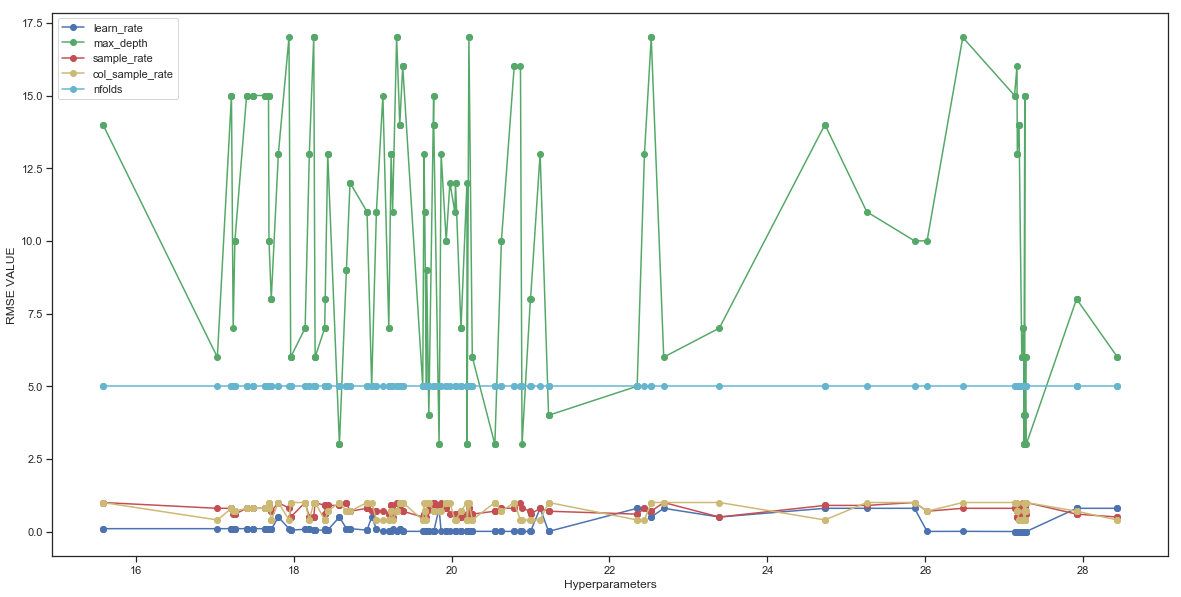

In [179]:
plt.figure(figsize=(20,10))
# Plot with differently-colored markers.
plt.plot(df_gbm3['RMSE_VAL'], df_gbm3['learn_rate'], 'b-',  marker='o', label='learn_rate')
plt.plot(df_gbm3['RMSE_VAL'], df_gbm3['max_depth'], 'g-', marker='o', label='max_depth')
plt.plot(df_gbm3['RMSE_VAL'], df_gbm3['sample_rate'], 'r-', marker='o', label='sample_rate')
plt.plot(df_gbm3['RMSE_VAL'], df_gbm3['col_sample_rate'], 'y-',marker='o', label='col_sample_rate')
# plt.plot(df_gbm1['RMSE_VAL'], df_gbm1['ntrees'], 'y-',marker='o', label='ntrees')
plt.plot(df_gbm3['RMSE_VAL'], df_gbm3['nfolds'], 'c-', marker='o', label='nfolds')

# Create legend.
plt.legend(loc='upper left')
plt.xlabel('Hyperparameters')
plt.ylabel('RMSE VALUE')

Text(0.5, 0, 'col_sample_rate')

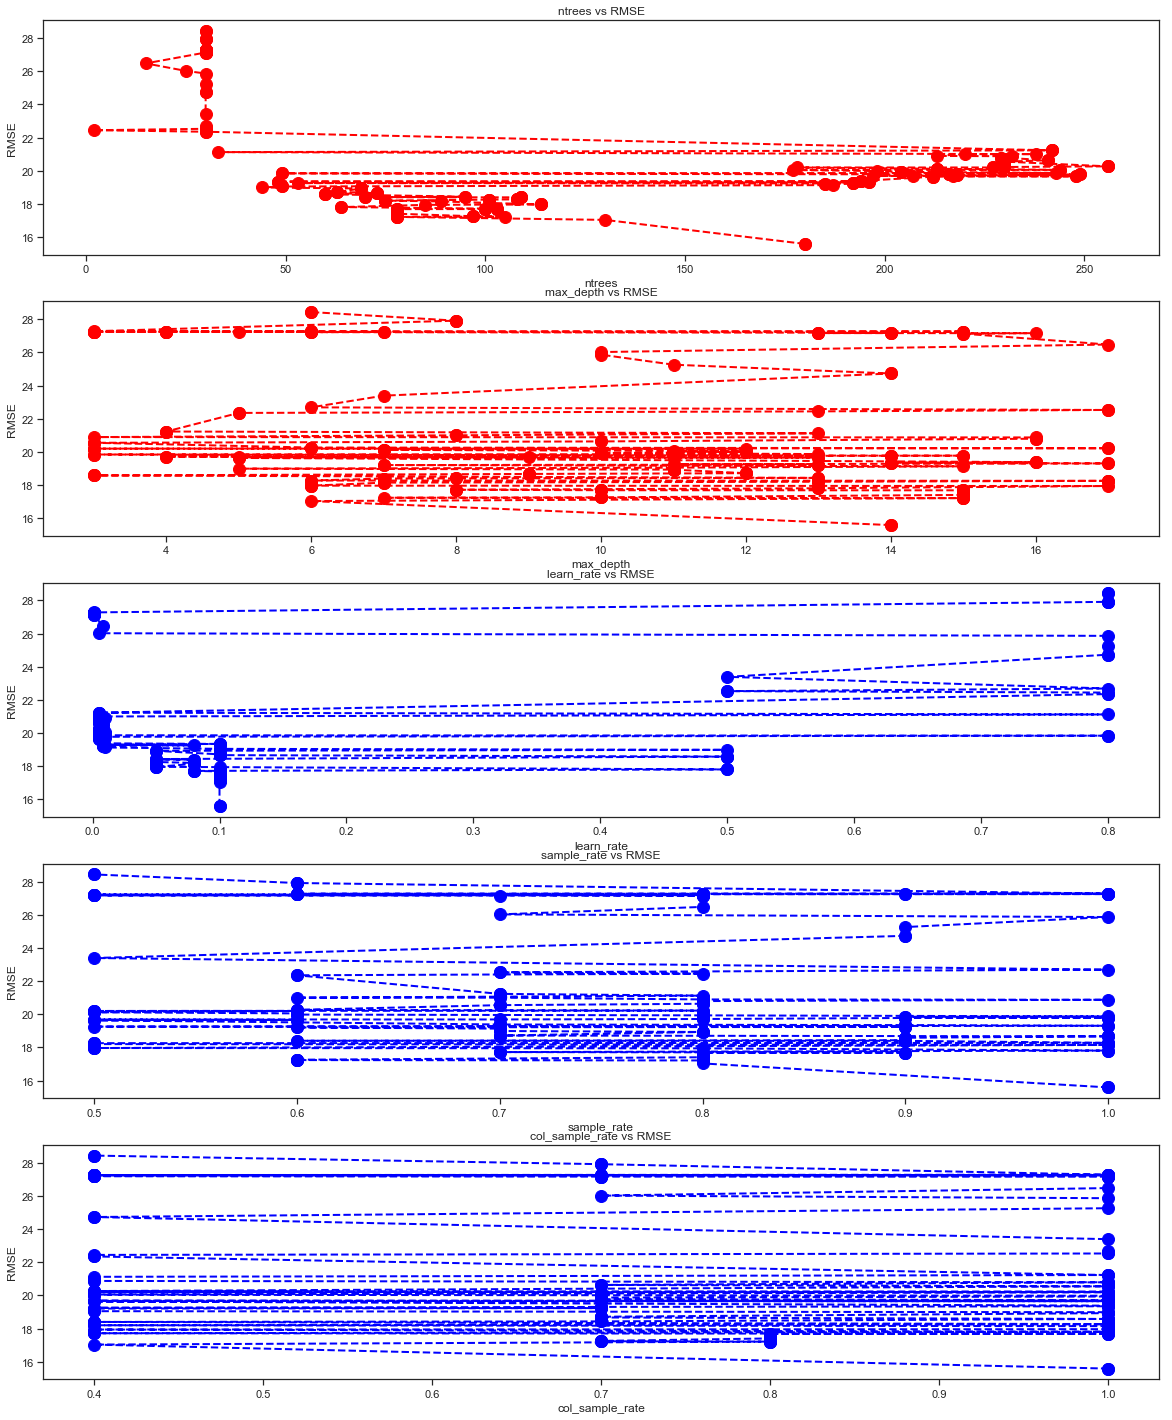

In [180]:
fig, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(5, 1, figsize=(20,25))

ax1.plot(df_gbm3['ntrees'],df_gbm3['RMSE_VAL'],color='red', marker='o', linestyle='dashed',linewidth=2, markersize=12)
ax1.set_title('ntrees vs RMSE')
ax1.set_ylabel('RMSE')
ax1.set_xlabel('ntrees')

ax2.plot(df_gbm3['max_depth'],df_gbm3['RMSE_VAL'],color='red', marker='o', linestyle='dashed',linewidth=2, markersize=12)
ax2.set_title('max_depth vs RMSE')
ax2.set_ylabel('RMSE')
ax2.set_xlabel('max_depth')

ax3.plot(df_gbm3['learn_rate'],df_gbm3['RMSE_VAL'],color='blue', marker='o', linestyle='dashed',linewidth=2, markersize=12)
ax3.set_title('learn_rate vs RMSE')
ax3.set_ylabel('RMSE')
ax3.set_xlabel('learn_rate')

ax4.plot(df_gbm3['sample_rate'],df_gbm3['RMSE_VAL'],color='blue', marker='o', linestyle='dashed',linewidth=2, markersize=12)
ax4.set_title('sample_rate vs RMSE')
ax4.set_ylabel('RMSE')
ax4.set_xlabel('sample_rate')

ax5.plot(df_gbm3['col_sample_rate'],df_gbm3['RMSE_VAL'],color='blue', marker='o', linestyle='dashed',linewidth=2, markersize=12)
ax5.set_title('col_sample_rate vs RMSE')
ax5.set_ylabel('RMSE')
ax5.set_xlabel('col_sample_rate')

In [181]:
store_val=Variable_imp_list(h2o.get_model(model_set[0]))
print(store_val)

{'algo': 'gbm', 'model_id': 'GBM_grid_1_AutoML_20190422_200626_model_48', 'varimp': [('incidenceRate', 2199695.25, 1.0, 0.20477352045146818), ('PctBachDeg25_Over', 2035948.625, 0.9255594041947401, 0.18953005758392033), ('avgDeathsPerYear', 1170150.625, 0.5319603363238612, 0.10893139080958408), ('PctHS25_Over', 579409.375, 0.26340438522108917, 0.0539382432640771), ('medIncome', 465810.8125, 0.2117615212834596, 0.04336315220937253), ('PctPublicCoverageAlone', 428420.03125, 0.19476335699229244, 0.0398823782662578), ('popEst2015', 417987.03125, 0.19002042726145815, 0.03891115184802092), ('PctPrivateCoverage', 411099.71875, 0.18688939695169138, 0.038269999748849724), ('avgAnnCount', 390000.28125, 0.17729741483507772, 0.036305815802723226), ('povertyPercent', 253565.78125, 0.11527314124536114, 0.02360488694631194), ('AvgHouseholdSize', 191581.71875, 0.08709466402220944, 0.017834680964365655), ('PctOtherRace', 184559.109375, 0.08390212661276601, 0.017180933839860916), ('PctBlack', 183525.4687

In [182]:
df_varimp = pd.DataFrame(store_val['varimp'])
df_varimp.rename(columns={0:'Variable',1:'relative_importance',2:'scaled_importance',3:'percentage'}, inplace=True)
df_varimp.head(20)

Variable  relative_importance  scaled_importance  percentage
0            incidenceRate         2.199695e+06           1.000000    0.204774
1        PctBachDeg25_Over         2.035949e+06           0.925559    0.189530
2         avgDeathsPerYear         1.170151e+06           0.531960    0.108931
3             PctHS25_Over         5.794094e+05           0.263404    0.053938
4                medIncome         4.658108e+05           0.211762    0.043363
5   PctPublicCoverageAlone         4.284200e+05           0.194763    0.039882
6               popEst2015         4.179870e+05           0.190020    0.038911
7       PctPrivateCoverage         4.110997e+05           0.186889    0.038270
8              avgAnnCount         3.900003e+05           0.177297    0.036306
9           povertyPercent         2.535658e+05           0.115273    0.023605
10        AvgHouseholdSize         1.915817e+05           0.087095    0.017835
11            PctOtherRace         1.845591e+05           0.083902    0.017181
12                PctBlack         1.835255e+05           0.083432    0.017085
13    PctUnemployed16_Over         1.813845e+05           0.082459    0.016885
14         MedianAgeFemale         1.645297e+05           0.074797    0.015316
15              PctHS18_24         1.596751e+05           0.072590    0.014864
16    PctMarriedHouseholds         1.470141e+05           0.066834    0.013686
17                PctWhite         1.153632e+05           0.052445    0.010739
18                PctAsian         1.140877e+05           0.051865    0.010621
19      PctEmployed16_Over         1.048566e+05           0.047669    0.009761

In [183]:
df_varimp=df_varimp.sort_values(by=['relative_importance'],ascending=False)
df_varimp['Variable'].head(27)

0              incidenceRate
1          PctBachDeg25_Over
2           avgDeathsPerYear
3               PctHS25_Over
4                  medIncome
5     PctPublicCoverageAlone
6                 popEst2015
7         PctPrivateCoverage
8                avgAnnCount
9             povertyPercent
10          AvgHouseholdSize
11              PctOtherRace
12                  PctBlack
13      PctUnemployed16_Over
14           MedianAgeFemale
15                PctHS18_24
16      PctMarriedHouseholds
17                  PctWhite
18                  PctAsian
19        PctEmployed16_Over
20         PctPublicCoverage
21             MedianAgeMale
22            PercentMarried
23           PctBachDeg18_24
24                 Geography
25        PctEmpPrivCoverage
26                 binnedInc
Name: Variable, dtype: object

In [184]:
VarImp_Para= run_id + '__VariableImportance.json' 
df_varimp.to_json(VarImp_Para)


#### Calculating Evaluation Matric - RMSE

In [185]:
aml_leaderboard_df=aml3.leaderboard.as_data_frame()
model_set=aml_leaderboard_df['model_id']
mod_best1=h2o.get_model(model_set[0])

In [186]:
print("Best Model Name: ",mod_best.rmse())
print("RMSE of best iteration: ",mod_best.rmse())
print("RMSE on CV: ",mod_best.rmse(xval=True))

Best Model Name:  9.459365695713354
RMSE of best iteration:  9.459365695713354
RMSE on CV:  15.586193469597287


In [187]:
print(mod_best1.algo)

gbm


In [188]:
n=run_id+'_metadata.json'
dict_to_json(meta_data,n)

### Model - 4 : Increasing AutoML running time

#### Create Random file to store this runtime data

In [189]:
# run_id="Runtime_1_333_Hyperparameter"
run_id=alphabet(9)
if server_path==None:
  server_path=os.path.abspath(os.curdir)
os.chdir(server_path) 
run_dir2 = os.path.join(server_path,run_id)
os.mkdir(run_id)
os.chdir(run_id)

# run_id to std_opt
print(run_id)

cA26lktpw


In [190]:
logfile=run_id+'_autoh2o_log.zip'
logs_path=os.path.join(run_dir,'logs')
print(logs_path,logfile)

C:\Users\kaila\OneDrive\Desktop\DSMT\HYPERPARAMETER-Project\mjA2tAeR6\logs cA26lktpw_autoh2o_log.zip


#### Initialized the H2o Server

In [191]:
run_time=1333

In [192]:
meta_data = set_meta_data(analysis, run_id,server_path,data_path,test_path,model_path,target,run_time,classification,scale,max_models,balance_y,balance_threshold,name,run_dir,nthreads,min_mem_size)
print(meta_data)

{'start_time': 1555978807.9393728, 'target': 'TARGET_deathRate', 'server_path': 'C:\\Users\\kaila\\OneDrive\\Desktop\\DSMT\\HYPERPARAMETER-Project', 'data_path': None, 'test_path': None, 'max_models': None, 'run_time': 1333, 'run_id': 'cA26lktpw', 'scale': False, 'classification': True, 'model_path': None, 'balance': False, 'balance_threshold': 0.2, 'project': None, 'end_time': 1555978807.9393728, 'execution_time': 0.0, 'run_path': 'C:\\Users\\kaila\\OneDrive\\Desktop\\DSMT\\HYPERPARAMETER-Project\\mjA2tAeR6', 'nthreads': 1, 'min_mem_size': 6, 'analysis': 2, 'Main_Eval_metrix': 'RMSE'}


In [193]:
# dependent variable
# assign target and inputs for classification or regression
if target==None:
 target=H2O_df.columns[2]   #df['target_class']
y = target

In [194]:
allV=get_variables_types(H2O_df)
# allV
meta_data['variables']=allV

In [195]:
aml4 = H2OAutoML(max_runtime_secs = run_time, seed=27)

In [196]:
model_start_time = time.time()
aml4.train(x=predictors, y=Target, training_frame=H2O_df)
model_end_time = time.time()

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [197]:
meta_data['model_execution_time'] = time.time() - model_start_time

#### Lets print the Leaderboard 

In [198]:
# View the AutoML Leaderboard
lb4 = aml4.leaderboard
lb4.head(rows=lb4.nrows)  # Print all rows instead of default (10 rows)

model_id mean_residual_deviance rmse mse mae rmsle 
 
 
 GBM_grid_1_AutoML_20190422_202007_model_48 242.929 15.5862 242.929 11.3457 0.0898024 
 GBM_grid_1_AutoML_20190422_200626_model_48 242.929 15.5862 242.929 11.3457 0.0898024 
 GBM_grid_1_AutoML_20190422_195546_model_48 242.929 15.5862 242.929 11.3457 0.0898024 
 StackedEnsemble_AllModels_AutoML_20190422_195054 285.212 16.8882 285.212 12.4932 0.0967492 
 GBM_grid_1_AutoML_20190422_202007_model_83 288.731 16.9921 288.731 12.549 0.0973426 
 GBM_grid_1_AutoML_20190422_202007_model_69 290.184 17.0348 290.184 12.6089 0.097359 
 GBM_grid_1_AutoML_20190422_200626_model_69 290.184 17.0348 290.184 12.6089 0.097359 
 GBM_2_AutoML_20190422_195054 296.312 17.2137 296.312 12.7204 0.0986053 
 GBM_2_AutoML_20190422_195546 296.312 17.2137 296.312 12.7204 0.0986053 
 GBM_2_AutoML_20190422_200626 296.312 17.2137 296.312 12.7204 0.0986053 
 GBM_2_AutoML_20190422_202007 296.312 17.2137 296.312 12.7204 0.0986053 
 GBM_grid_1_AutoML_20190422_200626_model_60 297.057 17.2353 297.057 12.816 0.0985061 
 GBM_grid_1_AutoML_20190422_202007_model_60 297.057 17.2353 297.057 12.816 0.0985061 
 GBM_grid_1_AutoML_20190422_202007_model_19 297.805 17.257 297.805 12.8449 0.0991139 
 GBM_grid_1_AutoML_20190422_200626_model_19 297.805 17.257 297.805 12.8449 0.0991139 
 GBM_grid_1_AutoML_20190422_195546_model_19 297.805 17.257 297.805 12.8449 0.0991139 
 GBM_grid_1_AutoML_20190422_195054_model_19 297.805 17.257 297.805 12.8449 0.0991139 
 StackedEnsemble_BestOfFamily_AutoML_20190422_195054 298.17 17.2676 298.17 12.7344 0.0989276 
 GBM_1_AutoML_20190422_195546 302.954 17.4056 302.954 12.8275 0.100282 
 GBM_1_AutoML_20190422_195054 302.954 17.4056 302.954 12.8275 0.100282 
 GBM_1_AutoML_20190422_202007 302.954 17.4056 302.954 12.8275 0.100282 
 GBM_1_AutoML_20190422_200626 302.954 17.4056 302.954 12.8275 0.100282 
 GBM_3_AutoML_20190422_195054 305.733 17.4852 305.733 12.9469 0.10038 
 GBM_3_AutoML_20190422_195546 305.733 17.4852 305.733 12.9469 0.10038 
 GBM_3_AutoML_20190422_202007 305.733 17.4852 305.733 12.9469 0.10038 
 GBM_3_AutoML_20190422_200626 305.733 17.4852 305.733 12.9469 0.10038 
 GBM_grid_1_AutoML_20190422_202007_model_90 310.339 17.6164 310.339 13.0573 0.100793 
 GBM_5_AutoML_20190422_195054 310.978 17.6346 310.978 12.9831 0.101365 
 GBM_5_AutoML_20190422_195546 310.978 17.6346 310.978 12.9831 0.101365 
 GBM_5_AutoML_20190422_202007 310.978 17.6346 310.978 12.9831 0.101365 
 GBM_5_AutoML_20190422_200626 310.978 17.6346 310.978 12.9831 0.101365 
 GBM_4_AutoML_20190422_200626 312.679 17.6827 312.679 13.1434 0.10155 
 GBM_4_AutoML_20190422_202007 312.679 17.6827 312.679 13.1434 0.10155 
 GBM_4_AutoML_20190422_195054 312.679 17.6827 312.679 13.1434 0.10155 
 GBM_4_AutoML_20190422_195546 312.679 17.6827 312.679 13.1434 0.10155 
 GBM_grid_1_AutoML_20190422_202007_model_29 312.891 17.6887 312.891 13.0905 0.101521 
 GBM_grid_1_AutoML_20190422_195546_model_29 312.891 17.6887 312.891 13.0905 0.101521 
 GBM_grid_1_AutoML_20190422_195054_model_29 312.891 17.6887 312.891 13.0905 0.101521 
 GBM_grid_1_AutoML_20190422_200626_model_29 312.891 17.6887 312.891 13.0905 0.101521 
 GBM_grid_1_AutoML_20190422_195054_model_22 313.914 17.7176 313.914 13.0532 0.101222 
 GBM_grid_1_AutoML_20190422_202007_model_22 313.914 17.7176 313.914 13.0532 0.101222 
 GBM_grid_1_AutoML_20190422_195546_model_22 313.914 17.7176 313.914 13.0532 0.101222 
 GBM_grid_1_AutoML_20190422_200626_model_22 313.914 17.7176 313.914 13.0532 0.101222 
 GBM_grid_1_AutoML_20190422_202007_model_98 315.798 17.7707 315.798 13.1069 0.102755 
 GBM_grid_1_AutoML_20190422_202007_model_43 317.111 17.8076 317.111 13.3608 0.101715 
 GBM_grid_1_AutoML_20190422_195546_model_43 317.111 17.8076 317.111 13.3608 0.101715 
 GBM_grid_1_AutoML_20190422_200626_model_43 317.111 17.8076 317.111 13.3608 0.101715 
 GBM_grid_1_AutoML_20190422_200626_model_71 321.916 17.942 321.916 13.3718 0.102869 
 GBM_grid_1_AutoML_20190422_202007_model_71 321.916 17.942 321.916 13.3718 0.102869

In [199]:
aml_leaderboard_df=aml4.leaderboard.as_data_frame()
model_set=aml_leaderboard_df['model_id']
mod_best=h2o.get_model(model_set[0])
meta_data['mod_best']= h2o.get_model(model_set[0])._id 
meta_data['mod_best_algo']=h2o.get_model(model_set[0]).algo

In [200]:
meta_data['mod_best_algo']

'gbm'

In [201]:
df_pandaFrame = lb4.as_data_frame()
leaderboard_stats=run_id+'_leaderboard.json'
df_pandaFrame.to_json(leaderboard_stats)

In [202]:
count=0

for rows in df_pandaFrame.iterrows():
    
    mod_best1=h2o.get_model(model_set[count])
    count=count+1
    hy_parameter = mod_best1.params
    n= run_id + "_"+mod_best1._id + '_hy_parameter.json' 
    dict_to_json(hy_parameter,n)    

In [203]:
best_models={}
best_models=stackedensemble(mod_best)
bm=[]
if best_models is not None: 
  if 'Intercept' in best_models.keys():
    del best_models['Intercept']
  bm=list(best_models.keys())
else:
  best_models={}
  bm=stackedensemble_df(aml_leaderboard_df)   
  for b in bm:   
    best_models[b]=None

if mod_best1.model_id not in bm:
    bm.append(mod_best.model_id)
    

In [204]:
meta_data['models']=bm

In [205]:
df_gbm4,df_glm4,df_drf4,df_Deeplearn4=Get_Hyperparameters(df_pandaFrame)

In [206]:
df_gbm4

Model_name Leaderboard_rank  learn_rate  \
0    GBM_grid_1_AutoML_20190422_202007_model_48                1       0.100   
1    GBM_grid_1_AutoML_20190422_200626_model_48                2       0.100   
2    GBM_grid_1_AutoML_20190422_195546_model_48                3       0.100   
3    GBM_grid_1_AutoML_20190422_202007_model_83                5       0.080   
4    GBM_grid_1_AutoML_20190422_202007_model_69                6       0.100   
5    GBM_grid_1_AutoML_20190422_200626_model_69                7       0.100   
6                  GBM_2_AutoML_20190422_195054                8       0.100   
7                  GBM_2_AutoML_20190422_195546                9       0.100   
8                  GBM_2_AutoML_20190422_200626               10       0.100   
9                  GBM_2_AutoML_20190422_202007               11       0.100   
10   GBM_grid_1_AutoML_20190422_200626_model_60               12       0.100   
11   GBM_grid_1_AutoML_20190422_202007_model_60               13       0.100   
12   GBM_grid_1_AutoML_20190422_202007_model_19               14       0.100   
13   GBM_grid_1_AutoML_20190422_200626_model_19               15       0.100   
14   GBM_grid_1_AutoML_20190422_195546_model_19               16       0.100   
15   GBM_grid_1_AutoML_20190422_195054_model_19               17       0.100   
16                 GBM_1_AutoML_20190422_195546               19       0.100   
17                 GBM_1_AutoML_20190422_195054               20       0.100   
18                 GBM_1_AutoML_20190422_202007               21       0.100   
19                 GBM_1_AutoML_20190422_200626               22       0.100   
20                 GBM_3_AutoML_20190422_195054               23       0.100   
21                 GBM_3_AutoML_20190422_195546               24       0.100   
22                 GBM_3_AutoML_20190422_202007               25       0.100   
23                 GBM_3_AutoML_20190422_200626               26       0.100   
24   GBM_grid_1_AutoML_20190422_202007_model_90               27       0.100   
25                 GBM_5_AutoML_20190422_195054               28       0.100   
26                 GBM_5_AutoML_20190422_195546               29       0.100   
27                 GBM_5_AutoML_20190422_202007               30       0.100   
28                 GBM_5_AutoML_20190422_200626               31       0.100   
29                 GBM_4_AutoML_20190422_200626               32       0.100   
..                                          ...              ...         ...   
257  GBM_grid_1_AutoML_20190422_202007_model_14              293       0.001   
258  GBM_grid_1_AutoML_20190422_195054_model_14              294       0.001   
259   GBM_grid_1_AutoML_20190422_195546_model_2              295       0.001   
260   GBM_grid_1_AutoML_20190422_202007_model_2              296       0.001   
261   GBM_grid_1_AutoML_20190422_195054_model_2              297       0.001   
262   GBM_grid_1_AutoML_20190422_200626_model_2              298       0.001   
263   GBM_grid_1_AutoML_20190422_195546_model_8              299       0.001   
264   GBM_grid_1_AutoML_20190422_195054_model_8              300       0.001   
265   GBM_grid_1_AutoML_20190422_200626_model_8              301       0.001   
266   GBM_grid_1_AutoML_20190422_202007_model_8              302       0.001   
267   GBM_grid_1_AutoML_20190422_195054_model_3              303       0.001   
268   GBM_grid_1_AutoML_20190422_200626_model_3              304       0.001   
269   GBM_grid_1_AutoML_20190422_195546_model_3              305       0.001   
270   GBM_grid_1_AutoML_20190422_202007_model_3              306       0.001   
271  GBM_grid_1_AutoML_20190422_200626_model_44              307       0.001   
272  GBM_grid_1_AutoML_20190422_195546_model_44              308       0.001   
273  GBM_grid_1_AutoML_20190422_202007_model_44              309       0.001   
274  GBM_grid_1_AutoML_20190422_195546_model_47              310       0.001   
275  GBM_grid_1_AutoML_20190422_20200

In [207]:
df_glm4

Model_name Leaderboard_rank nfolds seed  \
0  GLM_grid_1_AutoML_20190422_202007_model_1              124      5   27   
1  GLM_grid_1_AutoML_20190422_200626_model_1              125      5   27   
2  GLM_grid_1_AutoML_20190422_195054_model_1              126      5   27   
3  GLM_grid_1_AutoML_20190422_195546_model_1              127      5   27   

   tweedie_variance_power  tweedie_link_power                           alpha  \
0                     0.0                 1.0  [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]   
1                     0.0                 1.0  [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]   
2                     0.0                 1.0  [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]   
3                     0.0                 1.0  [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]   

                                                                  lambda  \
0  [1316.3608321859217, 817.4823784299322, 507.6704067027967, 315.271...   
1  [1316.3608321859217, 817.4823784299322, 507.6704067027967, 315.271...   
2  [1316.3608321859217, 817.4823784299322, 507.6704067027967, 315.271...   
3  [1316.3608321859217, 817.4823784299322, 507.6704067027967, 315.271...   

  missing_values_handling standardize   RMSE_VAL  
0          MeanImputation        True  19.451254  
1          MeanImputation        True  19.451254  
2          MeanImputation        True  19.451254  
3          MeanImputation        True  19.451254

In [208]:
df_drf4

Model_name Leaderboard_rank nfolds seed mtries  \
0  DRF_1_AutoML_20190422_202007              128      5   27     -1   
1  DRF_1_AutoML_20190422_195054              129      5   27     -1   
2  DRF_1_AutoML_20190422_200626              130      5   27     -1   
3  DRF_1_AutoML_20190422_195546              131      5   27     -1   
4  XRT_1_AutoML_20190422_202007              132      5   27     -1   
5  XRT_1_AutoML_20190422_200626              133      5   27     -1   
6  XRT_1_AutoML_20190422_195054              134      5   27     -1   
7  XRT_1_AutoML_20190422_195546              135      5   27     -1   

  categorical_encoding   RMSE_VAL  max_depth  ntrees  
0                 AUTO  19.460429       20.0    15.0  
1                 AUTO  19.460429       20.0    15.0  
2                 AUTO  19.460429       20.0    15.0  
3                 AUTO  19.460429       20.0    15.0  
4                 AUTO  19.497214       20.0    15.0  
5                 AUTO  19.497214       20.0    15.0  
6                 AUTO  19.497214       20.0    15.0  
7                 AUTO  19.497214       20.0    15.0

In [209]:
df_Deeplearn4

Model_name Leaderboard_rank  \
0                DeepLearning_1_AutoML_20190422_195546              137   
1   DeepLearning_grid_1_AutoML_20190422_202007_model_3              153   
2                DeepLearning_1_AutoML_20190422_202007              162   
3                DeepLearning_1_AutoML_20190422_195054              169   
4                DeepLearning_1_AutoML_20190422_200626              178   
5   DeepLearning_grid_1_AutoML_20190422_202007_model_5              189   
6   DeepLearning_grid_1_AutoML_20190422_195054_model_2              202   
7   DeepLearning_grid_1_AutoML_20190422_202007_model_7              204   
8   DeepLearning_grid_1_AutoML_20190422_202007_model_2              214   
9   DeepLearning_grid_1_AutoML_20190422_202007_model_1              215   
10  DeepLearning_grid_1_AutoML_20190422_202007_model_6              223   
11  DeepLearning_grid_1_AutoML_20190422_202007_model_4              224   
12  DeepLearning_grid_1_AutoML_20190422_195546_model_3              232   
13  DeepLearning_grid_1_AutoML_20190422_200626_model_2              237   
14  DeepLearning_grid_1_AutoML_20190422_195054_model_4              238   
15  DeepLearning_grid_1_AutoML_20190422_200626_model_3              239   
16  DeepLearning_grid_1_AutoML_20190422_195054_model_1              241   
17  DeepLearning_grid_1_AutoML_20190422_195546_model_1              242   
18  DeepLearning_grid_1_AutoML_20190422_195546_model_2              243   
19  DeepLearning_grid_1_AutoML_20190422_195054_model_3              248   
20  DeepLearning_grid_1_AutoML_20190422_200626_model_1              250   

   balance_classes categorical_encoding class_sampling_factors distribution  \
0            False                 AUTO                   None         AUTO   
1            False                 AUTO                   None         AUTO   
2            False                 AUTO                   None         AUTO   
3            False                 AUTO                   None         AUTO   
4            False                 AUTO                   None         AUTO   
5            False                 AUTO                   None         AUTO   
6            False                 AUTO                   None         AUTO   
7            False                 AUTO                   None         AUTO   
8            False                 AUTO                   None         AUTO   
9            False                 AUTO                   None         AUTO   
10           False                 AUTO                   None         AUTO   
11           False                 AUTO                   None         AUTO   
12           False                 AUTO                   None         AUTO   
13           False                 AUTO                   None         AUTO   
14           False                 AUTO                   None         AUTO   
15           False                 AUTO                   None         AUTO   
16           False                 AUTO                   None         AUTO   
17           False                 AUTO                   None         AUTO   
18           False                 AUTO                   None         AUTO   
19           False                 AUTO                   None         AUTO   
20           False                 AUTO                   None         AUTO   

    huber_alpha  max_after_balance_size  max_runtime_secs  \
0           NaN                     5.0               NaN   
1           NaN                     5.0               NaN   
2           NaN                     5.0               NaN   
3           NaN                     5.0               NaN   
4           NaN                     5.0               NaN   
5           NaN                     5.0               NaN   
6           NaN                     5.0               NaN   
7           NaN                     5.0               NaN   
8           NaN                     5.0               NaN   
9           NaN                     5.0     

In [210]:
GBM_Para= run_id + "_GBM" + '_hyperparameters.json' 
df_gbm4.to_json(GBM_Para)

GLM_Para= run_id + "_GLM" + '_hyperparameters.json' 
df_glm4.to_json(GLM_Para)

DRF_para= run_id + "_DRF" + '_hyperparameters.json' 
df_drf4.to_json(DRF_para)

Deeplearn_para= run_id + "_Deeplearn" + '_hyperparameters.json' 
df_Deeplearn4.to_json(Deeplearn_para)

## Analysis

### Finding The range of hyperparameters:

#### GBM Model

In [211]:
range_gbm4 =get_rang(df_gbm4)
range_gbm4

Hyperparameter_name     Min_value     Max_value
0              learn_rate         0.001           0.8
1    learn_rate_annealing             1             1
2   max_abs_leafnode_pred  1.79769e+308  1.79769e+308
3    pred_noise_bandwidth             0             0
4            distribution      gaussian      gaussian
5           tweedie_power           1.5           1.5
6          quantile_alpha           0.5           0.5
7             huber_alpha           0.9           0.9
8    categorical_encoding          AUTO          AUTO
9               max_depth             3            17
10            sample_rate           0.5             1
11        col_sample_rate           0.4             1
12                 ntrees             2           259
13                 nfolds             5             5

In [212]:
range_glm4 = get_rang(df_glm4)
range_glm4

Hyperparameter_name  \
0                   nfolds   
1                     seed   
2   tweedie_variance_power   
3       tweedie_link_power   
4                    alpha   
5                   lambda   
6  missing_values_handling   
7              standardize   

                                                               Min_value  \
0                                                                      5   
1                                                                     27   
2                                                                      0   
3                                                                      1   
4                                         [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]   
5  [1316.3608321859217, 817.4823784299322, 507.6704067027967, 315.271...   
6                                                         MeanImputation   
7                                                                   True   

                                                               Max_value  
0                                                                      5  
1                                                                     27  
2                                                                      0  
3                                                                      1  
4                                         [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]  
5  [1316.3608321859217, 817.4823784299322, 507.6704067027967, 315.271...  
6                                                         MeanImputation  
7                                                                   True

In [213]:
range_drf4 = get_rang(df_drf4)
range_drf4

Hyperparameter_name Min_value Max_value
0                nfolds         5         5
1                  seed        27        27
2                mtries        -1        -1
3  categorical_encoding      AUTO      AUTO
4             max_depth        20        20
5                ntrees        15        15

Text(0.5, 0, 'col_sample_rate')

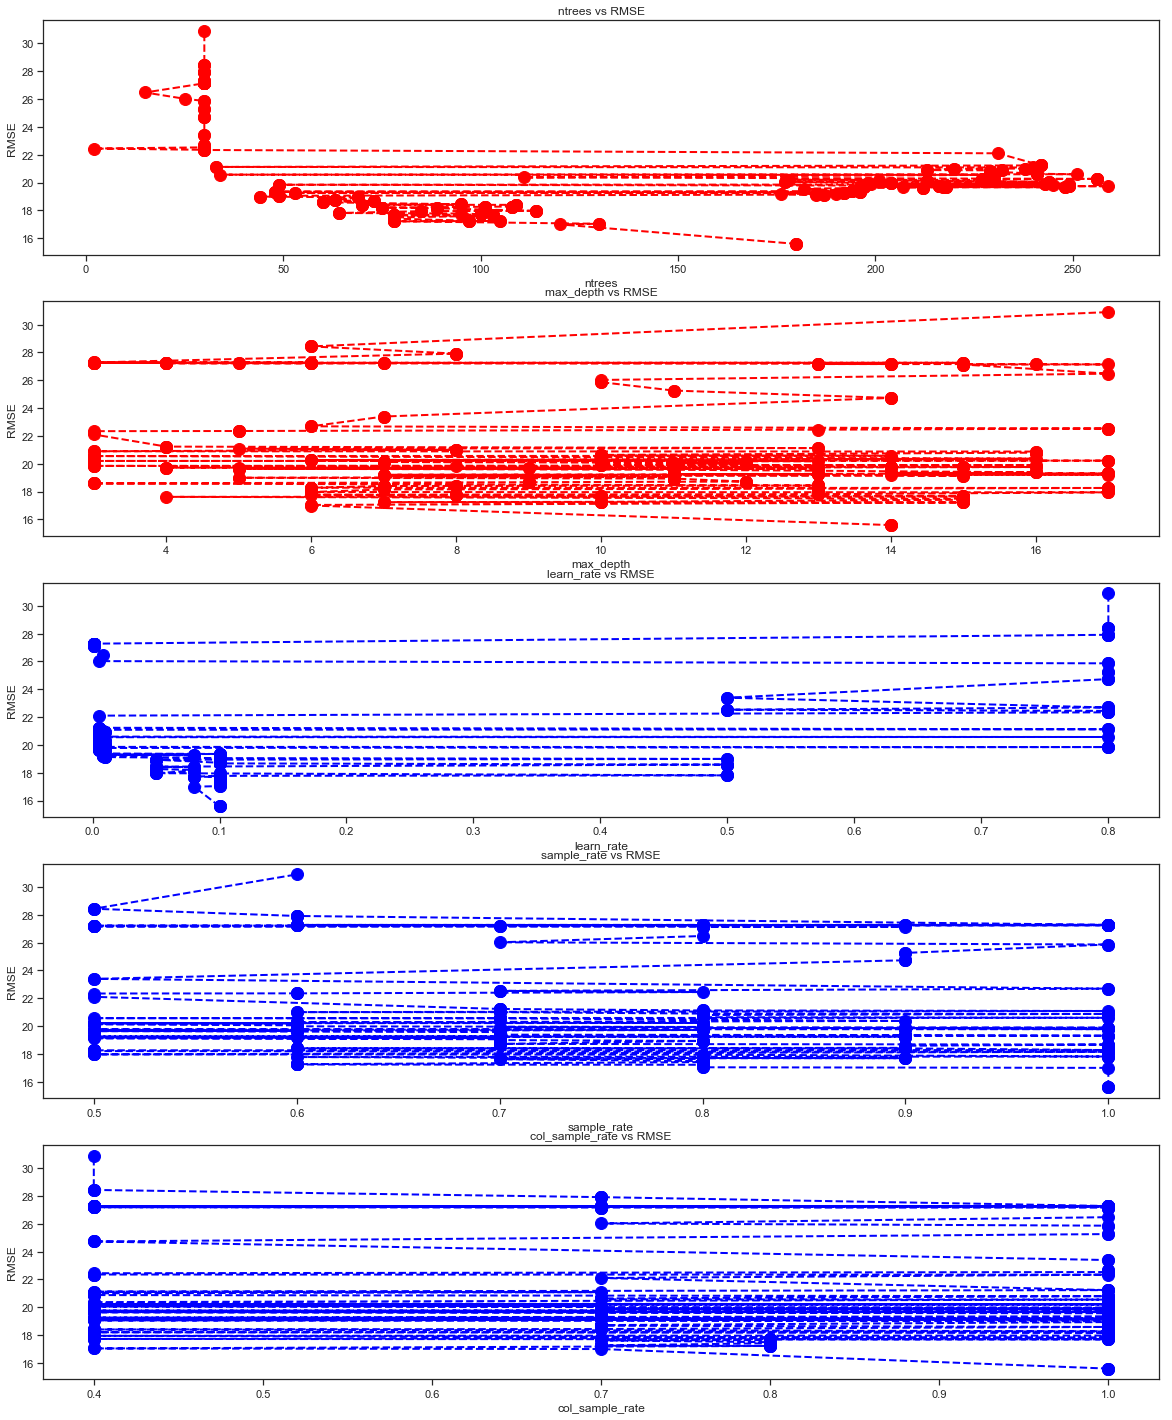

In [214]:
fig, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(5, 1, figsize=(20,25))

ax1.plot(df_gbm4['ntrees'],df_gbm4['RMSE_VAL'],color='red', marker='o', linestyle='dashed',linewidth=2, markersize=12)
ax1.set_title('ntrees vs RMSE')
ax1.set_ylabel('RMSE')
ax1.set_xlabel('ntrees')

ax2.plot(df_gbm4['max_depth'],df_gbm4['RMSE_VAL'],color='red', marker='o', linestyle='dashed',linewidth=2, markersize=12)
ax2.set_title('max_depth vs RMSE')
ax2.set_ylabel('RMSE')
ax2.set_xlabel('max_depth')

ax3.plot(df_gbm4['learn_rate'],df_gbm4['RMSE_VAL'],color='blue', marker='o', linestyle='dashed',linewidth=2, markersize=12)
ax3.set_title('learn_rate vs RMSE')
ax3.set_ylabel('RMSE')
ax3.set_xlabel('learn_rate')

ax4.plot(df_gbm4['sample_rate'],df_gbm4['RMSE_VAL'],color='blue', marker='o', linestyle='dashed',linewidth=2, markersize=12)
ax4.set_title('sample_rate vs RMSE')
ax4.set_ylabel('RMSE')
ax4.set_xlabel('sample_rate')

ax5.plot(df_gbm4['col_sample_rate'],df_gbm4['RMSE_VAL'],color='blue', marker='o', linestyle='dashed',linewidth=2, markersize=12)
ax5.set_title('col_sample_rate vs RMSE')
ax5.set_ylabel('RMSE')
ax5.set_xlabel('col_sample_rate')

In [215]:
store_val=Variable_imp_list(h2o.get_model(model_set[0]))
print(store_val)

{'algo': 'gbm', 'model_id': 'GBM_grid_1_AutoML_20190422_202007_model_48', 'varimp': [('incidenceRate', 2199695.25, 1.0, 0.20477352045146818), ('PctBachDeg25_Over', 2035948.625, 0.9255594041947401, 0.18953005758392033), ('avgDeathsPerYear', 1170150.625, 0.5319603363238612, 0.10893139080958408), ('PctHS25_Over', 579409.375, 0.26340438522108917, 0.0539382432640771), ('medIncome', 465810.8125, 0.2117615212834596, 0.04336315220937253), ('PctPublicCoverageAlone', 428420.03125, 0.19476335699229244, 0.0398823782662578), ('popEst2015', 417987.03125, 0.19002042726145815, 0.03891115184802092), ('PctPrivateCoverage', 411099.71875, 0.18688939695169138, 0.038269999748849724), ('avgAnnCount', 390000.28125, 0.17729741483507772, 0.036305815802723226), ('povertyPercent', 253565.78125, 0.11527314124536114, 0.02360488694631194), ('AvgHouseholdSize', 191581.71875, 0.08709466402220944, 0.017834680964365655), ('PctOtherRace', 184559.109375, 0.08390212661276601, 0.017180933839860916), ('PctBlack', 183525.4687

In [216]:
df_varimp = pd.DataFrame(store_val['varimp'])
df_varimp.rename(columns={0:'Variable',1:'relative_importance',2:'scaled_importance',3:'percentage'}, inplace=True)
df_varimp.head(20)

Variable  relative_importance  scaled_importance  percentage
0            incidenceRate         2.199695e+06           1.000000    0.204774
1        PctBachDeg25_Over         2.035949e+06           0.925559    0.189530
2         avgDeathsPerYear         1.170151e+06           0.531960    0.108931
3             PctHS25_Over         5.794094e+05           0.263404    0.053938
4                medIncome         4.658108e+05           0.211762    0.043363
5   PctPublicCoverageAlone         4.284200e+05           0.194763    0.039882
6               popEst2015         4.179870e+05           0.190020    0.038911
7       PctPrivateCoverage         4.110997e+05           0.186889    0.038270
8              avgAnnCount         3.900003e+05           0.177297    0.036306
9           povertyPercent         2.535658e+05           0.115273    0.023605
10        AvgHouseholdSize         1.915817e+05           0.087095    0.017835
11            PctOtherRace         1.845591e+05           0.083902    0.017181
12                PctBlack         1.835255e+05           0.083432    0.017085
13    PctUnemployed16_Over         1.813845e+05           0.082459    0.016885
14         MedianAgeFemale         1.645297e+05           0.074797    0.015316
15              PctHS18_24         1.596751e+05           0.072590    0.014864
16    PctMarriedHouseholds         1.470141e+05           0.066834    0.013686
17                PctWhite         1.153632e+05           0.052445    0.010739
18                PctAsian         1.140877e+05           0.051865    0.010621
19      PctEmployed16_Over         1.048566e+05           0.047669    0.009761

In [217]:
df_varimp=df_varimp.sort_values(by=['relative_importance'],ascending=False)
df_varimp['Variable'].head(27)

0              incidenceRate
1          PctBachDeg25_Over
2           avgDeathsPerYear
3               PctHS25_Over
4                  medIncome
5     PctPublicCoverageAlone
6                 popEst2015
7         PctPrivateCoverage
8                avgAnnCount
9             povertyPercent
10          AvgHouseholdSize
11              PctOtherRace
12                  PctBlack
13      PctUnemployed16_Over
14           MedianAgeFemale
15                PctHS18_24
16      PctMarriedHouseholds
17                  PctWhite
18                  PctAsian
19        PctEmployed16_Over
20         PctPublicCoverage
21             MedianAgeMale
22            PercentMarried
23           PctBachDeg18_24
24                 Geography
25        PctEmpPrivCoverage
26                 binnedInc
Name: Variable, dtype: object

In [218]:
VarImp_Para= run_id + '__VariableImportance.json' 
df_varimp.to_json(VarImp_Para)

#### Calculating Evaluation Matric - RMSE

In [219]:
aml_leaderboard_df=aml4.leaderboard.as_data_frame()
model_set=aml_leaderboard_df['model_id']
mod_best1=h2o.get_model(model_set[0])

In [220]:
print("Best Model Name: ",mod_best.rmse())
print("RMSE of best iteration: ",mod_best.rmse())
print("RMSE on CV: ",mod_best.rmse(xval=True))

Best Model Name:  9.459365695713354
RMSE of best iteration:  9.459365695713354
RMSE on CV:  15.586193469597287


In [221]:
print(mod_best1.algo)

gbm


In [222]:
n=run_id+'_metadata.json'
dict_to_json(meta_data,n)

### Model - 5 : Increasing AutoML running time¶

#### Create Random file to store this runtime data

In [223]:
# run_id="Runtime_1_333_Hyperparameter"
run_id=alphabet(9)
if server_path==None:
  server_path=os.path.abspath(os.curdir)
os.chdir(server_path) 
run_dir2 = os.path.join(server_path,run_id)
os.mkdir(run_id)
os.chdir(run_id)

# run_id to std_opt
print(run_id)

5Eq5qjUqj


In [224]:
logfile=run_id+'_autoh2o_log.zip'
logs_path=os.path.join(run_dir,'logs')
print(logs_path,logfile)

C:\Users\kaila\OneDrive\Desktop\DSMT\HYPERPARAMETER-Project\mjA2tAeR6\logs 5Eq5qjUqj_autoh2o_log.zip


#### Initialized the H2o Server

In [225]:
run_time=1555

In [226]:
meta_data = set_meta_data(analysis, run_id,server_path,data_path,test_path,model_path,target,run_time,classification,scale,max_models,balance_y,balance_threshold,name,run_dir,nthreads,min_mem_size)
print(meta_data)

{'start_time': 1555979929.3651385, 'target': 'TARGET_deathRate', 'server_path': 'C:\\Users\\kaila\\OneDrive\\Desktop\\DSMT\\HYPERPARAMETER-Project', 'data_path': None, 'test_path': None, 'max_models': None, 'run_time': 1555, 'run_id': '5Eq5qjUqj', 'scale': False, 'classification': True, 'model_path': None, 'balance': False, 'balance_threshold': 0.2, 'project': None, 'end_time': 1555979929.3651385, 'execution_time': 0.0, 'run_path': 'C:\\Users\\kaila\\OneDrive\\Desktop\\DSMT\\HYPERPARAMETER-Project\\mjA2tAeR6', 'nthreads': 1, 'min_mem_size': 6, 'analysis': 2, 'Main_Eval_metrix': 'RMSE'}


In [227]:
# dependent variable
# assign target and inputs for classification or regression
if target==None:
 target=H2O_df.columns[2]   #df['target_class']
y = target

In [228]:
allV=get_variables_types(H2O_df)
# allV
meta_data['variables']=allV

In [229]:
aml5 = H2OAutoML(max_runtime_secs = run_time, seed=27)

In [230]:
model_start_time = time.time()
aml5.train(x=predictors, y=Target, training_frame=H2O_df)
model_end_time = time.time()

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [231]:
meta_data['model_execution_time'] = time.time() - model_start_time

#### Lets print the Leaderboard 

In [232]:
# View the AutoML Leaderboard
lb5 = aml5.leaderboard
lb5.head(rows=lb5.nrows)  # Print all rows instead of default (10 rows)

model_id mean_residual_deviance rmse mse mae rmsle 
 
 
 GBM_grid_1_AutoML_20190422_195546_model_48 242.929 15.5862 242.929 11.3457 0.0898024 
 GBM_grid_1_AutoML_20190422_202007_model_48 242.929 15.5862 242.929 11.3457 0.0898024 
 GBM_grid_1_AutoML_20190422_200626_model_48 242.929 15.5862 242.929 11.3457 0.0898024 
 GBM_grid_1_AutoML_20190422_203849_model_48 242.929 15.5862 242.929 11.3457 0.0898024 
 GBM_grid_1_AutoML_20190422_203849_model_103 269.43 16.4143 269.43 12.1471 0.0936778 
 StackedEnsemble_AllModels_AutoML_20190422_195054 285.212 16.8882 285.212 12.4932 0.0967492 
 GBM_grid_1_AutoML_20190422_202007_model_83 288.731 16.9921 288.731 12.549 0.0973426 
 GBM_grid_1_AutoML_20190422_203849_model_83 288.731 16.9921 288.731 12.549 0.0973426 
 GBM_grid_1_AutoML_20190422_200626_model_69 290.184 17.0348 290.184 12.6089 0.097359 
 GBM_grid_1_AutoML_20190422_203849_model_69 290.184 17.0348 290.184 12.6089 0.097359 
 GBM_grid_1_AutoML_20190422_202007_model_69 290.184 17.0348 290.184 12.6089 0.097359 
 GBM_2_AutoML_20190422_195054 296.312 17.2137 296.312 12.7204 0.0986053 
 GBM_2_AutoML_20190422_195546 296.312 17.2137 296.312 12.7204 0.0986053 
 GBM_2_AutoML_20190422_200626 296.312 17.2137 296.312 12.7204 0.0986053 
 GBM_2_AutoML_20190422_202007 296.312 17.2137 296.312 12.7204 0.0986053 
 GBM_2_AutoML_20190422_203849 296.312 17.2137 296.312 12.7204 0.0986053 
 GBM_grid_1_AutoML_20190422_200626_model_60 297.057 17.2353 297.057 12.816 0.0985061 
 GBM_grid_1_AutoML_20190422_203849_model_60 297.057 17.2353 297.057 12.816 0.0985061 
 GBM_grid_1_AutoML_20190422_202007_model_60 297.057 17.2353 297.057 12.816 0.0985061 
 GBM_grid_1_AutoML_20190422_200626_model_19 297.805 17.257 297.805 12.8449 0.0991139 
 GBM_grid_1_AutoML_20190422_195546_model_19 297.805 17.257 297.805 12.8449 0.0991139 
 GBM_grid_1_AutoML_20190422_195054_model_19 297.805 17.257 297.805 12.8449 0.0991139 
 GBM_grid_1_AutoML_20190422_202007_model_19 297.805 17.257 297.805 12.8449 0.0991139 
 GBM_grid_1_AutoML_20190422_203849_model_19 297.805 17.257 297.805 12.8449 0.0991139 
 StackedEnsemble_BestOfFamily_AutoML_20190422_195054 298.17 17.2676 298.17 12.7344 0.0989276 
 GBM_1_AutoML_20190422_195546 302.954 17.4056 302.954 12.8275 0.100282 
 GBM_1_AutoML_20190422_203849 302.954 17.4056 302.954 12.8275 0.100282 
 GBM_1_AutoML_20190422_195054 302.954 17.4056 302.954 12.8275 0.100282 
 GBM_1_AutoML_20190422_200626 302.954 17.4056 302.954 12.8275 0.100282 
 GBM_1_AutoML_20190422_202007 302.954 17.4056 302.954 12.8275 0.100282 
 GBM_3_AutoML_20190422_195546 305.733 17.4852 305.733 12.9469 0.10038 
 GBM_3_AutoML_20190422_202007 305.733 17.4852 305.733 12.9469 0.10038 
 GBM_3_AutoML_20190422_200626 305.733 17.4852 305.733 12.9469 0.10038 
 GBM_3_AutoML_20190422_195054 305.733 17.4852 305.733 12.9469 0.10038 
 GBM_3_AutoML_20190422_203849 305.733 17.4852 305.733 12.9469 0.10038 
 GBM_grid_1_AutoML_20190422_203849_model_90 310.339 17.6164 310.339 13.0573 0.100793 
 GBM_grid_1_AutoML_20190422_202007_model_90 310.339 17.6164 310.339 13.0573 0.100793 
 GBM_5_AutoML_20190422_203849 310.978 17.6346 310.978 12.9831 0.101365 
 GBM_5_AutoML_20190422_195546 310.978 17.6346 310.978 12.9831 0.101365 
 GBM_5_AutoML_20190422_195054 310.978 17.6346 310.978 12.9831 0.101365 
 GBM_5_AutoML_20190422_202007 310.978 17.6346 310.978 12.9831 0.101365 
 GBM_5_AutoML_20190422_200626 310.978 17.6346 310.978 12.9831 0.101365 
 GBM_4_AutoML_20190422_195054 312.679 17.6827 312.679 13.1434 0.10155 
 GBM_4_AutoML_20190422_195546 312.679 17.6827 312.679 13.1434 0.10155 
 GBM_4_AutoML_20190422_200626 312.679 17.6827 312.679 13.1434 0.10155 
 GBM_4_AutoML_20190422_203849 312.679 17.6827 312.679 13.1434 0.10155 
 GBM_4_AutoML_20190422_202007 312.679 17.6827 312.679 13.1434 0.10155 
 GBM_grid_1_AutoML_20190422_195546_model_29 312.891 17.6887 312.891 13.0905 0.101521 
 GBM_grid_1_AutoML_20190422_195054_model_29 312.891 17.6887 312.891 13.0905 0.101521 
 GBM_grid_1_AutoML_20190422_200626_model_29 312.891 17.6887 312.89

In [233]:
aml_leaderboard_df=aml5.leaderboard.as_data_frame()
model_set=aml_leaderboard_df['model_id']
mod_best=h2o.get_model(model_set[0])
meta_data['mod_best']= h2o.get_model(model_set[0])._id 
meta_data['mod_best_algo']=h2o.get_model(model_set[0]).algo

In [234]:
meta_data['mod_best_algo']

'gbm'

In [235]:
df_pandaFrame = lb5.as_data_frame()
leaderboard_stats=run_id+'_leaderboard.json'
df_pandaFrame.to_json(leaderboard_stats)

In [236]:
count=0

for rows in df_pandaFrame.iterrows():
    
    mod_best1=h2o.get_model(model_set[count])
    count=count+1
    hy_parameter = mod_best1.params
    n= run_id + "_"+mod_best1._id + '_hy_parameter.json' 
    dict_to_json(hy_parameter,n)    

In [237]:
best_models={}
best_models=stackedensemble(mod_best)
bm=[]
if best_models is not None: 
  if 'Intercept' in best_models.keys():
    del best_models['Intercept']
  bm=list(best_models.keys())
else:
  best_models={}
  bm=stackedensemble_df(aml_leaderboard_df)   
  for b in bm:   
    best_models[b]=None

if mod_best1.model_id not in bm:
    bm.append(mod_best.model_id)
    

In [238]:
meta_data['models']=bm

In [239]:
df_gbm5,df_glm5,df_drf5,df_Deeplearn5=Get_Hyperparameters(df_pandaFrame)

In [240]:
df_gbm5

Model_name Leaderboard_rank  learn_rate  \
0     GBM_grid_1_AutoML_20190422_195546_model_48                1       0.100   
1     GBM_grid_1_AutoML_20190422_202007_model_48                2       0.100   
2     GBM_grid_1_AutoML_20190422_200626_model_48                3       0.100   
3     GBM_grid_1_AutoML_20190422_203849_model_48                4       0.100   
4    GBM_grid_1_AutoML_20190422_203849_model_103                5       0.100   
5     GBM_grid_1_AutoML_20190422_202007_model_83                7       0.080   
6     GBM_grid_1_AutoML_20190422_203849_model_83                8       0.080   
7     GBM_grid_1_AutoML_20190422_200626_model_69                9       0.100   
8     GBM_grid_1_AutoML_20190422_203849_model_69               10       0.100   
9     GBM_grid_1_AutoML_20190422_202007_model_69               11       0.100   
10                  GBM_2_AutoML_20190422_195054               12       0.100   
11                  GBM_2_AutoML_20190422_195546               13       0.100   
12                  GBM_2_AutoML_20190422_200626               14       0.100   
13                  GBM_2_AutoML_20190422_202007               15       0.100   
14                  GBM_2_AutoML_20190422_203849               16       0.100   
15    GBM_grid_1_AutoML_20190422_200626_model_60               17       0.100   
16    GBM_grid_1_AutoML_20190422_203849_model_60               18       0.100   
17    GBM_grid_1_AutoML_20190422_202007_model_60               19       0.100   
18    GBM_grid_1_AutoML_20190422_200626_model_19               20       0.100   
19    GBM_grid_1_AutoML_20190422_195546_model_19               21       0.100   
20    GBM_grid_1_AutoML_20190422_195054_model_19               22       0.100   
21    GBM_grid_1_AutoML_20190422_202007_model_19               23       0.100   
22    GBM_grid_1_AutoML_20190422_203849_model_19               24       0.100   
23                  GBM_1_AutoML_20190422_195546               26       0.100   
24                  GBM_1_AutoML_20190422_203849               27       0.100   
25                  GBM_1_AutoML_20190422_195054               28       0.100   
26                  GBM_1_AutoML_20190422_200626               29       0.100   
27                  GBM_1_AutoML_20190422_202007               30       0.100   
28                  GBM_3_AutoML_20190422_195546               31       0.100   
29                  GBM_3_AutoML_20190422_202007               32       0.100   
..                                           ...              ...         ...   
378    GBM_grid_1_AutoML_20190422_195054_model_8              424       0.001   
379    GBM_grid_1_AutoML_20190422_200626_model_8              425       0.001   
380    GBM_grid_1_AutoML_20190422_202007_model_8              426       0.001   
381    GBM_grid_1_AutoML_20190422_200626_model_3              427       0.001   
382    GBM_grid_1_AutoML_20190422_202007_model_3              428       0.001   
383    GBM_grid_1_AutoML_20190422_195054_model_3              429       0.001   
384    GBM_grid_1_AutoML_20190422_195546_model_3              430       0.001   
385    GBM_grid_1_AutoML_20190422_203849_model_3              431       0.001   
386   GBM_grid_1_AutoML_20190422_200626_model_44              432       0.001   
387   GBM_grid_1_AutoML_20190422_195546_model_44              433       0.001   
388   GBM_grid_1_AutoML_20190422_202007_model_44              434       0.001   
389   GBM_grid_1_AutoML_20190422_203849_model_44              435       0.001   
390   GBM_grid_1_AutoML_20190422_195546_model_47              436       0.001   
391   GBM_grid_1_AutoML_20190422_203849_model_47              437       0.001   
392   GBM_grid_1_AutoML_20190422_202007_model_47              438       0.001   
393   GBM_grid_1_AutoML_20190422_200626_model_47              439       0.001   
394   GBM_grid_1_AutoML_20190422_202007_model_77              440       0.001   
395   GBM_grid_1_AutoML_20190422_203849_model_77              441    

In [241]:
df_glm5

Model_name Leaderboard_rank nfolds seed  \
0  GLM_grid_1_AutoML_20190422_195054_model_1              169      5   27   
1  GLM_grid_1_AutoML_20190422_195546_model_1              170      5   27   
2  GLM_grid_1_AutoML_20190422_202007_model_1              171      5   27   
3  GLM_grid_1_AutoML_20190422_200626_model_1              172      5   27   
4  GLM_grid_1_AutoML_20190422_203849_model_1              173      5   27   

   tweedie_variance_power  tweedie_link_power                           alpha  \
0                     0.0                 1.0  [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]   
1                     0.0                 1.0  [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]   
2                     0.0                 1.0  [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]   
3                     0.0                 1.0  [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]   
4                     0.0                 1.0  [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]   

                                                                  lambda  \
0  [1316.3608321859217, 817.4823784299322, 507.6704067027967, 315.271...   
1  [1316.3608321859217, 817.4823784299322, 507.6704067027967, 315.271...   
2  [1316.3608321859217, 817.4823784299322, 507.6704067027967, 315.271...   
3  [1316.3608321859217, 817.4823784299322, 507.6704067027967, 315.271...   
4  [1316.3608321859217, 817.4823784299322, 507.6704067027967, 315.271...   

  missing_values_handling standardize   RMSE_VAL  
0          MeanImputation        True  19.451254  
1          MeanImputation        True  19.451254  
2          MeanImputation        True  19.451254  
3          MeanImputation        True  19.451254  
4          MeanImputation        True  19.451254

In [242]:
df_drf5

Model_name Leaderboard_rank nfolds seed mtries  \
0  DRF_1_AutoML_20190422_202007              174      5   27     -1   
1  DRF_1_AutoML_20190422_200626              175      5   27     -1   
2  DRF_1_AutoML_20190422_195546              176      5   27     -1   
3  DRF_1_AutoML_20190422_203849              177      5   27     -1   
4  DRF_1_AutoML_20190422_195054              178      5   27     -1   
5  XRT_1_AutoML_20190422_202007              179      5   27     -1   
6  XRT_1_AutoML_20190422_203849              180      5   27     -1   
7  XRT_1_AutoML_20190422_200626              181      5   27     -1   
8  XRT_1_AutoML_20190422_195054              182      5   27     -1   
9  XRT_1_AutoML_20190422_195546              183      5   27     -1   

  categorical_encoding   RMSE_VAL  max_depth  ntrees  
0                 AUTO  19.460429       20.0    15.0  
1                 AUTO  19.460429       20.0    15.0  
2                 AUTO  19.460429       20.0    15.0  
3                 AUTO  19.460429       20.0    15.0  
4                 AUTO  19.460429       20.0    15.0  
5                 AUTO  19.497214       20.0    15.0  
6                 AUTO  19.497214       20.0    15.0  
7                 AUTO  19.497214       20.0    15.0  
8                 AUTO  19.497214       20.0    15.0  
9                 AUTO  19.497214       20.0    15.0

In [243]:
df_Deeplearn5

Model_name Leaderboard_rank  \
0                DeepLearning_1_AutoML_20190422_195546              186   
1   DeepLearning_grid_1_AutoML_20190422_202007_model_3              211   
2                DeepLearning_1_AutoML_20190422_203849              212   
3                DeepLearning_1_AutoML_20190422_202007              224   
4   DeepLearning_grid_1_AutoML_20190422_203849_model_2              226   
5                DeepLearning_1_AutoML_20190422_195054              236   
6                DeepLearning_1_AutoML_20190422_200626              249   
7   DeepLearning_grid_1_AutoML_20190422_202007_model_5              264   
8   DeepLearning_grid_1_AutoML_20190422_195054_model_2              280   
9   DeepLearning_grid_1_AutoML_20190422_202007_model_7              282   
10  DeepLearning_grid_1_AutoML_20190422_203849_model_6              283   
11  DeepLearning_grid_1_AutoML_20190422_203849_model_1              284   
12  DeepLearning_grid_1_AutoML_20190422_203849_model_3              285   
13  DeepLearning_grid_1_AutoML_20190422_202007_model_2              300   
14  DeepLearning_grid_1_AutoML_20190422_202007_model_1              301   
15  DeepLearning_grid_1_AutoML_20190422_203849_model_4              307   
16  DeepLearning_grid_1_AutoML_20190422_202007_model_6              314   
17  DeepLearning_grid_1_AutoML_20190422_202007_model_4              315   
18  DeepLearning_grid_1_AutoML_20190422_203849_model_5              328   
19  DeepLearning_grid_1_AutoML_20190422_195546_model_3              329   
20  DeepLearning_grid_1_AutoML_20190422_200626_model_2              336   
21  DeepLearning_grid_1_AutoML_20190422_195054_model_4              337   
22  DeepLearning_grid_1_AutoML_20190422_200626_model_3              338   
23  DeepLearning_grid_1_AutoML_20190422_195054_model_1              341   
24  DeepLearning_grid_1_AutoML_20190422_195546_model_1              342   
25  DeepLearning_grid_1_AutoML_20190422_195546_model_2              343   
26  DeepLearning_grid_1_AutoML_20190422_195054_model_3              350   
27  DeepLearning_grid_1_AutoML_20190422_200626_model_1              352   

   balance_classes categorical_encoding class_sampling_factors distribution  \
0            False                 AUTO                   None         AUTO   
1            False                 AUTO                   None         AUTO   
2            False                 AUTO                   None         AUTO   
3            False                 AUTO                   None         AUTO   
4            False                 AUTO                   None         AUTO   
5            False                 AUTO                   None         AUTO   
6            False                 AUTO                   None         AUTO   
7            False                 AUTO                   None         AUTO   
8            False                 AUTO                   None         AUTO   
9            False                 AUTO                   None         AUTO   
10           False                 AUTO                   None         AUTO   
11           False                 AUTO                   None         AUTO   
12           False                 AUTO                   None         AUTO   
13           False                 AUTO                   None         AUTO   
14           False                 AUTO                   None         AUTO   
15           False                 AUTO                   None         AUTO   
16           False                 AUTO                   None         AUTO   
17           False                 AUTO                   None         AUTO   
18           False                 AUTO                   None         AUTO   
19           False                 AUTO                   None         AUTO   
20           False                 AUTO                   None         AUTO   
21           False                 AUTO                   None         AUTO   
22           False                 AUTO            

In [244]:
GBM_Para= run_id + "_GBM" + '_hyperparameters.json' 
df_gbm5.to_json(GBM_Para)

GLM_Para= run_id + "_GLM" + '_hyperparameters.json' 
df_glm5.to_json(GLM_Para)

DRF_para= run_id + "_DRF" + '_hyperparameters.json' 
df_drf5.to_json(DRF_para)

Deeplearn_para= run_id + "_Deeplearn" + '_hyperparameters.json' 
df_Deeplearn5.to_json(Deeplearn_para)

## Analysis

### Finding The range of hyperparameters:

#### GBM Model

In [245]:
range_gbm5 = get_rang(df_gbm5)
range_gbm5

Hyperparameter_name     Min_value     Max_value
0              learn_rate         0.001           0.8
1    learn_rate_annealing             1             1
2   max_abs_leafnode_pred  1.79769e+308  1.79769e+308
3    pred_noise_bandwidth             0             0
4            distribution      gaussian      gaussian
5           tweedie_power           1.5           1.5
6          quantile_alpha           0.5           0.5
7             huber_alpha           0.9           0.9
8    categorical_encoding          AUTO          AUTO
9               max_depth             3            17
10            sample_rate           0.5             1
11        col_sample_rate           0.4             1
12                 ntrees             2           259
13                 nfolds             5             5

In [246]:
range_glm5 = get_rang(df_glm5)
range_glm5

Hyperparameter_name  \
0                   nfolds   
1                     seed   
2   tweedie_variance_power   
3       tweedie_link_power   
4                    alpha   
5                   lambda   
6  missing_values_handling   
7              standardize   

                                                               Min_value  \
0                                                                      5   
1                                                                     27   
2                                                                      0   
3                                                                      1   
4                                         [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]   
5  [1316.3608321859217, 817.4823784299322, 507.6704067027967, 315.271...   
6                                                         MeanImputation   
7                                                                   True   

                                                               Max_value  
0                                                                      5  
1                                                                     27  
2                                                                      0  
3                                                                      1  
4                                         [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]  
5  [1316.3608321859217, 817.4823784299322, 507.6704067027967, 315.271...  
6                                                         MeanImputation  
7                                                                   True

In [247]:
range_drf5=get_rang(df_drf5)
range_drf5

Hyperparameter_name Min_value Max_value
0                nfolds         5         5
1                  seed        27        27
2                mtries        -1        -1
3  categorical_encoding      AUTO      AUTO
4             max_depth        20        20
5                ntrees        15        15

### Quest to find best Hyperparameters:  

Text(0, 0.5, 'RMSE VALUE')

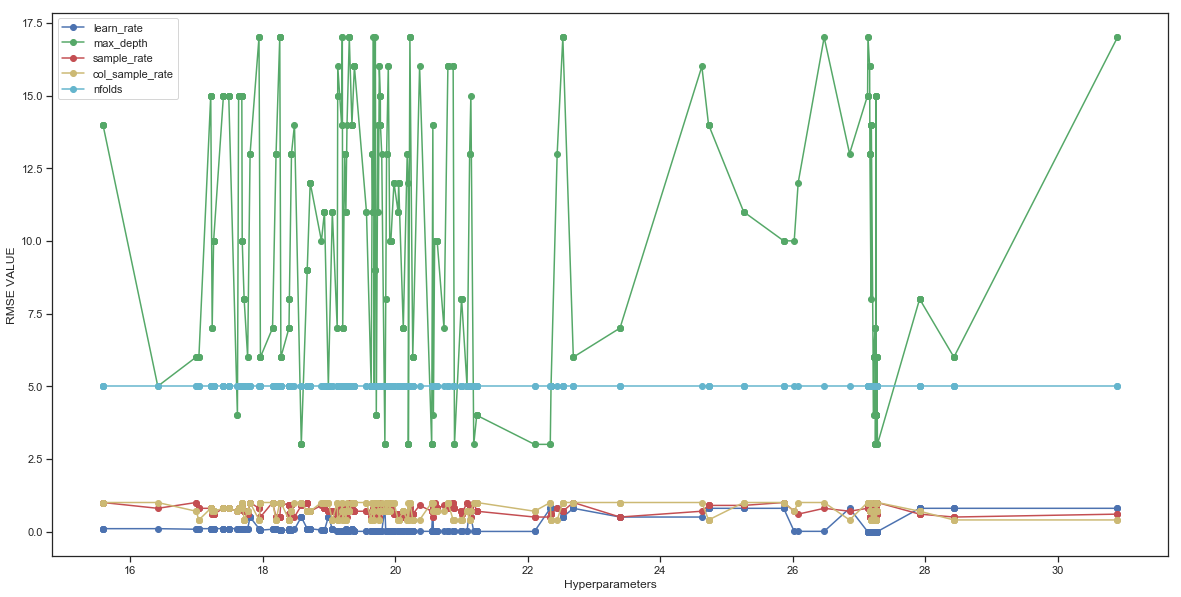

In [248]:
plt.figure(figsize=(20,10))
# Plot with differently-colored markers.
plt.plot(df_gbm5['RMSE_VAL'], df_gbm5[['learn_rate']], 'b-',  marker='o', label='learn_rate')
plt.plot(df_gbm5['RMSE_VAL'], df_gbm5['max_depth'], 'g-', marker='o', label='max_depth')
plt.plot(df_gbm5['RMSE_VAL'], df_gbm5['sample_rate'], 'r-', marker='o', label='sample_rate')
plt.plot(df_gbm5['RMSE_VAL'], df_gbm5['col_sample_rate'], 'y-',marker='o', label='col_sample_rate')
# plt.plot(df_gbm5['RMSE_VAL'], df_gbm5['ntrees'], 'y-',marker='o', label='ntrees')
plt.plot(df_gbm5['RMSE_VAL'], df_gbm5['nfolds'], 'c-', marker='o', label='nfolds')

# Create legend.
plt.legend(loc='upper left')
plt.xlabel('Hyperparameters')
plt.ylabel('RMSE VALUE')

Text(0.5, 0, 'col_sample_rate')

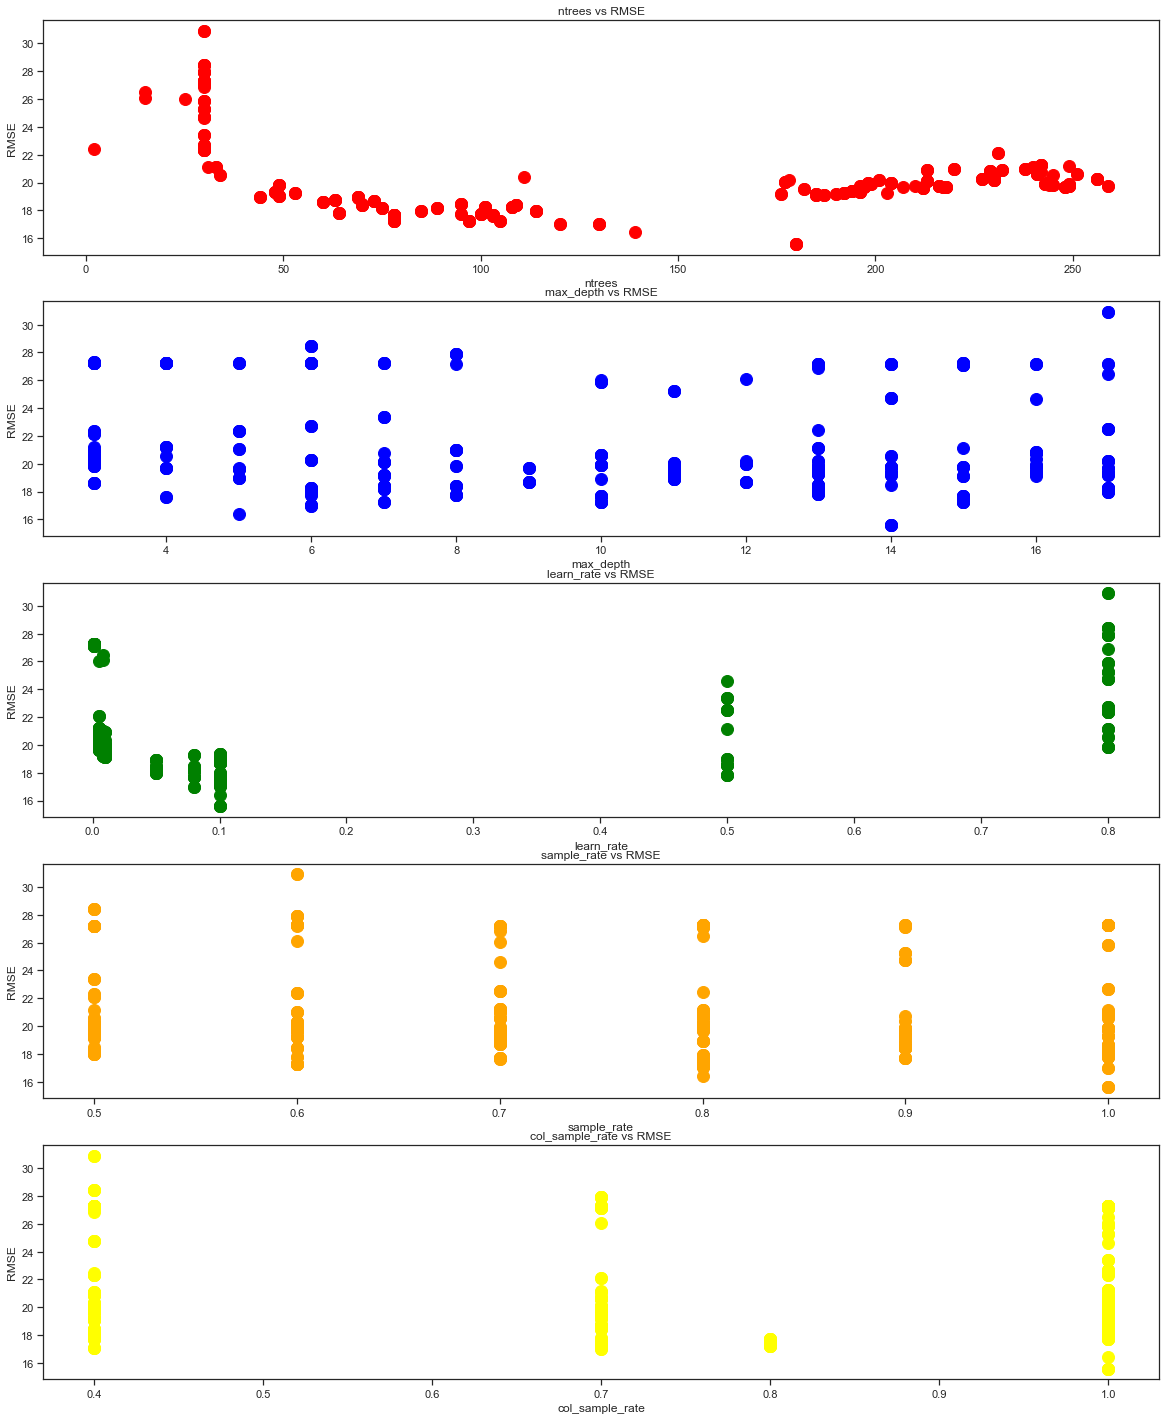

In [249]:
fig, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(5, 1, figsize=(20,25))

ax1.plot(df_gbm5['ntrees'],df_gbm5['RMSE_VAL'],color='red', marker='o', linestyle='none',linewidth=2, markersize=12)
ax1.set_title('ntrees vs RMSE')
ax1.set_ylabel('RMSE')
ax1.set_xlabel('ntrees')

ax2.plot(df_gbm5['max_depth'],df_gbm5['RMSE_VAL'],color='blue', marker='o', linestyle='none',linewidth=2, markersize=12)
ax2.set_title('max_depth vs RMSE')
ax2.set_ylabel('RMSE')
ax2.set_xlabel('max_depth')

ax3.plot(df_gbm5['learn_rate'],df_gbm5['RMSE_VAL'],color='green', marker='o', linestyle='none',linewidth=2, markersize=12)
ax3.set_title('learn_rate vs RMSE')
ax3.set_ylabel('RMSE')
ax3.set_xlabel('learn_rate')

ax4.plot(df_gbm5['sample_rate'],df_gbm5['RMSE_VAL'],color='orange', marker='o', linestyle='none',linewidth=2, markersize=12)
ax4.set_title('sample_rate vs RMSE')
ax4.set_ylabel('RMSE')
ax4.set_xlabel('sample_rate')

ax5.plot(df_gbm5['col_sample_rate'],df_gbm5['RMSE_VAL'],color='yellow', marker='o', linestyle='none',linewidth=2, markersize=12)
ax5.set_title('col_sample_rate vs RMSE')
ax5.set_ylabel('RMSE')
ax5.set_xlabel('col_sample_rate')

In [250]:
store_val=Variable_imp_list(h2o.get_model(model_set[0]))
print(store_val)

{'algo': 'gbm', 'model_id': 'GBM_grid_1_AutoML_20190422_195546_model_48', 'varimp': [('incidenceRate', 2199695.25, 1.0, 0.20477352045146818), ('PctBachDeg25_Over', 2035948.625, 0.9255594041947401, 0.18953005758392033), ('avgDeathsPerYear', 1170150.625, 0.5319603363238612, 0.10893139080958408), ('PctHS25_Over', 579409.375, 0.26340438522108917, 0.0539382432640771), ('medIncome', 465810.8125, 0.2117615212834596, 0.04336315220937253), ('PctPublicCoverageAlone', 428420.03125, 0.19476335699229244, 0.0398823782662578), ('popEst2015', 417987.03125, 0.19002042726145815, 0.03891115184802092), ('PctPrivateCoverage', 411099.71875, 0.18688939695169138, 0.038269999748849724), ('avgAnnCount', 390000.28125, 0.17729741483507772, 0.036305815802723226), ('povertyPercent', 253565.78125, 0.11527314124536114, 0.02360488694631194), ('AvgHouseholdSize', 191581.71875, 0.08709466402220944, 0.017834680964365655), ('PctOtherRace', 184559.109375, 0.08390212661276601, 0.017180933839860916), ('PctBlack', 183525.4687

In [251]:
df_varimp = pd.DataFrame(store_val['varimp'])
df_varimp.rename(columns={0:'Variable',1:'relative_importance',2:'scaled_importance',3:'percentage'}, inplace=True)
df_varimp.head(20)

Variable  relative_importance  scaled_importance  percentage
0            incidenceRate         2.199695e+06           1.000000    0.204774
1        PctBachDeg25_Over         2.035949e+06           0.925559    0.189530
2         avgDeathsPerYear         1.170151e+06           0.531960    0.108931
3             PctHS25_Over         5.794094e+05           0.263404    0.053938
4                medIncome         4.658108e+05           0.211762    0.043363
5   PctPublicCoverageAlone         4.284200e+05           0.194763    0.039882
6               popEst2015         4.179870e+05           0.190020    0.038911
7       PctPrivateCoverage         4.110997e+05           0.186889    0.038270
8              avgAnnCount         3.900003e+05           0.177297    0.036306
9           povertyPercent         2.535658e+05           0.115273    0.023605
10        AvgHouseholdSize         1.915817e+05           0.087095    0.017835
11            PctOtherRace         1.845591e+05           0.083902    0.017181
12                PctBlack         1.835255e+05           0.083432    0.017085
13    PctUnemployed16_Over         1.813845e+05           0.082459    0.016885
14         MedianAgeFemale         1.645297e+05           0.074797    0.015316
15              PctHS18_24         1.596751e+05           0.072590    0.014864
16    PctMarriedHouseholds         1.470141e+05           0.066834    0.013686
17                PctWhite         1.153632e+05           0.052445    0.010739
18                PctAsian         1.140877e+05           0.051865    0.010621
19      PctEmployed16_Over         1.048566e+05           0.047669    0.009761

In [252]:
df_varimp=df_varimp.sort_values(by=['relative_importance'],ascending=False)
df_varimp['Variable'].head(27)

0              incidenceRate
1          PctBachDeg25_Over
2           avgDeathsPerYear
3               PctHS25_Over
4                  medIncome
5     PctPublicCoverageAlone
6                 popEst2015
7         PctPrivateCoverage
8                avgAnnCount
9             povertyPercent
10          AvgHouseholdSize
11              PctOtherRace
12                  PctBlack
13      PctUnemployed16_Over
14           MedianAgeFemale
15                PctHS18_24
16      PctMarriedHouseholds
17                  PctWhite
18                  PctAsian
19        PctEmployed16_Over
20         PctPublicCoverage
21             MedianAgeMale
22            PercentMarried
23           PctBachDeg18_24
24                 Geography
25        PctEmpPrivCoverage
26                 binnedInc
Name: Variable, dtype: object

In [253]:
VarImp_Para= run_id + '__VariableImportance.json' 
df_varimp.to_json(VarImp_Para)

#### Calculating Evaluation Matric - RMSE

In [254]:
aml_leaderboard_df=aml5.leaderboard.as_data_frame()
model_set=aml_leaderboard_df['model_id']
mod_best1=h2o.get_model(model_set[0])

In [255]:
print("Best Model Name: ",mod_best.rmse())
print("RMSE of best iteration: ",mod_best.rmse())
print("RMSE on CV: ",mod_best.rmse(xval=True))

Best Model Name:  9.459365695713354
RMSE of best iteration:  9.459365695713354
RMSE on CV:  15.586193469597287


In [256]:
print(mod_best1.algo)

gbm


In [257]:
n=run_id+'_metadata.json'
dict_to_json(meta_data,n)

## Comparing Range of model accross all 5 runtimes

#### GBM model

In [259]:
# Concatinating the all 5 GBM model dataframes:
GBM_all=pd.concat([range_gbm1,range_gbm2,range_gbm3,range_gbm4,range_gbm5],axis=1)
GBM_all

Hyperparameter_name     Min_value     Max_value    Hyperparameter_name  \
0              learn_rate         0.001           0.8             learn_rate   
1    learn_rate_annealing             1             1   learn_rate_annealing   
2   max_abs_leafnode_pred  1.79769e+308  1.79769e+308  max_abs_leafnode_pred   
3    pred_noise_bandwidth             0             0   pred_noise_bandwidth   
4            distribution      gaussian      gaussian           distribution   
5           tweedie_power           1.5           1.5          tweedie_power   
6          quantile_alpha           0.5           0.5         quantile_alpha   
7             huber_alpha           0.9           0.9            huber_alpha   
8    categorical_encoding          AUTO          AUTO   categorical_encoding   
9               max_depth             3            17              max_depth   
10            sample_rate           0.5             1            sample_rate   
11        col_sample_rate           0.4             1        col_sample_rate   
12                 ntrees            15           256                 ntrees   
13                 nfolds             5             5                 nfolds   

       Min_value     Max_value    Hyperparameter_name     Min_value  \
0          0.001           0.8             learn_rate         0.001   
1              1             1   learn_rate_annealing             1   
2   1.79769e+308  1.79769e+308  max_abs_leafnode_pred  1.79769e+308   
3              0             0   pred_noise_bandwidth             0   
4       gaussian      gaussian           distribution      gaussian   
5            1.5           1.5          tweedie_power           1.5   
6            0.5           0.5         quantile_alpha           0.5   
7            0.9           0.9            huber_alpha           0.9   
8           AUTO          AUTO   categorical_encoding          AUTO   
9              3            17              max_depth             3   
10           0.5             1            sample_rate           0.5   
11           0.4             1        col_sample_rate           0.4   
12             2           256                 ntrees             2   
13             5             5                 nfolds             5   

       Max_value    Hyperparameter_name     Min_value     Max_value  \
0            0.8             learn_rate         0.001           0.8   
1              1   learn_rate_annealing             1             1   
2   1.79769e+308  max_abs_leafnode_pred  1.79769e+308  1.79769e+308   
3              0   pred_noise_bandwidth             0             0   
4       gaussian           distribution      gaussian      gaussian   
5            1.5          tweedie_power           1.5           1.5   
6            0.5         quantile_alpha           0.5           0.5   
7            0.9            huber_alpha           0.9           0.9   
8           AUTO   categorical_encoding          AUTO          AUTO   
9             17              max_depth             3            17   
10             1            sample_rate           0.5             1   
11             1        col_sample_rate           0.4             1   
12           256                 ntrees             2           259   
13             5                 nfolds             5             5   

      Hyperparameter_name     Min_value     Max_value  
0              learn_rate         0.001           0.8  
1    learn_rate_annealing             1             1  
2   max_abs_leafnode_pred  1.79769e+308  1.79769e+308  
3    pred_noise_bandwidth             0             0  
4            distribution      gaussian      gaussian  
5           tweedie_power           1.5           1.5  
6          quantile_alpha           0.5           0.5  
7             huber_alpha           0.9           0.9  
8    categorical_encoding          AUTO          AUTO  
9               max_depth             3            17  
10            sample_rate           0.5             1  
1

By comparing all 5 runtime for GBM model,
- The range for most of the Hyperparameters remain same troughot all runtime.
- Only Hyperparameters `ntree` value have changed, In first runtime the min value is 15 which changed to 2 while max range is 256 which increased to 259.

#### GLM model

In [263]:
# Concatinating the all 5 GBM model dataframes:
GlM_all=pd.concat([range_glm1,range_glm2,range_glm3,range_glm4,range_glm5],axis=1)
GlM_all

Hyperparameter_name  \
0                   nfolds   
1                     seed   
2   tweedie_variance_power   
3       tweedie_link_power   
4                    alpha   
5                   lambda   
6  missing_values_handling   
7              standardize   

                                                               Min_value  \
0                                                                      5   
1                                                                     27   
2                                                                      0   
3                                                                      1   
4                                         [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]   
5  [1316.3608321859217, 817.4823784299322, 507.6704067027967, 315.271...   
6                                                         MeanImputation   
7                                                                   True   

                                                               Max_value  \
0                                                                      5   
1                                                                     27   
2                                                                      0   
3                                                                      1   
4                                         [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]   
5  [1316.3608321859217, 817.4823784299322, 507.6704067027967, 315.271...   
6                                                         MeanImputation   
7                                                                   True   

       Hyperparameter_name  \
0                   nfolds   
1                     seed   
2   tweedie_variance_power   
3       tweedie_link_power   
4                    alpha   
5                   lambda   
6  missing_values_handling   
7              standardize   

                                                               Min_value  \
0                                                                      5   
1                                                                     27   
2                                                                      0   
3                                                                      1   
4                                         [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]   
5  [1316.3608321859217, 817.4823784299322, 507.6704067027967, 315.271...   
6                                                         MeanImputation   
7                                                                   True   

                                                               Max_value  \
0                                                                      5   
1                                                                     27   
2                                                                      0   
3                                                                      1   
4                                         [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]   
5  [1316.3608321859217, 817.4823784299322, 507.6704067027967, 315.271...   
6                                                         MeanImputation   
7                                                                   True   

       Hyperparameter_name  \
0                   nfolds   
1                     seed   
2   tweedie_variance_power   
3       tweedie_link_power   
4                    alpha   
5                   lambda   
6  missing_values_handling   
7              standardize   

                                                               Min_value  \
0                                                                      5   
1                                                                     27   
2                                                                      0   
3                                                                      1   
4                                         [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]  

Lets check variation in value of lamda in first and last iteration

In [275]:
for i in df_glm1["lambda"]:
    print(i)

[1316.3608321859217, 817.4823784299322, 507.6704067027967, 315.2719234594161, 195.78920577103705, 121.58841382330709, 75.50846492199584, 46.8920359727841, 29.120748778887478, 18.084478352257126, 11.230767442022866, 6.974496851940356, 4.331280706224323, 2.689798698653352, 1.6704105621416065, 1.0373532590045447, 0.6442139485682473, 0.4000677762637407, 0.2484488669646657, 0.1542909555788201, 0.09581729739508563, 0.05950416500861036, 0.03695309458345807, 0.02294849779164876, 0.014251405919574965, 0.008850364521829742, 0.005496226309972279, 0.003413249654962926]


In [280]:
for i in df_glm3["lambda"]:
    print(i)

[1316.3608321859217, 817.4823784299322, 507.6704067027967, 315.2719234594161, 195.78920577103705, 121.58841382330709, 75.50846492199584, 46.8920359727841, 29.120748778887478, 18.084478352257126, 11.230767442022866, 6.974496851940356, 4.331280706224323, 2.689798698653352, 1.6704105621416065, 1.0373532590045447, 0.6442139485682473, 0.4000677762637407, 0.2484488669646657, 0.1542909555788201, 0.09581729739508563, 0.05950416500861036, 0.03695309458345807, 0.02294849779164876, 0.014251405919574965, 0.008850364521829742, 0.005496226309972279, 0.003413249654962926]
[1316.3608321859217, 817.4823784299322, 507.6704067027967, 315.2719234594161, 195.78920577103705, 121.58841382330709, 75.50846492199584, 46.8920359727841, 29.120748778887478, 18.084478352257126, 11.230767442022866, 6.974496851940356, 4.331280706224323, 2.689798698653352, 1.6704105621416065, 1.0373532590045447, 0.6442139485682473, 0.4000677762637407, 0.2484488669646657, 0.1542909555788201, 0.09581729739508563, 0.05950416500861036, 0.

In [277]:
for i in df_glm5["lambda"]:
    print(i)

[1316.3608321859217, 817.4823784299322, 507.6704067027967, 315.2719234594161, 195.78920577103705, 121.58841382330709, 75.50846492199584, 46.8920359727841, 29.120748778887478, 18.084478352257126, 11.230767442022866, 6.974496851940356, 4.331280706224323, 2.689798698653352, 1.6704105621416065, 1.0373532590045447, 0.6442139485682473, 0.4000677762637407, 0.2484488669646657, 0.1542909555788201, 0.09581729739508563, 0.05950416500861036, 0.03695309458345807, 0.02294849779164876, 0.014251405919574965, 0.008850364521829742, 0.005496226309972279, 0.003413249654962926]
[1316.3608321859217, 817.4823784299322, 507.6704067027967, 315.2719234594161, 195.78920577103705, 121.58841382330709, 75.50846492199584, 46.8920359727841, 29.120748778887478, 18.084478352257126, 11.230767442022866, 6.974496851940356, 4.331280706224323, 2.689798698653352, 1.6704105621416065, 1.0373532590045447, 0.6442139485682473, 0.4000677762637407, 0.2484488669646657, 0.1542909555788201, 0.09581729739508563, 0.05950416500861036, 0.

- The value of lambda remain the same troughout the all runtime the major difference is that at each runtime the list has been incremented

#### DRF/XRT model

In [281]:
# Concatinating the all 5 GBM model dataframes:
DRF_all=pd.concat([range_drf1,range_drf2,range_drf3,range_drf4,range_drf5],axis=1)
DRF_all

Hyperparameter_name Min_value Max_value   Hyperparameter_name Min_value  \
0                nfolds         5         5                nfolds         5   
1                  seed        27        27                  seed        27   
2                mtries        -1        -1                mtries        -1   
3  categorical_encoding      AUTO      AUTO  categorical_encoding      AUTO   
4             max_depth        20        20             max_depth        20   
5                ntrees        15        15                ntrees        15   

  Max_value   Hyperparameter_name Min_value Max_value   Hyperparameter_name  \
0         5                nfolds         5         5                nfolds   
1        27                  seed        27        27                  seed   
2        -1                mtries        -1        -1                mtries   
3      AUTO  categorical_encoding      AUTO      AUTO  categorical_encoding   
4        20             max_depth        20        20             max_depth   
5        15                ntrees        15        15                ntrees   

  Min_value Max_value   Hyperparameter_name Min_value Max_value  
0         5         5                nfolds         5         5  
1        27        27                  seed        27        27  
2        -1        -1                mtries        -1        -1  
3      AUTO      AUTO  categorical_encoding      AUTO      AUTO  
4        20        20             max_depth        20        20  
5        15        15                ntrees        15        15

- for DRF and XRT model Hyperparameters range remain same.

## Conclusion

We have successfully implementation various regression algorithms like linear Regression, Logistic regression, StepWise Regression and Ridge regression (i.e _L2 regularization_) to predict Cancer Mortality Rates for US Counties. <br />
Cancer Mortality Rates for US Counties is depend upon various factors like <br /> TARGET_deathRate,incidenceRate,medIncome,povertyPercent,PctHS25_Over,PctEmployed16_Over,PctUnemployed16_Over, <br /> PctPrivateCoverage,PctPrivateCoverageAlone,PctPublicCoverage,PctPublicCoverageAlone <br />
but the most prominent are : <br />
incidenceRate, PctPrivateCoverage, PctHS25_Over, povertyPercent, PctUnemployed16_Over, PctPrivateCoverageAlone, <br /> PctEmployed16_Over, PctPublicCoverage, PctPublicCoverageAlone, medIncome <br />

In linear regression The best model give the 'best fit'(R-Square) of: 0.51 while in Logistic Rgression's the best model gives accuracy of 0.97.
In our analysis the predictors we use in linear Regression and predictors suggested by forward stepwise regression are same wich suggest that the independent variable we use are very correlated.

## Contributions 

In above analysis:
- 70% of explanation, analysis and code is done by me.
- 20% of resource is from web and citations are given below.
- 10% of resource is from prof. Nik Brown notes.

## Citations

Dataset : https://data.world/nrippner/ols-regression-challenge <br />
Regression methods : https://github.com/nikbearbrown/INFO_6105/<br />
Learn ROC Curve : https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8 <br />
Dummy function : https://towardsdatascience.com/the-dummys-guide-to-creating-dummy-variables-f21faddb1d40 <br />
K-fold cross validation: https://towardsdatascience.com/cross-validation-70289113a072 <br />
Homoscedasticity : http://davidmlane.com/hyperstat/A121947.html <br />
Confusion Matrix : https://stackoverflow.com/questions/30746460/how-to-interpret-scikits-learn-confusion-matrix-and-classification-report <br />
Forward Stepwise : https://planspace.org/20150423-forward_selection_with_statsmodels/ <br />
Backword Elimination : https://www.kaggle.com/umeshsati54/backward-elimination <br />
Feature Scalling : http://sebastianraschka.com/Articles/2014_about_feature_scaling.html#about-standardization <br />
Outliers : https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba <br />
Standard Error : http://changingminds.org/explanations/research/statistics/standard_error.htm


##  License

#### Copyright 2019 Kailash Nadkar, Tripti Santani, Ashish Kumar


Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.